The purpose of this notebook is to look at the given set of selectors on a subset of (in this case) 3 cheeses (but this can be anything really) and find the optimal selectors to continue analysis with and collect additional data from for ML applications. <br>
Note: a lot of the stuff was originally written when testing on water v. ethanol data...so some names refer to this...sorry!

In [1]:
%matplotlib inline
import os
import itertools 
import warnings
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform, euclidean
pd.options.display.max_columns=100
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle

In [34]:
#### IMPORTANT: there are specifically tuned values in this cell for cheese data...see below and change if needed
# use the location of the data that has all 20 selectors
cheese = False
liquor = False
oil=False
voc = True
if cheese:
    norm_loc = './cheese_3_selectors_20/'
    data = {'c01':[], 'c02':[], 'c03':[],
            'm01':[], 'm02':[], 'm03':[],
            'p01':[], 'p02':[], 'p03':[]}
if liquor:
    norm_loc = './liquor_3_selectors_20/'
    data = {'r01':[], 'r02':[], 'r03':[],
            'v01':[], 'v02':[], 'v03':[],
            'w01':[], 'w02':[], 'w03':[]}
if oil:
    norm_loc = './oil_3_selectors_20/'
    data = {'c01':[], 'c02':[], 'c03':[],
            'o01':[], 'o02':[], 'o03':[],
            'w01':[], 'w02':[], 'w03':[]}
if voc:
    norm_loc = './voc/'
    data = {'a01':[], 'a02':[], 'a03':[],
            'w01':[], 'w02':[], 'w03':[]}
files = os.listdir(norm_loc)

# maps the column name of a excel file to the selector it came from 
mapper = {
'A':{1:'S1', 2:'S1', 3:'S1', 4:'S1',
     5:'S2', 6:'S2', 7:'S2', 8:'S2', 
     9:'S3', 10:'S3', 11:'S3', 12:'S3',
     13:'S4', 14:'S4', 15:'S4', 16:'S4'},
'B':{1:'S5', 2:'S5', 3:'S5', 4:'S5',
     5:'S6', 6:'S6', 7:'S6', 8:'S6', 
     9:'S7', 10:'S7', 11:'S7', 12:'S7',
     13:'S8', 14:'S8', 15:'S8', 16:'S8'},
'C':{1:'S9', 2:'S9', 3:'S9', 4:'S9',
     5:'S10', 6:'S10', 7:'S10', 8:'S10', 
     9:'S11', 10:'S11', 11:'S11', 12:'S11',
     13:'S12', 14:'S12', 15:'S12', 16:'S12'},
'D':{1:'S13', 2:'S13', 3:'S13', 4:'S13',
     5:'S14', 6:'S14', 7:'S14', 8:'S14', 
     9:'S15', 10:'S15', 11:'S15', 12:'S15',
     13:'S16', 14:'S16', 15:'S16', 16:'S16'},
'E':{1:'S17', 2:'S17', 3:'S17', 4:'S17',
     5:'S18', 6:'S18', 7:'S18', 8:'S18', 
     9:'S19', 10:'S19', 11:'S19', 12:'S19',
     13:'S20', 14:'S20', 15:'S20', 16:'S20'}
}

# go through all files and extract the data, keeping only the first sheet for all cases. 
for f in files:
    f = norm_loc + f
    selector_group = f[-6]
    if voc or long:
        selector_group = f[-11]
    # note these next values (indicies) are carefull matched to the data of interest!!! do change!!
    if cheese:
        if f[-19] == 'c':
            compound = 'c' + f[-14:-12]
        elif f[-17] == 'p':
            compound = 'p' + f[-9:-7]
        else:
            compound = 'c'+f[-9:-7]
    if liquor:
        if f[-16] == 'w':
            compound = 'w' + f[-9:-7]
        elif f[-12] == 'r':
            compound = 'r' + f[-9:-7]
        else:
            compound = 'v'+f[-9:-7]
    if oil:
        if f[-18] == 'c':
            compound = 'c' + f[-9:-7]
        elif f[-17] == 'o':
            compound = 'o' + f[-9:-7]
        else:
            compound = 'w' + f[-9:-7]
    if voc:
        if f[-19] == 'w':
            compound = 'w' + f[-14:-12]
        else:
            compound = 'a' + f[-14:-12]      
    to_replace = mapper[selector_group]
    data_set = pd.read_excel(f, sheetname=None, header=None) # need to change sheetname to sheet_name for newer pd! ie if V runs
    for key in data_set.keys():
        data_set[key] = data_set[key].set_index(0)
        data_set[key] = data_set[key].rename(columns=to_replace)
    try:    
        data[compound].append(data_set['Sheet1']) # Currently working with just the first exposure. but with these data somewhere missing
    except:
        data[compound].append(data_set['Sheet2'])
for comp in data:
    data[comp] = pd.concat(data[comp], axis=1)
    print(comp, data[comp].shape, data[comp].head())
if cheese:
    pickle.dump(data, open('./cheese_data.pkl','wb'))
if liquor:
    pickle.dump(data, open('./liquor_data.pkl','wb'))
if oil:
    pickle.dump(data, open('./oil_data.pkl','wb'))

a01 (1591, 80)          S5        S5        S5        S5        S6        S6        S6  \
0                                                                         
0 -0.023427 -0.014960 -0.013652 -0.030438 -0.048379 -0.052495 -0.055008   
1 -0.025607 -0.026995 -0.015313 -0.032678 -0.039395 -0.053690 -0.056585   
2 -0.027787 -0.029015 -0.016975 -0.034919 -0.042140 -0.054885 -0.058162   
3 -0.020597 -0.021018 -0.011849 -0.037159 -0.044885 -0.056080 -0.049864   
4 -0.013408 -0.023037 -0.013510 -0.039400 -0.035901 -0.047690 -0.051441   

         S6        S7        S7        S7        S7        S8        S8  \
0                                                                         
0 -0.049042 -0.081195 -0.095341 -0.088797 -0.114639 -0.015890 -0.011371   
1 -0.048841 -0.080848 -0.076113 -0.089853 -0.112209 -0.017199 -0.012340   
2 -0.048641 -0.080500 -0.089136 -0.090910 -0.109778 -0.018508 -0.013309   
3 -0.048440 -0.080152 -0.102158 -0.091966 -0.107347 -0.019816 -0.014277   
4 -0.0482

In [3]:
# #### IMPORTANT: there are specifically tuned values in this cell for cheese data...see below and change if needed
# # use the location of the data that has all 20 selectors
# norm_loc = './liquor_3_selectors_20/'
# files = os.listdir(norm_loc)

# data = {'r01':[], 'r02':[], 'r03':[],
#         'v01':[], 'v02':[], 'v03':[],
#         'w01':[], 'w02':[], 'w03':[]}
# # maps the column name of a excel file to the selector it came from 
# mapper = {
# 'A':{1:'S1', 2:'S1', 3:'S1', 4:'S1',
#      5:'S2', 6:'S2', 7:'S2', 8:'S2', 
#      9:'S3', 10:'S3', 11:'S3', 12:'S3',
#      13:'S4', 14:'S4', 15:'S4', 16:'S4'},
# 'B':{1:'S5', 2:'S5', 3:'S5', 4:'S5',
#      5:'S6', 6:'S6', 7:'S6', 8:'S6', 
#      9:'S7', 10:'S7', 11:'S7', 12:'S7',
#      13:'S8', 14:'S8', 15:'S8', 16:'S8'},
# 'C':{1:'S9', 2:'S9', 3:'S9', 4:'S9',
#      5:'S10', 6:'S10', 7:'S10', 8:'S10', 
#      9:'S11', 10:'S11', 11:'S11', 12:'S11',
#      13:'S12', 14:'S12', 15:'S12', 16:'S12'},
# 'D':{1:'S13', 2:'S13', 3:'S13', 4:'S13',
#      5:'S14', 6:'S14', 7:'S14', 8:'S14', 
#      9:'S15', 10:'S15', 11:'S15', 12:'S15',
#      13:'S16', 14:'S16', 15:'S16', 16:'S16'},
# 'E':{1:'S17', 2:'S17', 3:'S17', 4:'S17',
#      5:'S18', 6:'S18', 7:'S18', 8:'S18', 
#      9:'S19', 10:'S19', 11:'S19', 12:'S19',
#      13:'S20', 14:'S20', 15:'S20', 16:'S20'}
# }

# # go through all files and extract the data, keeping only the first sheet for all cases. 
# for f in files:
#     f = norm_loc + f
#     selector_group = f[-6]
#     # note these next values (indicies) are carefull matched to the data of interest!!! do change!!
#     if f[-16] == 'w':
#         compound = 'w' + f[-9:-7]
#     elif f[-12] == 'r':
#         compound = 'r' + f[-9:-7]
#     else:
#         compound = 'v'+f[-9:-7]
#     to_replace = mapper[selector_group]
#     data_set = pd.read_excel(f, sheetname=None, header=None) # need to change sheetname to sheet_name for newer pd! ie if V runs
#     for key in data_set.keys():
#         data_set[key] = data_set[key].set_index(0)
#         data_set[key] = data_set[key].rename(columns=to_replace)
#     try:    
#         data[compound].append(data_set['Sheet1']) # Currently working with just the first exposure. but with these data somewhere missing
#     except:
#         data[compound].append(data_set['Sheet2'])
# for comp in data:  
#     data[comp] = pd.concat(data[comp], axis=1)

In [5]:
### defining the majority of the functions

def get_classifier(classifier):
    if classifier == 'LR':
        return LogisticRegressionCV(cv=3, penalty='l1', solver='saga', n_jobs=-1)
    elif classifier == 'RF':
        return RandomForestClassifier(n_estimators=100, n_jobs=-1)
    elif classifier == 'KNN':
        return KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    elif classifier == 'SVM': # using the default RBF kernel..
        return SVC() 
    elif classifier == 'GP':
        kernel = 1.0 * RBF(1.0)
        return GaussianProcessClassifier(kernel=kernel, n_jobs=-1)
    else:
        print('You did not input a valid classifier, please use one of: KNN, LR or RF')
        return
    
def get_majority_vote(vote_count_dict):
    highest_count = 0
    key_highest = None
    shared_highest = []
    for k,v in vote_count_dict.items():
        if v > highest_count:
            highest_count = v
            key_highest = k
            shared_highest = [(k,v)]
        elif v == highest_count:
            shared_highest.append((k,v))
    if len(shared_highest) > 1:
        rand_int = random.randint(0,len(shared_highest)-1)
        key_highest = shared_highest[rand_int][0]
        # get random value in 0..len(shared_highest) and use this to set the key_highest
    return key_highest

def normalize_selector(sel_data):
    max_val = sel_data.max()
    min_val = sel_data.min()
    max_min = max_val - min_val
    sel_data = (sel_data - min_val) / float(max_min)
    return sel_data

def indiv_sel_avg_all_to_all_dist(sel_mat, classes):
    sample_num = sel_mat.shape[0]
    class_mat_list = np.split(sel_mat, classes, axis=0)
    all_dists = []
    seen = []
    for int_1, class_mat_1 in enumerate(class_mat_list):
        for int_2, class_mat_2 in enumerate(class_mat_list):
            if int_1 == int_2:
                continue
            if (int_1,int_2) in seen or (int_2,int_1) in seen:
                continue
            seen.append((int_1, int_2))
            distances = euclidean_distances(class_mat_1, class_mat_2)
            mean = distances.mean()
            all_dists.append(mean)
    all_distances = np.asarray(all_dists)
    return all_distances.sum()

def internal_class_dissim(sel_mat, classes):
    sample_num = sel_mat.shape[0]
    class_mat_list = np.split(sel_mat, classes, axis=0)
    class_distances = []
    for class_mat in class_mat_list:
        distances = euclidean_distances(class_mat, class_mat)
        distances = distances.round(5)
        linear_mat = squareform(distances)
        class_distances.append((linear_mat.mean(), linear_mat.std()))
    return class_distances
         
def avg_all_to_all_dist(m1, m2):
    distances = []
    for i in range(m1.shape[0]):
        for j in range(m2.shape[0]):
            distances.append(euclidean(m1[i,:], m2[j,:]))
    distances = np.asarray(distances)
    distance_mean = distances.mean()
    return distance_mean

def dist_water_and_ethanol(selector1, selector2):
    '''
    currently hardcoded for the water-ethanol datasets assuming sorted input! ie ethanol first, then water
    '''
    ethanol_dist = avg_all_to_all_dist(selector1[:12,:], selector2[:12,:])
    water_dist = avg_all_to_all_dist(selector1[12:,:], selector2[12:,:])
    return water_dist, ethanol_dist

For doing featurization on the data using tsfresh

In [36]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
import itertools

# getting the data into a format for the extract_features....
start = 300
end = 600
length= end-start
selectors = [i+1 for i in range(20)]
combined = []
for select in selectors:
    selector = []
    for w in sorted(data.keys()):
        selector_data = data[w]['S'+str(select)]
        selector_data = selector_data.T.fillna(selector_data.mean(axis=1)).T 
        selector.append(selector_data)
    selector = pd.concat(selector, axis=1)
    selector = selector.values.T
    selector = selector[:, start:end].reshape(-1,1)
    combined.append(selector)
combined = np.concatenate(combined, axis=1)
time = np.asarray([i for i in range(end-start)]*36).reshape(-1,1) # 4 (replicates in a TC) * 3 repeats *3 cheese = 36
if voc:
    time = np.asarray([i for i in range(end-start)]*24).reshape(-1,1)
combined = np.append(combined,time, axis=1)
combined_df = pd.DataFrame(combined, columns=['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11',
                                              'S12','S13','S14','S15','S16','S17','S18','S19','S20','time'])
print(combined_df.head())
if cheese:
    name_c = ['C1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 1
    name_c = [[ele]*length for ele in name_c]
    name_c = [j for i in name_c for j in i]
    name_m = ['M1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 2
    name_m = [[ele]*length for ele in name_m]
    name_m = [j for i in name_m for j in i]
    name_p = ['P1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 3
    name_p = [[ele]*length for ele in name_p]
    name_p = [j for i in name_p for j in i]
    names = name_c + name_m + name_p
if liquor:
    name_r = ['R1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 1
    name_r = [[ele]*length for ele in name_r]
    name_r = [j for i in name_r for j in i]
    name_v = ['V1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 2
    name_v = [[ele]*length for ele in name_v]
    name_v = [j for i in name_v for j in i]
    name_w = ['W1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 3
    name_w = [[ele]*length for ele in name_w]
    name_w = [j for i in name_w for j in i]
    names = name_r + name_v + name_w
if oil:
    name_c = ['C1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 1
    name_c = [[ele]*length for ele in name_c]
    name_c = [j for i in name_c for j in i]
    name_o = ['O1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 2
    name_o = [[ele]*length for ele in name_o]
    name_o = [j for i in name_o for j in i]
    name_w = ['W1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 3
    name_w = [[ele]*length for ele in name_w]
    name_w = [j for i in name_w for j in i]
    names = name_c + name_o + name_w
if voc:
    name_a = ['A1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 1
    name_a = [[ele]*length for ele in name_a]
    name_a = [j for i in name_a for j in i]
    name_w = ['W1_{}'.format(i) for i in range(1,13)] # 12 examples for cheese 3
    name_w = [[ele]*length for ele in name_w]
    name_w = [j for i in name_w for j in i]
    names = name_a + name_w
combined_df['id'] = names

extracted_feat = extract_features(combined_df, column_id="id", column_sort="time", column_kind=None, column_value=None)
impute(extracted_feat)# fill in the nan features 
if cheese:
    pickle.dump(extracted_feat, open('./featurized_cheese.pkl', 'wb'))
if liquor:
    pickle.dump(extracted_feat, open('./featurized_liquor.pkl', 'wb'))
if oil:
    pickle.dump(extracted_feat, open('./featurized_oil.pkl', 'wb'))
# each selector has 794 features...can split this dataframe up and train on individuals or together...

         S1        S2        S3        S4        S5        S6        S7  \
0 -0.017476  0.032129  0.043502  0.055591  0.006524 -0.003914 -0.010558   
1 -0.116807 -0.022210  0.008735  0.021459 -0.276749 -0.288149 -0.346601   
2 -0.216138 -0.132077 -0.062013 -0.121393 -0.381997 -0.795232 -0.716283   
3 -0.413449 -0.228063 -0.096780 -0.228005 -0.505984 -1.278858 -0.917770   
4 -0.610760 -0.379576 -0.203507 -0.370856 -0.620601 -1.750754 -1.152896   

         S8        S9       S10       S11       S12       S13       S14  \
0 -0.013772 -0.017275 -0.021548 -0.020158 -0.007007  0.036763  0.021220   
1 -0.165456 -1.659251 -5.222253 -1.209695 -0.747374 -0.007201 -0.000050   
2 -0.223155 -1.629614 -6.338108 -1.318918 -1.383131 -0.068594 -0.066945   
3 -0.149277 -2.149627 -7.599418 -1.775030 -2.116026 -0.177916 -0.217485   
4 -0.112992 -3.893599 -9.175879 -3.212345 -3.080556 -0.391812 -0.535313   

        S15       S16       S17       S18       S19       S20  time  
0  0.011157  0.006042 -0.011

Feature Extraction: 100%|██████████| 20/20 [02:02<00:00,  3.52s/it]


In [37]:
extracted_feat

variable  S10__abs_energy  S10__absolute_sum_of_changes  \
id                                                        
A1_1          1826.473143                     23.911412   
A1_10         2367.077555                     22.584740   
A1_11         2011.936035                     22.529137   
A1_12         2102.011295                     22.421914   
A1_2          1587.506167                     22.748013   
A1_3          2367.077555                     22.584740   
A1_4          2011.936035                     22.529137   
A1_5          1826.473143                     23.911412   
A1_6          1570.838713                     23.303314   
A1_7          1587.506167                     22.748013   
A1_8          1433.288912                     21.724109   
A1_9          2071.359893                     21.724351   
W1_1            66.874799                      1.259825   
W1_10           23.758081                      1.179373   
W1_11           36.987734                      1.355224   
W1_12           34.922277                      1.828890   
W1_2            70.920634                      1.493665   
W1_3            75.532709                      1.367302   
W1_4            66.565847                      1.436978   
W1_5           153.414440                      2.376064   
W1_6            56.959854                      1.689609   
W1_7           109.331813                      2.431248   
W1_8           104.554878                      2.002743   
W1_9            97.272979                      1.932059   

variable  S10__agg_autocorrelation__f_agg_"mean"  \
id                                                 
A1_1                                    0.606771   
A1_10                                   0.516244   
A1_11                                   0.509123   
A1_12                                   0.520241   
A1_2                                    0.576514   
A1_3                                    0.516244   
A1_4                                    0.509123   
A1_5                                    0.606771   
A1_6                                    0.576482   
A1_7                                    0.576514   
A1_8                                    0.588816   
A1_9                                    0.510420   
W1_1                                    0.620139   
W1_10                                   0.813001   
W1_11                                   0.826362   
W1_12                                   0.798445   
W1_2                                    0.681980   
W1_3                                    0.690733   
W1_4                                    0.637065   
W1_5                                    0.681226   
W1_6                                    0.751063   
W1_7                                    0.658680   
W1_8                                    0.735997   
W1_9                                    0.770330   

variable  S10__agg_autocorrelation__f_agg_"median"  \
id                                                   
A1_1                                      0.565406   
A1_10                                     0.459931   
A1_11                                     0.450517   
A1_12                                     0.463060   
A1_2                                      0.530279   
A1_3                                      0.459931   
A1_4                                      0.450517   
A1_5                                      0.565406   
A1_6                                      0.530616   
A1_7                                      0.530279   
A1_8                                      0.544141   
A1_9                                      0.453148   
W1_1                                      0.615413   
W1_10                                     0.825720   
W1_11                                     0.839401   
W1_12                                     0.811852   
W1_2                                      0.684880   
W1_3                                      0.693381   
W1_4                            

In [39]:
extracted_feat = pickle.load(open('./featurized_cheese.pkl', 'rb'))

In [40]:
column_names = list(extracted_feat)
new_names = []
for col in column_names:
    # cheese: 4/5/6/20
    # liq: 7/11/12/15
    if 'S4' in col or 'S5' in col or 'S6' in col or 'S20' in col: 
        new_names.append(col)
minextracted = extracted_feat[new_names]
minextracted
print(minextracted.shape)

(36, 3176)


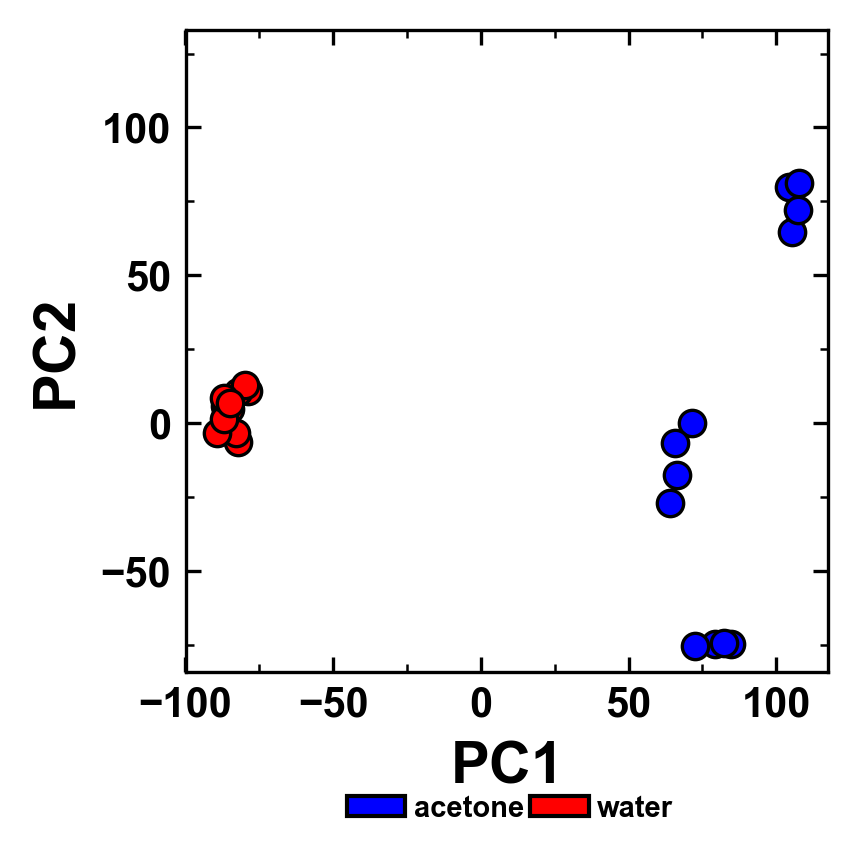

In [51]:
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator

labels = np.array([[0,1,2]])
if voc:
    labels = np.array([[0,1]])
labels = np.repeat(labels, 12, axis=1).flatten()

ss = StandardScaler()
pca = PCA(n_components=10)
X = ss.fit_transform(extracted_feat)
X_pca = pca.fit_transform(X)

pc_1 = 0
pc_2 = 1
fig = plt.figure(figsize=(4.5,3),dpi=300)
if cheese:
    cmap = plt.cm.get_cmap('viridis')
    color_fractions = np.array([[0.25,0.5,0.75]])
if liquor:
    cmap = plt.cm.get_cmap('cool')
    color_fractions = np.array([[0.25, 0.75,1.0]])
if oil:
    cmap = plt.cm.get_cmap('plasma')
    color_fractions = np.array([[0.0, 0.5,1.0]])
if voc:
    cmap = plt.cm.get_cmap('bwr')
    color_fractions = np.array([[0.0,1.0]])
color_fractions = np.repeat(color_fractions, 12, axis=1).flatten()
for i, color_fraction,label in zip(range(labels.shape[0]), color_fractions, labels):
    rgba = cmap(color_fraction)
    plt.scatter(X_pca[i,pc_1], X_pca[i,pc_2], s=40, alpha=1, facecolor=rgba, edgecolor='k', linewidth=0.8)
    plt.axis('square')
ax = plt.gca()
ax.minorticks_on()
# ax.set_ylim([-40,50])
# setting line width for all borders
line_width = 0.8
[i.set_linewidth(line_width) for i in ax.spines.values()]
# all the tick voodoo - location andsize
ax.tick_params(top=True, right=True)
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
# ax.tick_params(which='both', axis="y",direction="in")
# ax.tick_params(which='both', axis="x",direction="in")
ax.xaxis.set_tick_params(width=line_width)
ax.yaxis.set_tick_params(width=line_width)
# setting tick label size / style
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties('Arial')
    label.set_fontsize(10) 
    label.set_fontweight('bold')
# get the font and style of the axis labels
lfont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
ax.set_ylabel('PC{}'.format(pc_2+1), **lfont)
ax.set_xlabel('PC{}'.format(pc_1+1),**lfont)
# plt.title('5 cheese time course featurized PCA')

# making the legend and setting all its properties
hands = []
### change the values in the next list to match order!
# ok in the 3 samples we use 0,0.5 and 1 to max to difference, then map the new colors in the 5 sample case to either 0.25 or 0.75!

if cheese:
    sample_labels = ['cheddar', 'mahon', 'pecorino']
    sample_colors = [0.25,0.5,0.75]
if liquor:
    sample_labels = ['rum', 'vodka', 'whiskey'] 
    sample_colors = [0.25, 0.75,1.0]
if oil:
    sample_labels = ['canola', 'olive', 'walnut']
    sample_colors = [0.0, 0.5,1.0]
if voc:
    sample_labels = ['acetone', 'water']
    sample_colors = [0.0,1.0]

for i,label in zip(sample_colors, sample_labels): #
    rgba = cmap(i)
    p1 = mpatches.Patch(edgecolor='k', facecolor=rgba, label=label, alpha=1)
    hands.append(p1)
legend_prop = {'family':'Arial', 'size':7, 'weight':'bold'}
plt.legend(handles=hands, bbox_to_anchor=(0.8, -0.15), frameon=False, prop=legend_prop, handletextpad=0.3, labelspacing=0.1, ncol=3)
plt.tight_layout()
if cheese:
    plt.savefig('./3_cheese_20_selectors_PCA_4_5_6_20_PC{}-{}.png'.format(pc_1+1,pc_2+1))
if liquor:
    plt.savefig('./3_liquor_20_selectors_PCA_7_8_12_15_PC{}-{}.png'.format(pc_1+1,pc_2+1))
if oil:
    plt.savefig('./3_oil_20_selectors_PCA_4_7_9_13_PC{}-{}.png'.format(pc_1+1,pc_2+1))
if voc:
    plt.savefig('./2_voc_20_selectors_PC{}-{}.png'.format(pc_1+1,pc_2+1))
# if oil:
#     plt.savefig('./3_oil_20_selectors_PCA_PC{}-{}.png'.format(pc_1+1,pc_2+1))
# plt.gcf().clear()
plt.show()


# df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10'])
# mapper = {0:'rum', 1:'vodka', 2:'whiskey'}
# labels_names = [mapper[ele] for ele in labels]
# df['labels'] = labels_names
# df.to_csv('./3_liquor_4_selector_7-11-12-15_PCA.csv')


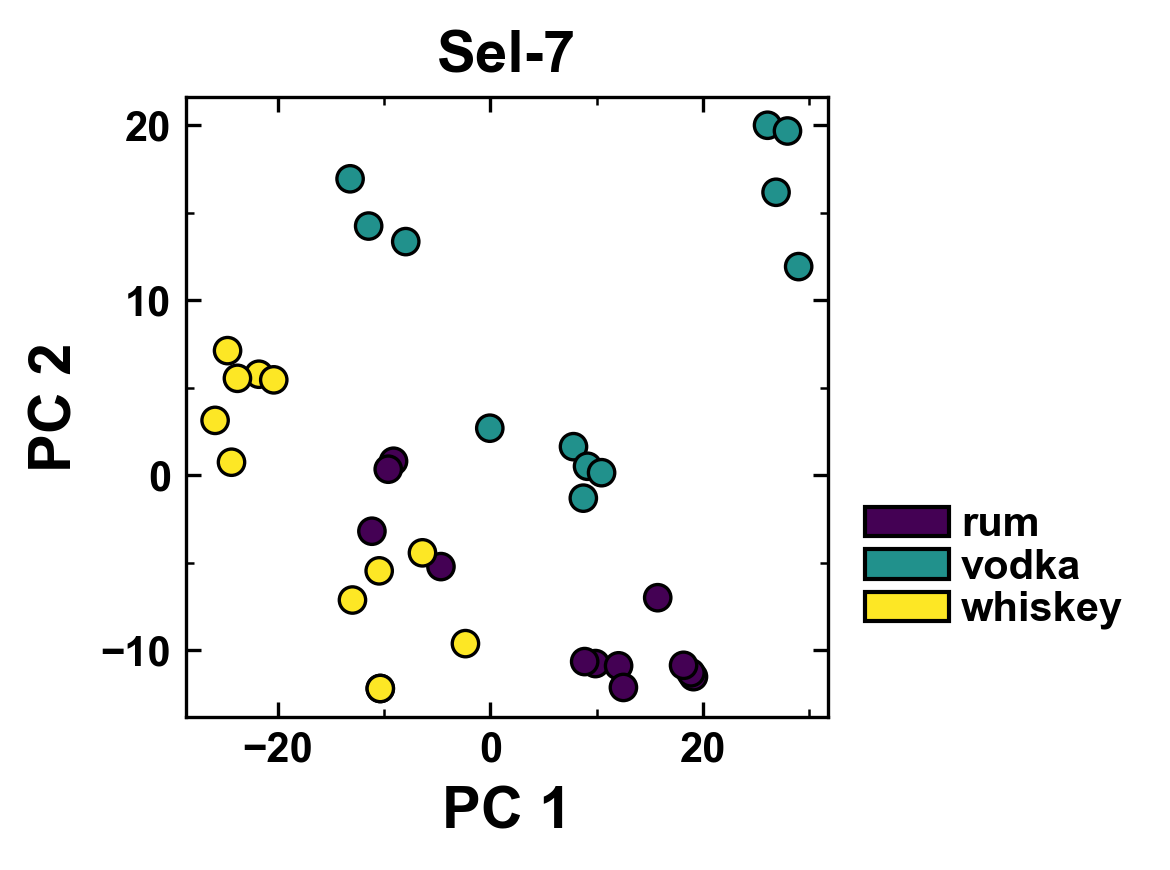

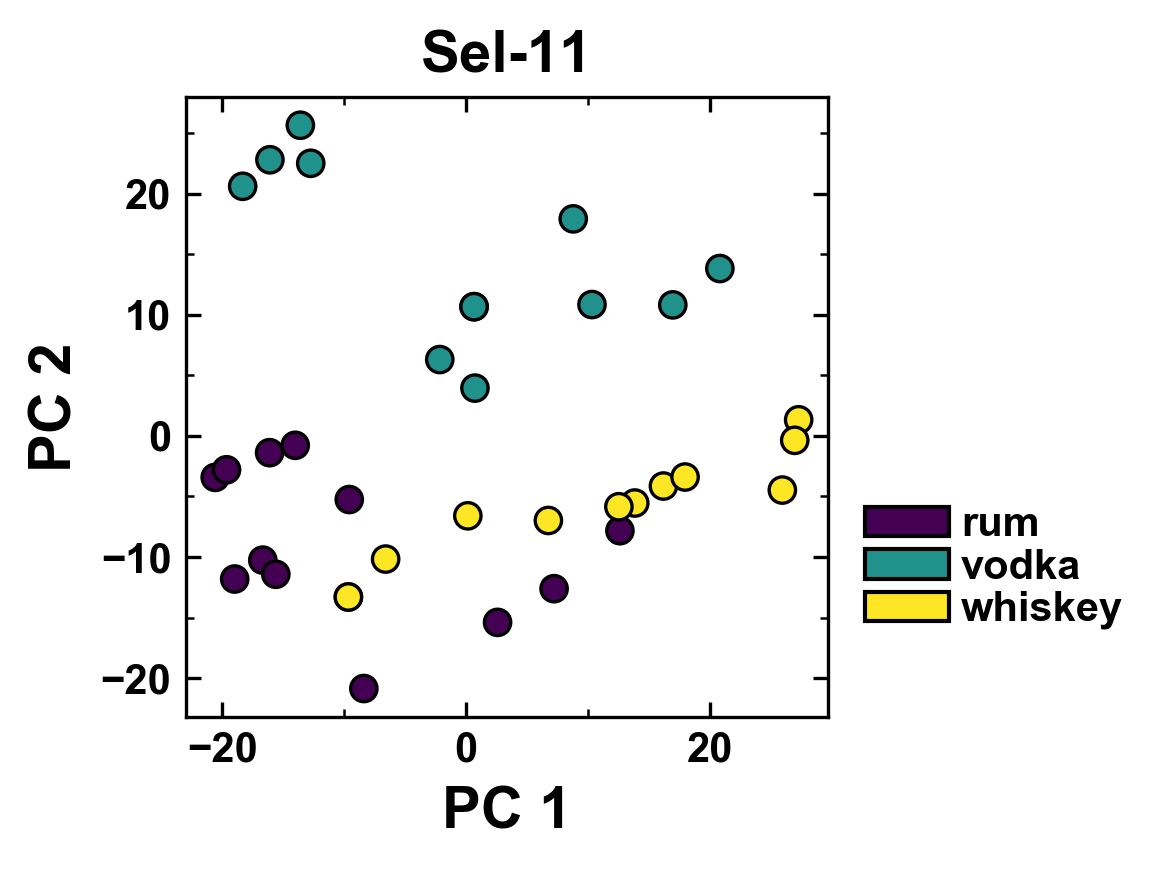

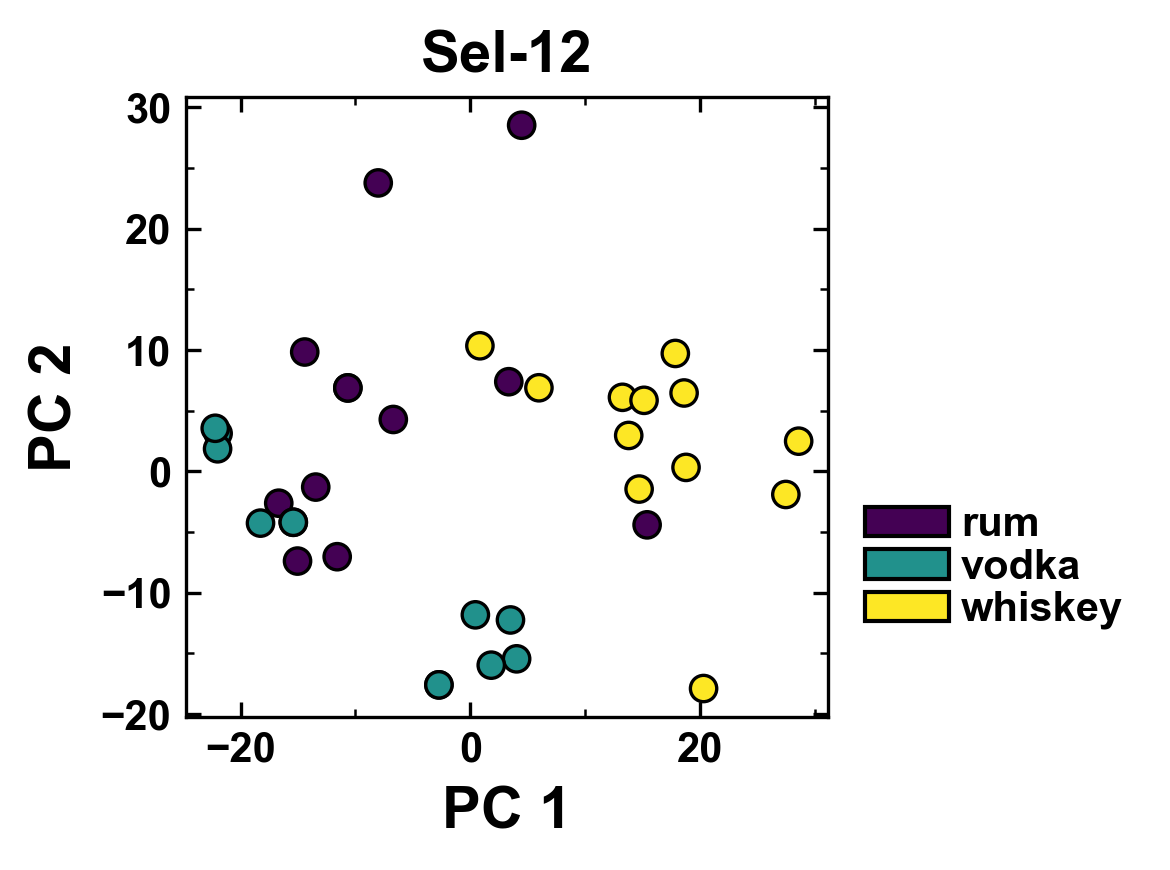

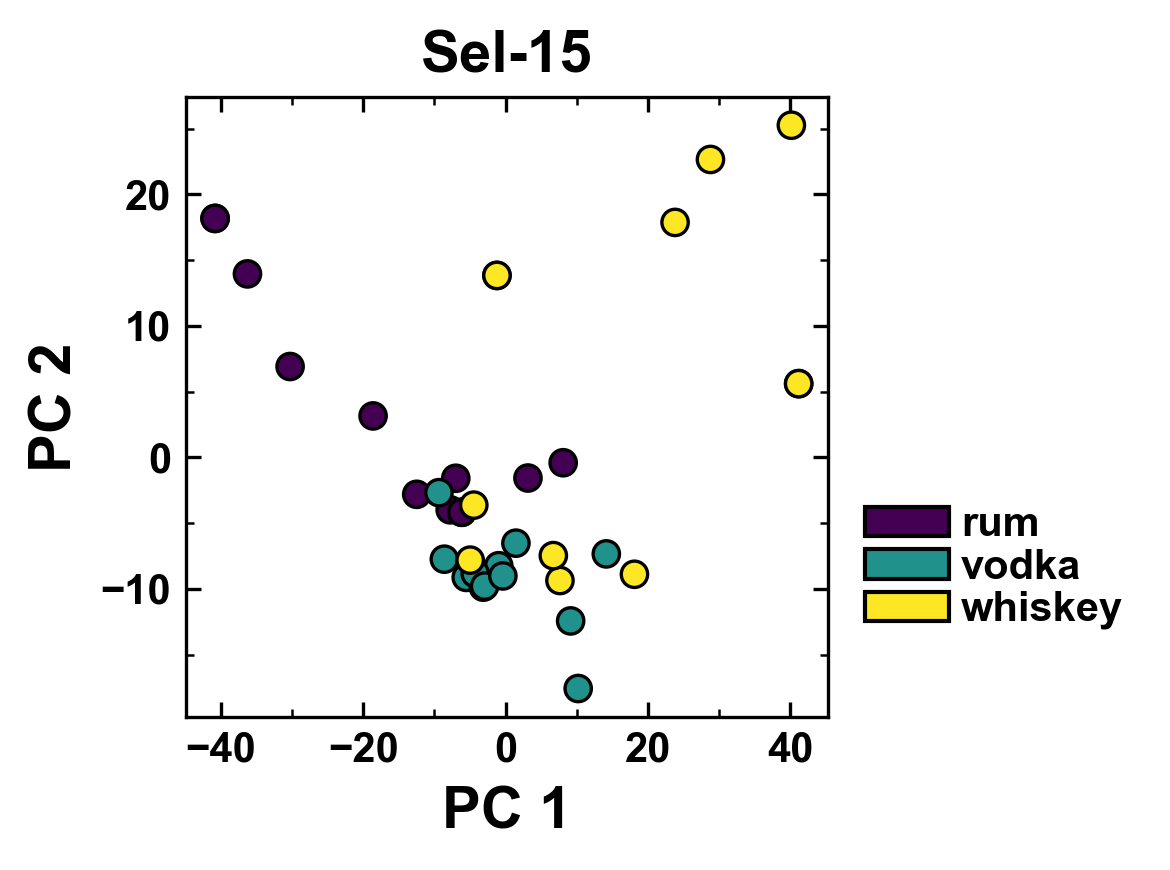

In [35]:
#### if you want to do PCA on the selectors individually...use this box, otherwise for selectors together use next
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator

labels = np.array([[0,1,2]])
labels = np.repeat(labels, 12, axis=1).flatten()

# get just the good selectors: 7,10,11,12

split_minextracted = np.split(minextracted.values,4, axis=1)
for single_minextracted,sel in zip(split_minextracted,['Sel-7', 'Sel-11', 'Sel-12', 'Sel-15']):

    ss = StandardScaler()
    pca = PCA(n_components=10)
    X = ss.fit_transform(single_minextracted)
    X_pca = pca.fit_transform(X)

    fig = plt.figure(figsize=(4,3),dpi=300)
    plt.scatter(X_pca[:,0], X_pca[:,1], s=40, alpha=1, c=labels, cmap='viridis', edgecolor='k', linewidth=0.8)
    ax = plt.gca()
    ax.minorticks_on()
    # ax.set_ylim([-40,50])
    # setting line width for all borders
    line_width = 0.8
    [i.set_linewidth(line_width) for i in ax.spines.values()]
    # all the tick voodoo - location and size
    ax.tick_params(top=True, right=True)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    # ax.tick_params(which='both', axis="y",direction="in")
    # ax.tick_params(which='both', axis="x",direction="in")
    ax.xaxis.set_tick_params(width=line_width)
    ax.yaxis.set_tick_params(width=line_width)
    # setting tick label size / style
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties('Arial')
        label.set_fontsize(10) 
        label.set_fontweight('bold')
    # get the font and style of the axis labels
    lfont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
    ax.set_ylabel('PC 2', **lfont)
    ax.set_xlabel('PC 1',**lfont)
    # plt.title('5 cheese time course featurized PCA')
    cmap = plt.cm.get_cmap('viridis')
    # making the legend and setting all its properties
    hands = []
    for i,label in zip([0,.5,1.0],['rum', 'vodka', 'whiskey']): #['cheddar', 'mahon', 'pecorino']
        rgba = cmap(i)
        p1 = mpatches.Patch(edgecolor='k', facecolor=rgba, label=label, alpha=1)
        hands.append(p1)
    legend_prop = {'family':'Arial', 'size':10, 'weight':'bold'}
    plt.title(sel, **lfont)
    plt.legend(handles=hands, bbox_to_anchor=(1, 0.4), frameon=False, prop=legend_prop, handletextpad=0.3, labelspacing=0.1)
    plt.tight_layout()
    plt.savefig('./liq_3_{}_PC1-2.png'.format(sel))
    # plt.gcf().clear()
    plt.show()

# df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10'])
# mapper = {0:'rum', 1:'vodka', 2:'whiskey'}
# labels_names = [mapper[ele] for ele in labels]
# df['labels'] = labels_names
# df.to_csv('./3_liquor_4_selector_7-11-12-15_PCA.csv')


In [39]:
    ##### FIRST KEY METHOD FOR FINDING SELECTORS ######

    # note score is an accuracy!! not auc
    classifier = 'RF'
    labels = np.array([[0,1,2]])
    if voc:
        labels = np.array([[0,1]])
    labels = np.repeat(labels, 12, axis=1).flatten()
    ### this select_features is a tsfresh function that im not 100% sure on how it works...so tending not to use
    # features_filtered = select_features(extracted_feat, labels)

    # ok need to get the names for the selectors and the ORDER they are in, in the dataframe..cause its not 1,2,3..20
    selector_names = list(extracted_feat)
    # selector_names = list(minextracted)
    seen = []
    for ele in selector_names:
        if ele[:3] not in seen:
            seen.append(ele[:3])
        else:
            pass
    selector_order = [ele[:-1] if ele[-1] == '_' else ele for ele in seen]

    # need to properly sort the df coming in so the blocks work! 
    if cheese:
        name_c = ['C1_{}'.format(i) for i in range(1,13)]
        name_m = ['M1_{}'.format(i) for i in range(1,13)]
        name_p = ['P1_{}'.format(i) for i in range(1,13)]
        names = name_c + name_m + name_p
    if liquor:
        name_r = ['R1_{}'.format(i) for i in range(1,13)]
        name_v = ['V1_{}'.format(i) for i in range(1,13)]
        name_w = ['W1_{}'.format(i) for i in range(1,13)]
        names = name_r + name_v + name_w   
    if oil:
        name_c = ['C1_{}'.format(i) for i in range(1,13)]
        name_o = ['O1_{}'.format(i) for i in range(1,13)]
        name_w = ['W1_{}'.format(i) for i in range(1,13)]
        names = name_c + name_o + name_w  
    if voc:
        name_a = ['A1_{}'.format(i) for i in range(1,13)]
        name_w = ['W1_{}'.format(i) for i in range(1,13)]
        names = name_a + name_w  
    print(extracted_feat)
    extracted_feat = extracted_feat.loc[names]
    # minextracted = minextracted.loc[names]

    # to properly do selection, going to keep the blocks of selectors together
    blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23],
              [24,25,26,27],[28,29,30,31],[32,33,34,35]]
    block_combos = [(0,3,6),(0,3,7),(0,3,8),(0,4,6),(0,4,7),(0,4,8),(0,5,6),(0,5,7),(0,5,8),
                    (1,3,6),(1,3,7),(1,3,8),(1,4,6),(1,4,7),(1,4,8),(1,5,6),(1,5,7),(1,5,8),
                    (2,3,6),(2,3,7),(2,3,8),(2,4,6),(2,4,7),(2,4,8),(2,5,6),(2,5,7),(2,5,8)]
    if voc:
        blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23]]
        block_combos = [(0,3),(0,4),(0,5),(1,3),(1,4),(1,5)]
    # ok loop over selectors, then get the data from one selector, then run a repeat of 20x with shuffling of train / test and get results 
    # FOR that selector
    accuracies = {}
    for j, sel_name in zip(range(20),selector_order): # looping over the selectors
        selector_accuracy = []
        for combo in block_combos: # looping over the different blocks 
            data_combined_sh, labels_sh = extracted_feat.values, labels
            if voc:
                mask_test = blocks[combo[0]]+blocks[combo[1]]
            else:
                mask_test = blocks[combo[0]]+blocks[combo[1]]+blocks[combo[2]]
            mask_train = [i for i in range(labels.shape[0]) if i not in mask_test]
            x_test =  data_combined_sh[mask_test,:]
            x_train =  data_combined_sh[mask_train,:]
            y_test = labels_sh[mask_test]
            y_train = labels_sh[mask_train]
            x_train, y_train = shuffle(x_train, y_train)
            # now split up for the different selectors 
            x_train_list = np.split(x_train,20, axis=1)
            x_test_list = np.split(x_test,20, axis=1)
            x_tr, x_ts = x_train_list[j], x_test_list[j]
            pred_test_combined = []
            clf = get_classifier(classifier)
            clf.fit(x_tr, y_train)
            selector_accuracy.append(clf.score(x_ts, y_test))
        selector_accuracy = np.asarray(selector_accuracy)
        accuracies[sel_name] = ['{:.3f}+/-{:.3f}'.format(selector_accuracy.mean(), selector_accuracy.std())]
    featurized_indiv_select_acc = pd.DataFrame.from_dict(accuracies)
    if cheese:
        featurized_indiv_select_acc.to_csv('./3_cheese_featurized_indiv_selector_accuracies.csv')
    if liquor:
        featurized_indiv_select_acc.to_csv('./3_liquor_featurized_indiv_selector_accuracies.csv')
    if oil:
        featurized_indiv_select_acc.to_csv('./3_oil_featurized_indiv_selector_accuracies.csv')
    if voc:
        featurized_indiv_select_acc.to_csv('./2_voc_featurized_indiv_selector_accuracies.csv')

variable  S10__abs_energy  S10__absolute_sum_of_changes  \
id                                                        
A1_1          1826.473143                     23.911412   
A1_10         2367.077555                     22.584740   
A1_11         2011.936035                     22.529137   
A1_12         2102.011295                     22.421914   
A1_2          1587.506167                     22.748013   
A1_3          2367.077555                     22.584740   
A1_4          2011.936035                     22.529137   
A1_5          1826.473143                     23.911412   
A1_6          1570.838713                     23.303314   
A1_7          1587.506167                     22.748013   
A1_8          1433.288912                     21.724109   
A1_9          2071.359893                     21.724351   
W1_1            66.874799                      1.259825   
W1_10           23.758081                      1.179373   
W1_11           36.987734                      1.355224 

In [8]:
##### FIRST KEY METHOD FOR FINDING SELECTORS ######

# note score is an accuracy!! not auc
classifier = 'RF'
labels = np.array([[0,1,2]])
labels = np.repeat(labels, 12, axis=1).flatten()
### this select_features is a tsfresh function that im not 100% sure on how it works...so tending not to use
# features_filtered = select_features(extracted_feat, labels)

# ok need to get the names for the selectors and the ORDER they are in, in the dataframe..cause its not 1,2,3..20
selector_names = list(extracted_feat)
num_selectors = 20
# selector_names = list(minextracted)
seen = []
for ele in selector_names:
    if ele[:3] not in seen:
        seen.append(ele[:3])
    else:
        pass
selector_order = [ele[:-1] if ele[-1] == '_' else ele for ele in seen]

# need to properly sort the df coming in so the blocks work! 
if cheese:
    name_c = ['C1_{}'.format(i) for i in range(1,13)]
    name_m = ['M1_{}'.format(i) for i in range(1,13)]
    name_p = ['P1_{}'.format(i) for i in range(1,13)]
    names = name_c + name_m + name_p
if liquor:
    name_r = ['R1_{}'.format(i) for i in range(1,13)]
    name_v = ['V1_{}'.format(i) for i in range(1,13)]
    name_w = ['W1_{}'.format(i) for i in range(1,13)]
    names = name_r + name_v + name_w   
if oil:
    name_c = ['C1_{}'.format(i) for i in range(1,13)]
    name_o = ['O1_{}'.format(i) for i in range(1,13)]
    name_w = ['W1_{}'.format(i) for i in range(1,13)]
    names = name_c + name_o + name_w   
extracted_feat = extracted_feat.loc[names]

# ok loop over selectors, then get the data from one selector, then run a repeat of 20x with shuffling of train / test and get results 
# FOR that selector
accuracies = {}
for j, sel_name in zip(range(20),selector_order): # looping over the selectors
    print(sel_name, j)
    selector_accuracy = []
    for i in range(10): 
        data_combined_sh, labels_sh = shuffle(extracted_feat.values, labels)
        x_train, x_test, y_train, y_test = train_test_split(data_combined_sh, labels_sh, test_size=0.2)
        x_train_list = np.split(x_train,num_selectors, axis=1)
        x_test_list = np.split(x_test,num_selectors, axis=1)
        # now split up for the different selectors 
        x_tr, x_ts = x_train_list[j], x_test_list[j]
        pred_test_combined = []
        clf = get_classifier(classifier)
        clf.fit(x_tr, y_train)
        selector_accuracy.append(clf.score(x_ts, y_test))
    selector_accuracy = np.asarray(selector_accuracy)
    accuracies[sel_name] = ['{:.3f}+/-{:.3f}'.format(selector_accuracy.mean(), selector_accuracy.std())]
featurized_indiv_select_acc = pd.DataFrame.from_dict(accuracies)
if cheese:
    featurized_indiv_select_acc.to_csv('./notblocked_3_cheese_featurized_indiv_selector_accuracies.csv')
if liquor:
    featurized_indiv_select_acc.to_csv('./notblocked_3_liquor_featurized_indiv_selector_accuracies.csv')
if oil:
    featurized_indiv_select_acc.to_csv('./notblocked_3_oil_featurized_indiv_selector_accuracies.csv')

S10 0
S11 1
S12 2
S13 3
S14 4
S15 5
S16 6
S17 7
S18 8
S19 9
S1 10
S20 11
S2 12
S3 13
S4 14
S5 15
S6 16
S7 17
S8 18
S9 19


In [22]:
##### NOT IMPORTANT FOR FINDING USEFUL SELECTORS - JUST SHOWING THE VOTING OVER ALL SELECTORS WITH FEATURES IS GOO

# just for training a model with voting from all features...it gets 1 auc...
classifier = 'RF'
labels = np.array([[0,1,2]])
labels = np.repeat(labels, 12, axis=1).flatten()
### this select_features is a tsfresh function that im not 100% sure on how it works...so tending not to use
# features_filtered = select_features(extracted_feat, labels)
# features_filtered.shape

# data_combined_sh, labels_sh = shuffle(extracted_feat.values, labels)
data_combined_sh, labels_sh = shuffle(minextracted.values, labels)
x_train, x_test, y_train, y_test = train_test_split(data_combined_sh, labels_sh, test_size=0.15)
# 20 splits due to 20 selectors!
# x_train_list = np.split(x_train,20, axis=1)
# x_test_list = np.split(x_test,20, axis=1)
x_train_list = np.split(x_train,3, axis=1)
x_test_list = np.split(x_test,3, axis=1)
# this 794 is from the number of features each of the selectors has in the new df...might need to change
# you can get it from the commented out code at the end of this cell...'note see above....' this chunk

accuracies = []
# for j in range(20):
for j in range(4):
    pred_test_combined = []
    for x_tr, x_ts in zip(x_train_list,x_test_list):
        clf = get_classifier(classifier)
        clf.fit(x_tr, y_train)
        pred_test_combined.append(clf.predict(x_ts))
    pred_test_combined = np.concatenate(pred_test_combined)
    pred_test_combined = pred_test_combined.reshape((-1,y_test.shape[0]))
    combined_vote = []
    for i in range(y_test.shape[0]):
        unique, counts = np.unique(pred_test_combined[:,i], return_counts=True)
        counts = dict(zip(unique, counts))
        majority = get_majority_vote(counts)
        combined_vote.append(majority)
    combined_vote = np.asarray(combined_vote)
    accuracies.append(accuracy_score(y_test, combined_vote))
accuracies = np.asarray(accuracies)
print('the accuracy is ', accuracies.mean(), '+/-', accuracies.std())

the accuracy is  1.0 +/- 0.0


In [40]:
##### SECOND MAIN WAY FOR SELECTING THE SELECTORS TO CARRY ON WITH:
##### Idea is to train models (KNN or GP etc) using a time cource-to-time course distance function then classify that way
##### Do it selector by selector to see which has the most signal 

# do you want to randomly drop parts of the input and shuffle to avoid dependence between features (ie different time points
# in a single time course)
random_drop = False
num_to_keep = 50
# what time window do you want to use?
start = 300
end = 600
classifier = 'KNN' # Use LR - logistic regression, RF - random forest, KNN - k-nearest neighbors, SVM - support vector machine
# fit models on all combos of the data blocks: 

### CHANGE FOR 2 v 3 cheeses 
# blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23]]
# block_combos = [(0,3),(0,4),(0,5),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)]
blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23],
          [24,25,26,27],[28,29,30,31],[32,33,34,35],[36,37,38,39],[40,41,42,43],[]]
block_combos = [(0,3,6),(0,3,7),(0,3,8),(0,4,6),(0,4,7),(0,4,8),(0,5,6),(0,5,7),(0,5,8),
                (1,3,6),(1,3,7),(1,3,8),(1,4,6),(1,4,7),(1,4,8),(1,5,6),(1,5,7),(1,5,8),
                (2,3,6),(2,3,7),(2,3,8),(2,4,6),(2,4,7),(2,4,8),(2,5,6),(2,5,7),(2,5,8)]
if voc:
    blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23]]
    block_combos = [(0,3),(0,4),(0,5),(1,3),(1,4),(1,5)]

#get a array for the labels for the wines...there are four wines so four labels
###  CHANGE FOR 2 v 3 cheeses
# labels = np.array([[0,1]])
labels = np.array([[0,1,2]])
if voc:
    labels = np.array([[0,1]])
labels = np.repeat(labels, 12, axis=1).flatten()

# ok now run on individual selectors for each of the blocks of train / test
# its called a selector drop list but in reality its just the selector thats used....
selector_drop_list = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20]]
selector_acc_dict = {}
s = 1
for selector_list in selector_drop_list:
    accuracies = []
    for combo in block_combos:
        pred_test_combined = []
        # retrieve the selector data for the specific selector
        for i in selector_list:
            selector = []
            for w in sorted(data.keys()):
                selector_data = data[w]['S'+str(i)]
                # In case data is missing this imputes via the mean; probably a better idea to just drop...
                # (but the ethanol-water does not have this issue)
                selector_data = selector_data.T.fillna(selector_data.mean(axis=1)).T 
                selector.append(selector_data)
            selector = pd.concat(selector, axis=1)
            selector = selector.values.T
            selector = selector[:, start:end]
            if random_drop:
                rand_kept = np.random.choice(selector.shape[1], num_to_keep)
                selector = selector[:,rand_kept]
            #### CRITICAL TO CHANGE
            if voc:
                mask_test = blocks[combo[0]]+blocks[combo[1]]
            else:
                mask_test = blocks[combo[0]]+blocks[combo[1]]+blocks[combo[2]]
#             mask_test = blocks[combo[0]]+blocks[combo[1]]
            mask_train = [i for i in range(labels.shape[0]) if i not in mask_test]
            x_test = selector[mask_test,:]
            x_train = selector[mask_train,:]
            y_test = labels[mask_test]
            y_train = labels[mask_train]
            
            clf = get_classifier(classifier)
            x_train, y_train = shuffle(x_train, y_train)
            clf.fit(x_train, y_train)
            accuracies.append(clf.score(x_test, y_test))
    accuracies = np.asarray(accuracies)
    selector_acc_dict['sel_{}'.format(s)] = ['{:.3f}+/-{:.3f}'.format(accuracies.mean(), accuracies.std())]
    s += 1
featurized_indiv_select_acc = pd.DataFrame.from_dict(selector_acc_dict)
if cheese:
    featurized_indiv_select_acc.to_csv('./3_cheese_{}_finding_selector_accuracies.csv'.format(classifier))
if liquor:
    featurized_indiv_select_acc.to_csv('./3_liquor_{}_finding_selector_accuracies.csv'.format(classifier))
if oil:
    featurized_indiv_select_acc.to_csv('./3_oil_{}_finding_selector_accuracies.csv'.format(classifier))
if voc:
    featurized_indiv_select_acc.to_csv('./2_voc_{}_finding_selector_accuracies.csv'.format(classifier))
featurized_indiv_select_acc    
             
#             pred_test_combined.append(clf.predict(x_test)) # might be better to work with probablilites... predict_proba
#         pred_test_combined = np.concatenate(pred_test_combined)
#         pred_test_combined = pred_test_combined.reshape((-1,y_test.shape[0]))
#         combined_vote = []
#         for i in range(y_test.shape[0]):
#             unique, counts = np.unique(pred_test_combined[:,i], return_counts=True)
#             counts = dict(zip(unique, counts))
#             majority = get_majority_vote(counts)
#             combined_vote.append(majority)
#         combined_vote = np.asarray(combined_vote)
#         accuracies.append(accuracy_score(y_test, combined_vote))
#     accuracies = np.asarray(accuracies)
# #     print('accuracy list:', accuracies)
#     print('when removing selector {}, the accuracy is '.format(s), accuracies.mean(), '+/-', accuracies.std())
#     s += 1
    
###### notes from trying different params:    
    
    # for 2 cheeses with KNN = 1
    # S1:0.47, S2:0.54, S3:0.60, S4:0.90, S5:0.875, S6:0.92, S7:0.79, S8:0.53, S9:0.43, S10:0.81,
    # S11:0.42, S12:0.56, S13:0.44, S14:0.19, S15:0.47, S16:0.57, S17:0.47, S18:0.46, S19:0.34, S20:0.625
    
    # for 3 cheeses with KNN = 1
    # s1:0.32 s2:0.35 s3:0.52 s4:0.85 s5:0.60 s6:0.77 s7:0.64 s8:0.54 s9:0.43 s10:0.5 
    # s11:0.26 s12:0.32 s13:0.48 s14:0.28 s15:0.45 s16:0.16 s17:0.50 s18:0.46 s19:0.33 s20: 0.75
    # positive signal >0.4: 3,4,5,6,7,8,9,10,13,15,17,18,20
    # positive signal >=0.5: 3,4,5,6,7,8,10,17,20
    # positive signal >0.5: 3,4,5,6,7,8,20
    # psotive signal >=0.6: 4,5,6,7,20
    
    # for GP with RBF
    # S1:0.21, S2:0.37, S3:0.49, S4:0.84, S5:0.70, S6:0.79, S7:0.66, S8:0.59, S9:0.37, S10:0.47
    # S11:0.26, S12:0.42, S13:0.55, S14:0.32, S15:0.5, S16:0.19, S17:0.52, S18:0.45, S19:0.29, S20:0.80

sel_1          sel_2          sel_3          sel_4          sel_5  \
0  1.000+/-0.000  1.000+/-0.000  1.000+/-0.000  1.000+/-0.000  1.000+/-0.000   

           sel_6          sel_7          sel_8          sel_9         sel_10  \
0  1.000+/-0.000  1.000+/-0.000  1.000+/-0.000  1.000+/-0.000  1.000+/-0.000   

          sel_11         sel_12         sel_13         sel_14         sel_15  \
0  1.000+/-0.000  0.938+/-0.062  1.000+/-0.000  1.000+/-0.000  0.917+/-0.118   

          sel_16         sel_17         sel_18         sel_19         sel_20  
0  1.000+/-0.000  1.000+/-0.000  1.000+/-0.000  1.000+/-0.000  0.958+/-0.059

In [58]:
# do you want to randomly drop parts of the input and shuffle to avoid dependence between features (ie different time points
# in a single time course)
random_drop = False
num_to_keep = 50
# what time window do you want to use?
start = 300
end = 600
classifier = 'GP' # Use LR - logistic regression, RF - random forest, KNN - k-nearest neighbors, SVM - support vector machine
# fit models on all combos of the data blocks: 

### CHANGE FOR 2 v 3 cheeses 
# blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23]]
# block_combos = [(0,3),(0,4),(0,5),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)]
blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23],
          [24,25,26,27],[28,29,30,31],[32,33,34,35],[36,37,38,39],[40,41,42,43],[]]
block_combos = [(0,3,6),(0,3,7),(0,3,8),(0,4,6),(0,4,7),(0,4,8),(0,5,6),(0,5,7),(0,5,8),
                (1,3,6),(1,3,7),(1,3,8),(1,4,6),(1,4,7),(1,4,8),(1,5,6),(1,5,7),(1,5,8),
                (2,3,6),(2,3,7),(2,3,8),(2,4,6),(2,4,7),(2,4,8),(2,5,6),(2,5,7),(2,5,8)]

#get a array for the labels for the wines...there are four wines so four labels
###  CHANGE FOR 2 v 3 cheeses
# labels = np.array([[0,1]])
labels = np.array([[0,1,2]])
labels = np.repeat(labels, 12, axis=1).flatten()

# ok now run on individual selectors for each of the blocks of train / test
# its called a selector drop list but in reality its just the selector thats used....
selector_drop_list = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20]]
selector_acc_dict = {}
s = 1
for selector_list in selector_drop_list:
    accuracies = []
    for combo in block_combos:
        pred_test_combined = []
        # retrieve the selector data for the specific selector
        for i in selector_list:
            selector = []
            for w in sorted(data.keys()):
                selector_data = data[w]['S'+str(i)]
                # In case data is missing this imputes via the mean; probably a better idea to just drop...
                # (but the ethanol-water does not have this issue)
                selector_data = selector_data.T.fillna(selector_data.mean(axis=1)).T 
                selector.append(selector_data)
            selector = pd.concat(selector, axis=1)
            selector = selector.values.T
            selector = selector[:, start:end]
            
            
            selector = selector[:, np.random.permutation(selector.shape[1])]
            
            
#             selector = selector.sample(frac=1)
#             print(selector.head())
            if random_drop:
                rand_kept = np.random.choice(selector.shape[1], num_to_keep)
                selector = selector[:,rand_kept]
            #### CRITICAL TO CHANGE
            mask_test = blocks[combo[0]]+blocks[combo[1]]+blocks[combo[2]]
#             mask_test = blocks[combo[0]]+blocks[combo[1]]
            mask_train = [i for i in range(labels.shape[0]) if i not in mask_test]
            x_test = selector[mask_test,:]
            x_train = selector[mask_train,:]
            y_test = labels[mask_test]
            y_train = labels[mask_train]
            
            clf = get_classifier(classifier)
            x_train, y_train = shuffle(x_train, y_train)
            clf.fit(x_train, y_train)
            comp_kernel = clf.kernel_
            
            print(comp_kernel.n_dims)
            accuracies.append(clf.score(x_test, y_test))
    accuracies = np.asarray(accuracies)
    selector_acc_dict['sel_{}'.format(s)] = ['{:.3f}+/-{:.3f}'.format(accuracies.mean(), accuracies.std())]
    s += 1
featurized_indiv_select_acc = pd.DataFrame.from_dict(selector_acc_dict)
if cheese:
    featurized_indiv_select_acc.to_csv('./3_cheese_{}_finding_selector_accuracies.csv'.format(classifier))
if liquor:
    featurized_indiv_select_acc.to_csv('./3_liquor_{}_finding_selector_accuracies.csv'.format(classifier))
if oil:
    featurized_indiv_select_acc.to_csv('./3_oil_{}_finding_selector_accuracies.csv'.format(classifier))
featurized_indiv_select_acc

TypeError: 'CompoundKernel' object is not iterable

This following cell is for using each selector individually with kNN, RF, lr and SVM classifiers and then using majority voting over the classifier. its more for playing around with the 'optimal' selectors from the previous cell... <br>
NOT GOOD ML PRACTICE DONT USE IN PRODUCTION...WE ARE GETTING ADDITIONAL DATA USING THE OPTIMIZED SELECTORS

In [27]:
##### NOT USED FOR OBTAINING OPTIMAL SELECTORS...its just to play around with how select ones would do
##### (note due to small data the same data is used that was used for finding the optimal selectors...so dont use in practice)
##### this block is for testing models using KNN etc type classifiers with select selector lists in a blocked manner

# do you want to randomly drop parts of the input and shuffle to avoid dependence between features (ie different time points
# in a single time course)
random_drop = False
num_to_keep = 50
# what time window do you want to use?
start = 300
end = 600
classifier = 'KNN' # Use LR - logistic regression, RF - random forest, KNN - k-nearest neighbors, SVM - support vector machine
# fit models on all combos of the data blocks: 
# blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23]]
# block_combos = [(0,3),(0,4),(0,5),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)]

blocks = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19],[20,21,22,23],
          [24,25,26,27],[28,29,30,31],[32,33,34,35]]
block_combos = [(0,3,6),(0,3,7),(0,3,8),(0,4,6),(0,4,7),(0,4,8),(0,5,6),(0,5,7),(0,5,8),
                (1,3,6),(1,3,7),(1,3,8),(1,4,6),(1,4,7),(1,4,8),(1,5,6),(1,5,7),(1,5,8),
                (2,3,6),(2,3,7),(2,3,8),(2,4,6),(2,4,7),(2,4,8),(2,5,6),(2,5,7),(2,5,8)]

4,5,7,9,10,13,20

#get a array for the labels for the wines...there are four wines so four labels
# labels = np.array([[0,1]])
labels = np.array([[0,1,2]])
labels = np.repeat(labels, 12, axis=1).flatten()

# selector_lists = []
# s_list = [3,4,5,6,7,8,10,20]
# for L in range(2, len(s_list)+1):
#     for com in itertools.combinations(s_list,L):
#         selector_lists.append(com)
# for liq: [7, 11, 12],[10, 11, 12],[7, 10, 11, 12], [17,18, 19],[7, 9, 12], [7, 10, 12], [7,12,15]
selector_lists = [[4,5,7,9], [4,5,7,10],[4,5,7,13],[4,5,7,20]] ####### CHANGE THIS!!!!!! #######

for selector_list in selector_lists:
    print('selector list is: ', selector_list)
    accuracies = []
    for combo in block_combos:
#         print('On combo: ', combo)
        # each combo will give 20 models where each 
        pred_test_combined = []
    #     selector_list = [3,4,5,6,7,8,10,20]
        # 2 cheeses:
        # 4,5,10 = 0.90 +- 0.08
        # 4,5,6 = 0.99 +- 0.04
        # 4,5,6,10 = 0.93 +- 0.06
        # 4,5,6,7,10 = 0.94 +- 0.06
        
        # for 3 cheeses:
        # 4,5,6 = 0.83 +- 0.09
        # 4,6,20 = .94 +- 0.07
        # 4,5,6,7,20 = 0.91+-0.11
        # 3,4,5,6,7,20 = 0.89 +-0.10
        # 4,5,6,7,8,20 = 0.88 +- 0.11
        # 3,4,5,6,7,8,20 = 0.91 +-0.11
        # 3,4,5,6,7,8,10,20 = 0.87 +- 0.12
        
        # GP:
        # 4,6,20 = 0.95 +- 0.06
        # 4,5,6,20 = 0.92 +- 0.07
        # 4,5,6,7,20 = 0.93 +- 0.07
        
        # GP liq:
        # [7, 11, 12] = 0.75 +/- 0.14
        # [10, 11, 12] = 0.77 +/- 0.20
        # [7, 10, 11, 12] = 0.78 +/- 0.17
        # [17,18, 19] = 0.14 +/- 0.15 testing to show its actually bad 
        # [7, 9, 12] = 0.69 +/- 0.16
        # [7, 10, 12] = 0.73 +/- 0.19
        # [7, 12, 15] = 0.68 +/- 0.17
        
        # KNN liq:
        # [7, 11, 12] = 0.74 +/- 0.13
        # [10, 11, 12] = 0.65 +/- 0.24
        # [7, 10, 11, 12] = 0.71 +/- 0.14
        # [17,18, 19] = 0.16 +/- 0.15  testing to show its actually bad 
        # [7, 9, 12] = 0.68 +/- 0.15
        # [7, 10, 12] = 0.69 +/- 0.20
        # [7, 12, 15] = 0.68 +/- 0.16
        
        for i in selector_list:
    #     for i in range(1,21):
            selector = []
            for w in sorted(data.keys()):
                selector_data = data[w]['S'+str(i)]
                # In case data is missing this imputes via the mean; probably a better idea to just drop...
                # (but the ethanol-water does not have this issue)
                selector_data = selector_data.T.fillna(selector_data.mean(axis=1)).T 
                selector.append(selector_data)
            selector = pd.concat(selector, axis=1)
            selector = selector.values.T
            selector = selector[:, start:end]
            if random_drop:
                rand_kept = np.random.choice(selector.shape[1], num_to_keep)
                selector = selector[:,rand_kept]
            ##### CRITICAL TO CHANGE!!!!
#             mask_test = blocks[combo[0]]+blocks[combo[1]]
            mask_test = blocks[combo[0]]+blocks[combo[1]]+blocks[combo[2]]
            mask_train = [i for i in range(labels.shape[0]) if i not in mask_test]
            x_test = selector[mask_test,:]
            x_train = selector[mask_train,:]
            y_test = labels[mask_test]
            y_train = labels[mask_train]

            clf = get_classifier(classifier)
            x_train, y_train = shuffle(x_train, y_train)
            clf.fit(x_train, y_train)
            pred_test_combined.append(clf.predict(x_test)) # might be better to work with probablilites... predict_proba
        pred_test_combined = np.concatenate(pred_test_combined)
        pred_test_combined = pred_test_combined.reshape((-1,y_test.shape[0]))
        combined_vote = []
        for i in range(y_test.shape[0]):
            unique, counts = np.unique(pred_test_combined[:,i], return_counts=True)
            counts = dict(zip(unique, counts))
            majority = get_majority_vote(counts)
            combined_vote.append(majority)
        combined_vote = np.asarray(combined_vote)
        accuracies.append(accuracy_score(y_test, combined_vote))
    accuracies = np.asarray(accuracies)
    print(accuracies.mean(), '+/-', accuracies.std())

selector list is:  [4, 5, 7]
0.5308641975308641 +/- 0.14190819669842777
selector list is:  [4, 5, 9]
0.6234567901234568 +/- 0.1404914404535931
selector list is:  [4, 5, 10]
0.4876543209876544 +/- 0.14993775063569284
selector list is:  [4, 5, 13]
0.5925925925925926 +/- 0.12896655812207516
selector list is:  [4, 5, 20]
0.6296296296296297 +/- 0.14581496062984836
selector list is:  [5, 7, 9]
0.5617283950617283 +/- 0.13531055689372204
selector list is:  [5, 7, 10]
0.4444444444444444 +/- 0.10638078975070424
selector list is:  [5, 7, 13]
0.5740740740740741 +/- 0.0916619901538117
selector list is:  [5, 7, 20]
0.5740740740740741 +/- 0.10718367502583542
selector list is:  [7, 9, 10]
0.5277777777777778 +/- 0.1937819401523736
selector list is:  [7, 9, 13]
0.6018518518518519 +/- 0.21675370205036343
selector list is:  [7, 9, 20]
0.6820987654320987 +/- 0.16360936149010583
selector list is:  [9, 10, 13]
0.5617283950617284 +/- 0.20234300497634275
selector list is:  [9, 10, 20]
0.5462962962962963 +/- 0.

OK a few cute plotting boxes...showing the time courses and also calculating and visualizing the distances between time courses!

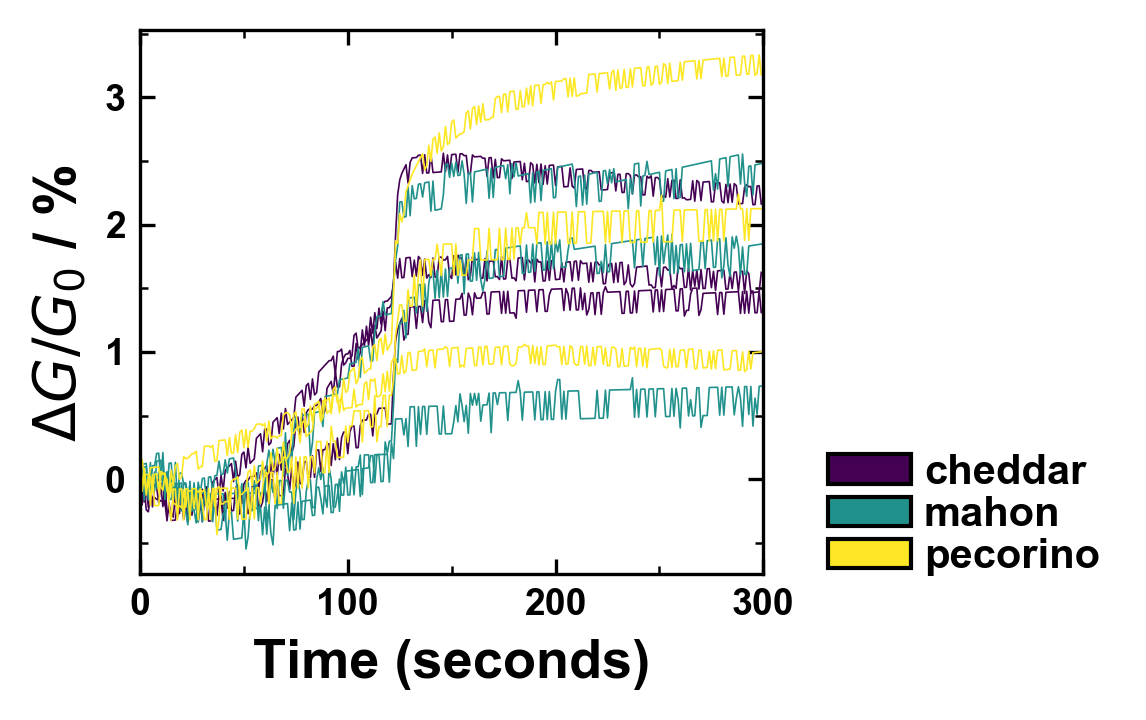

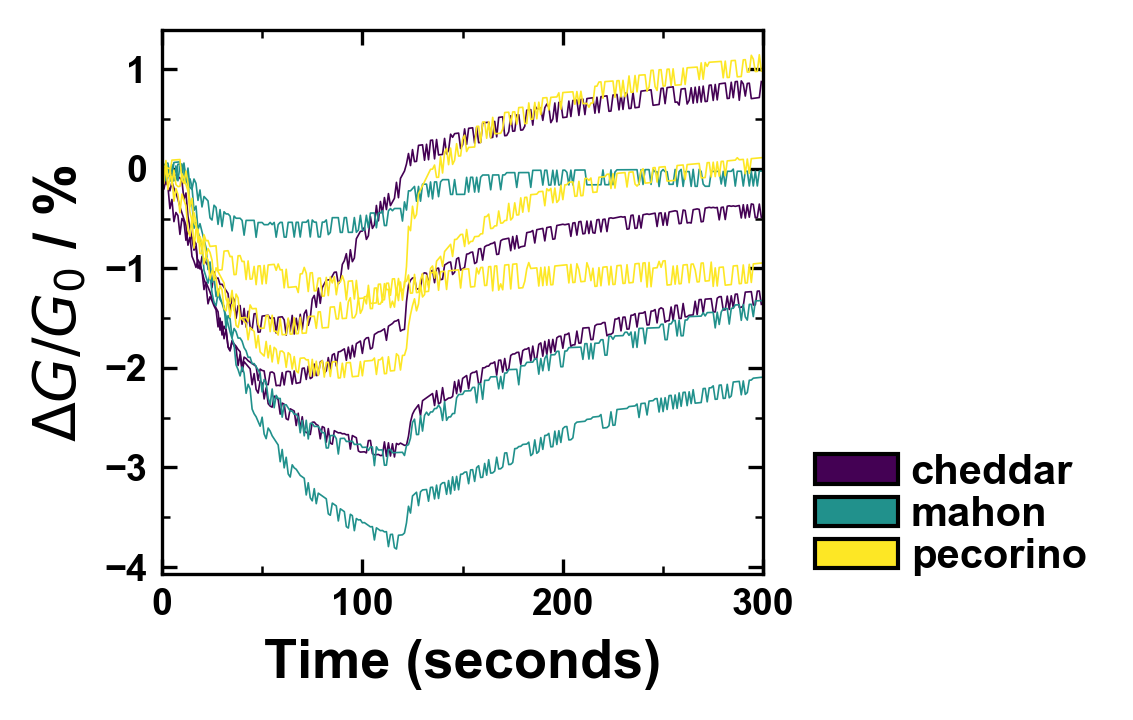

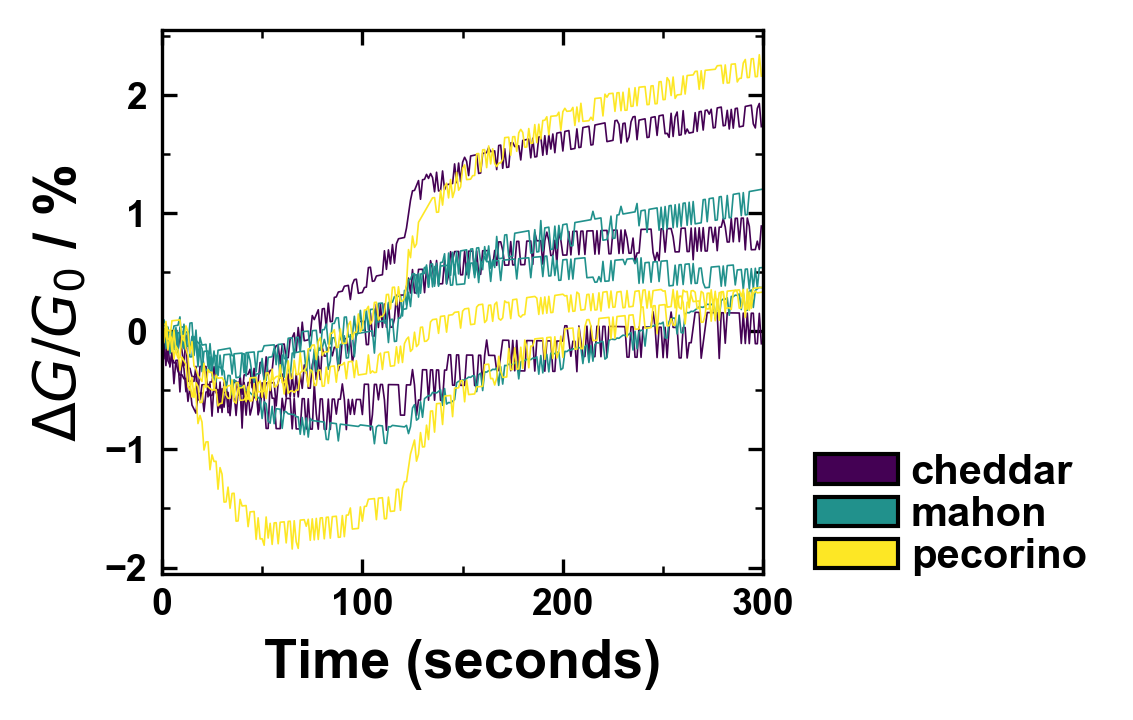

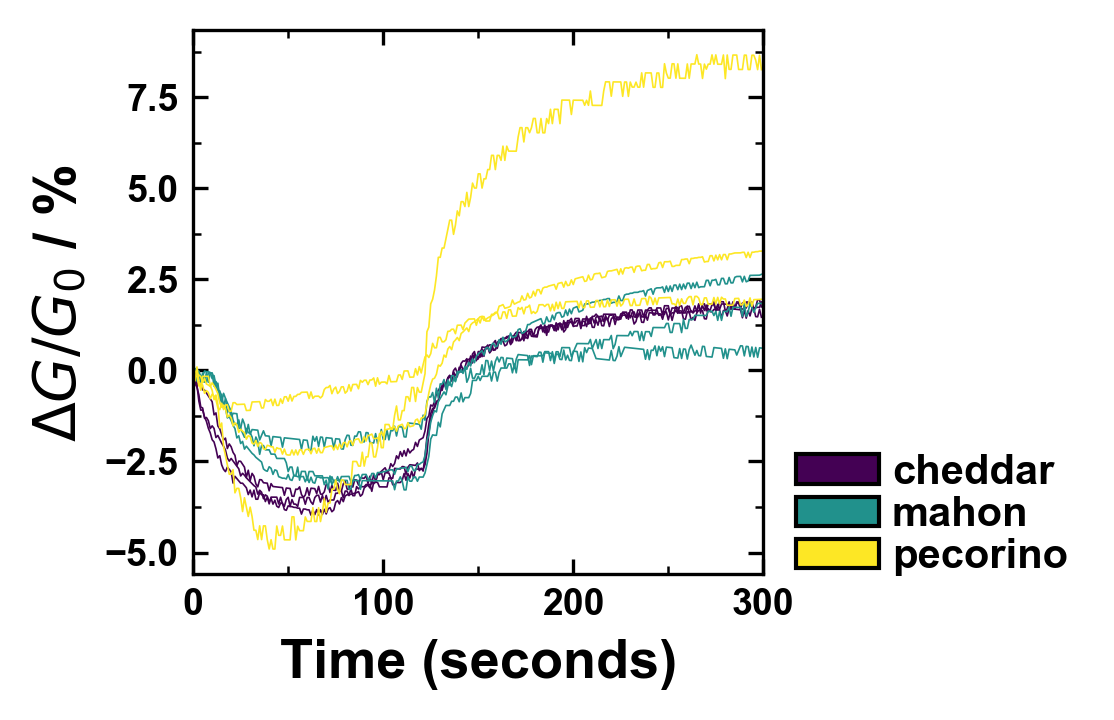

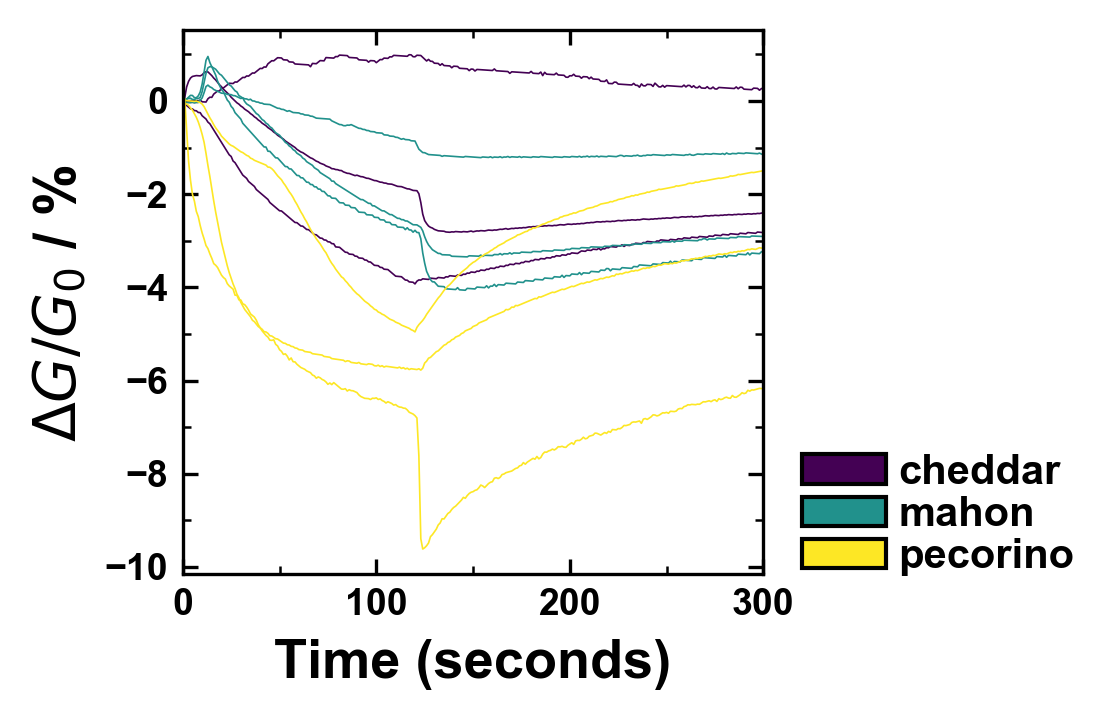

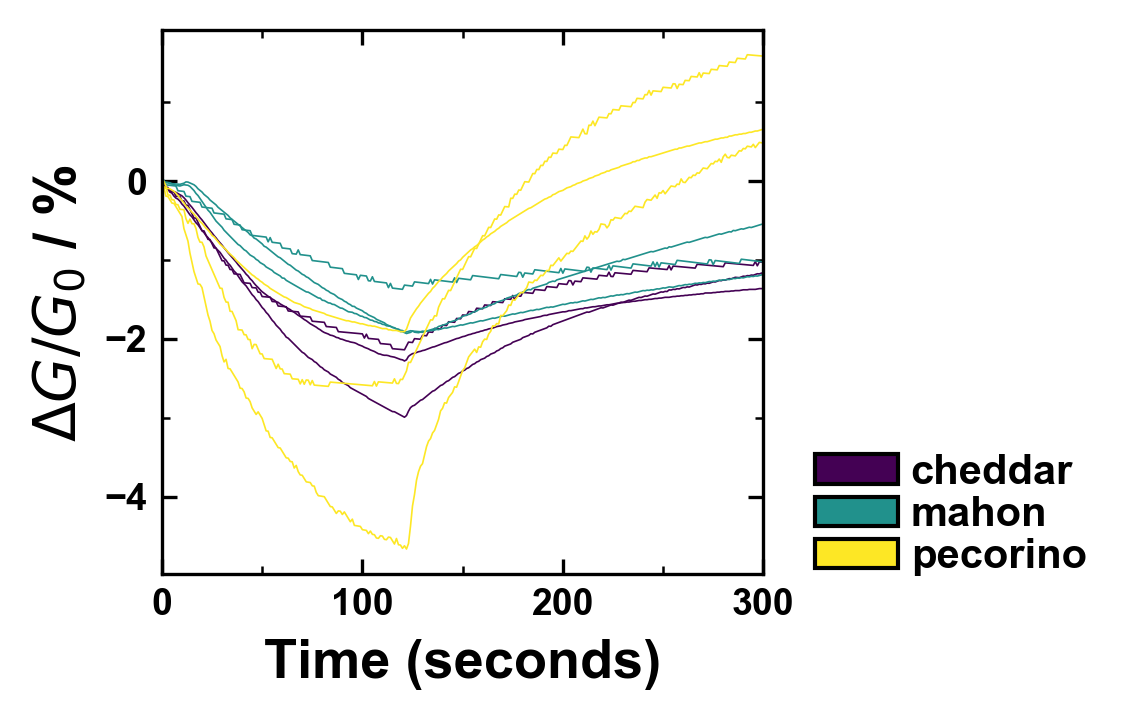

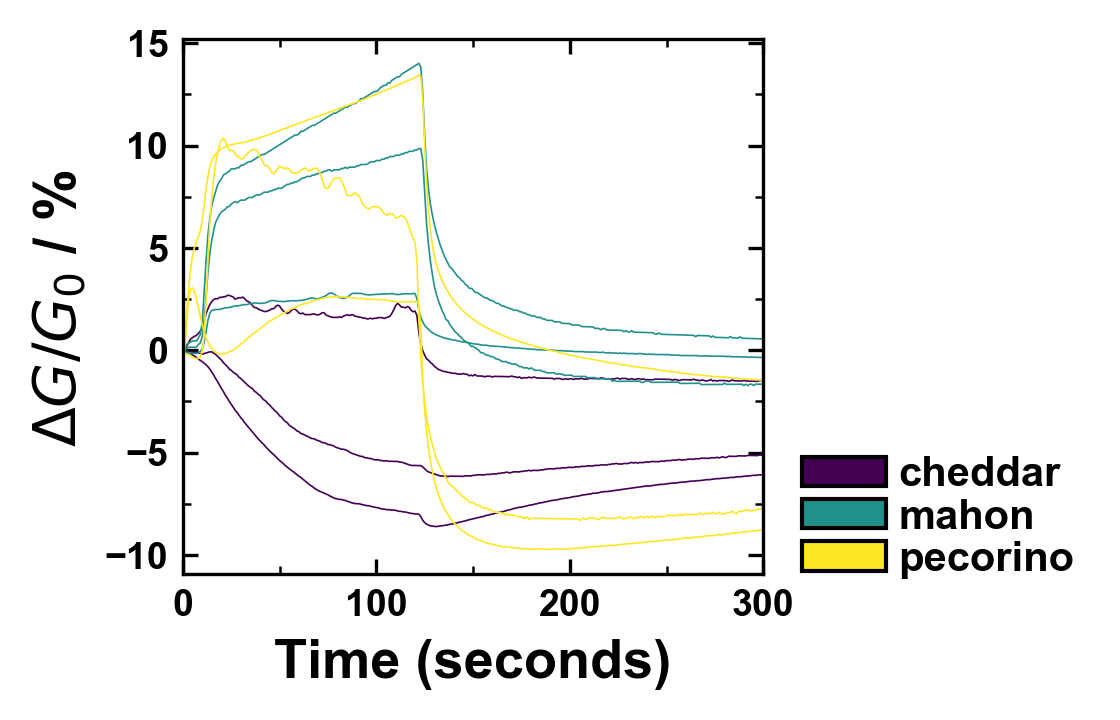

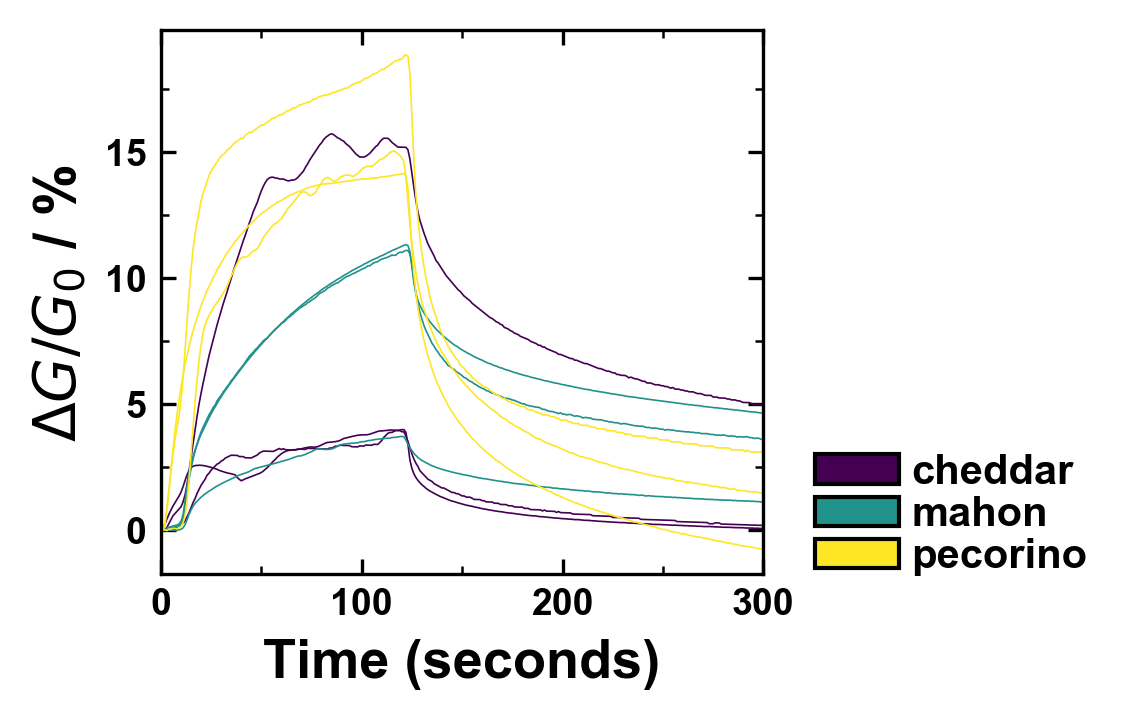

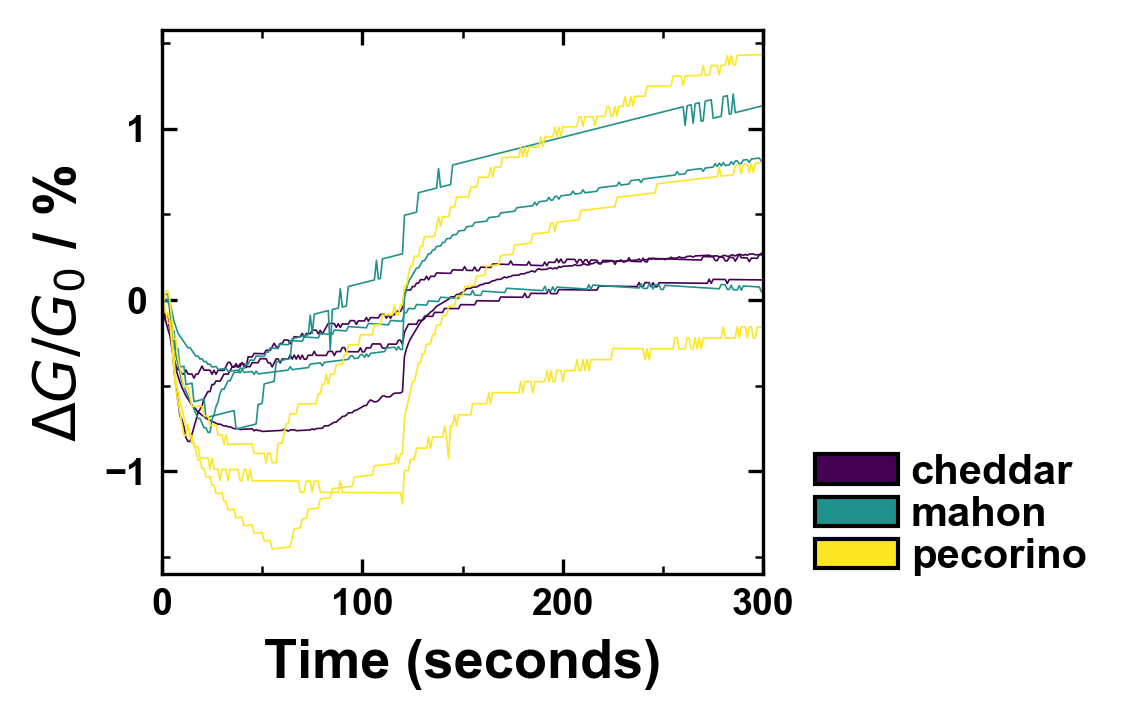

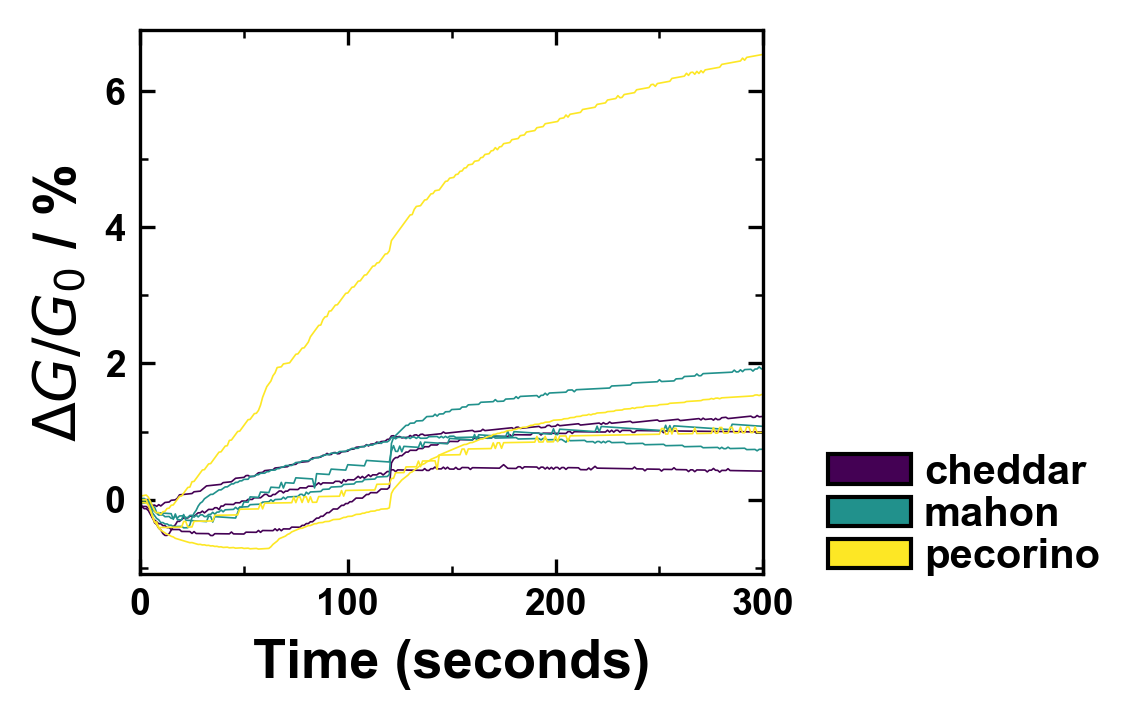

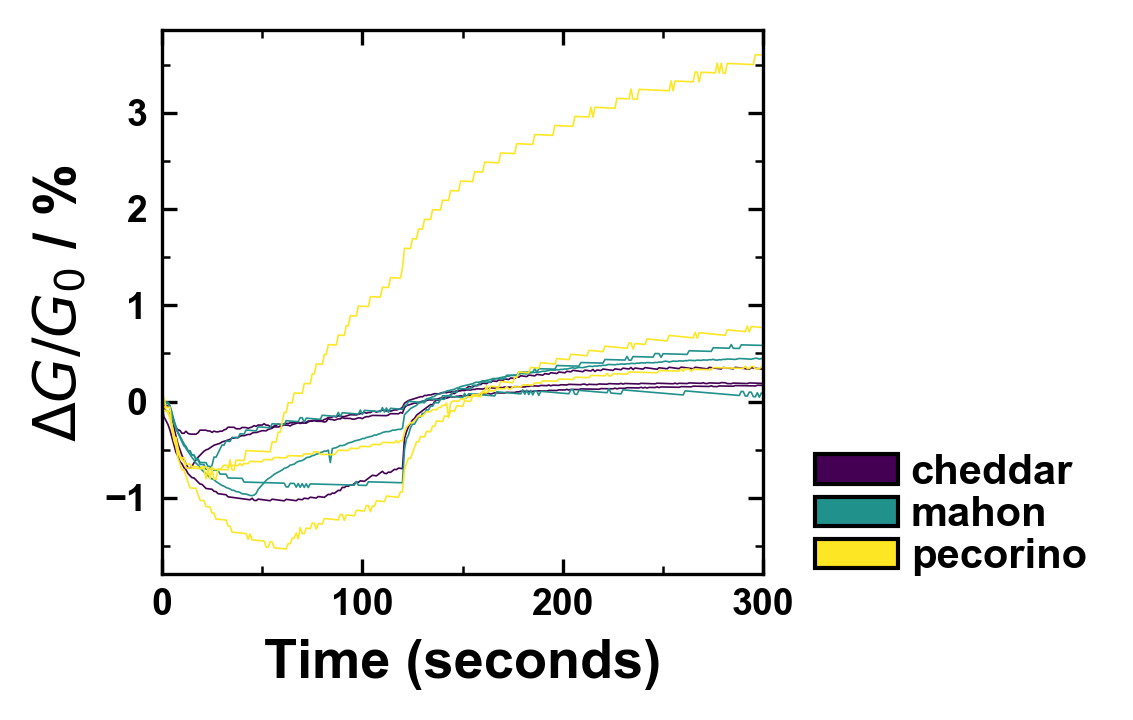

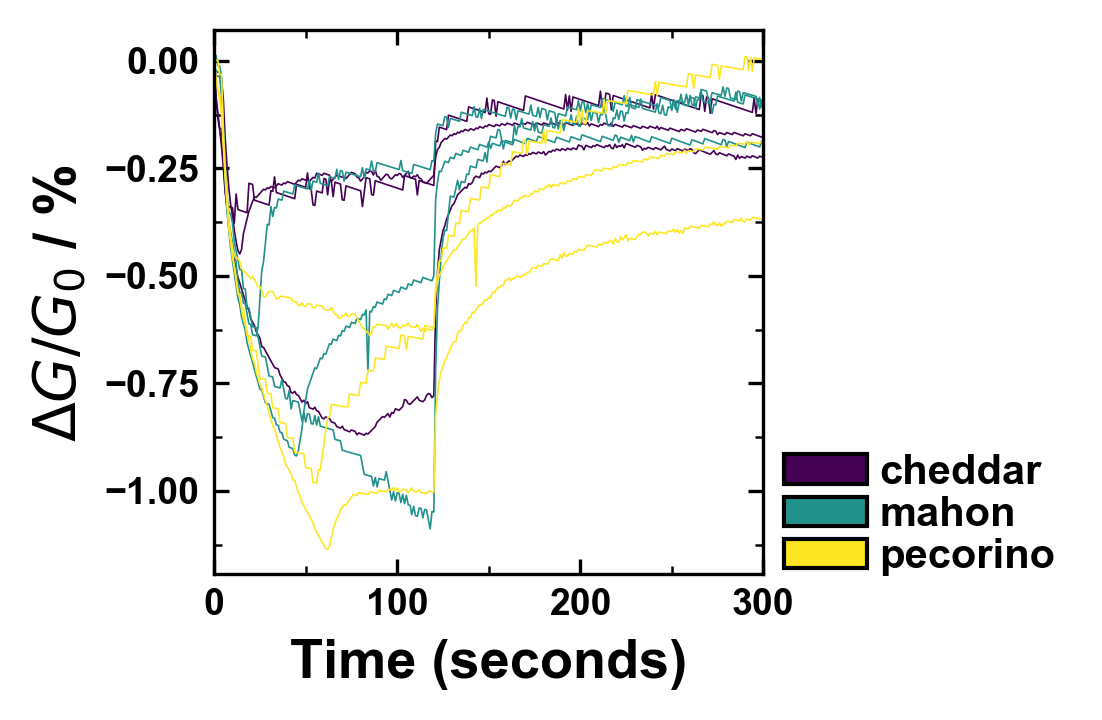

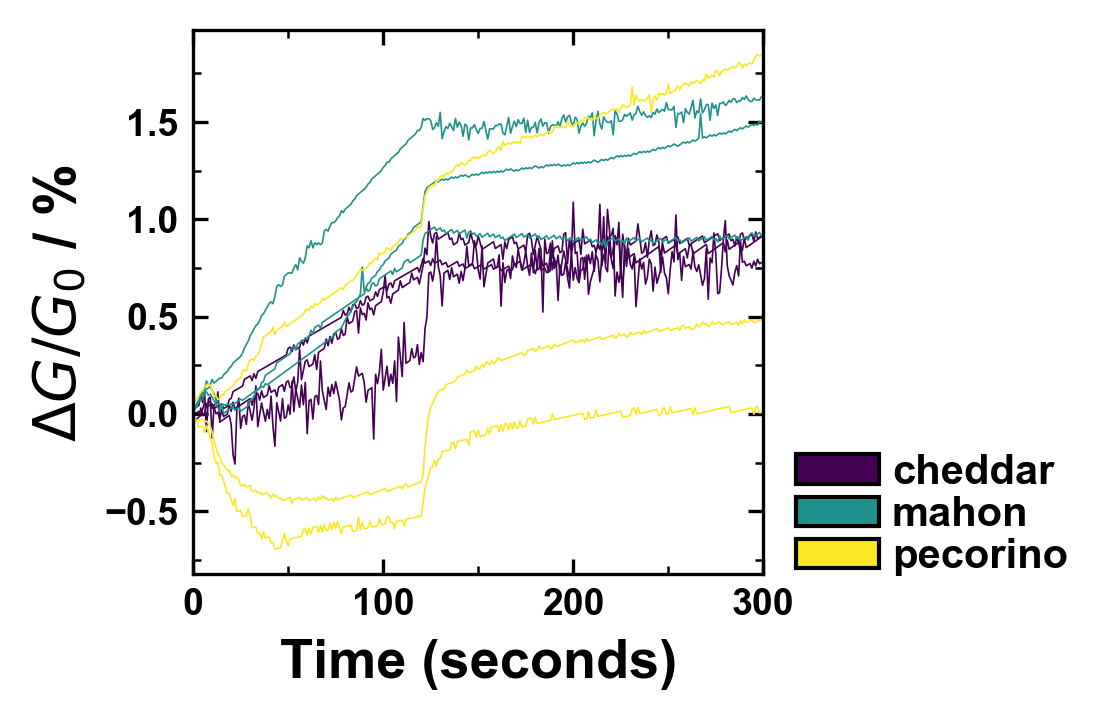

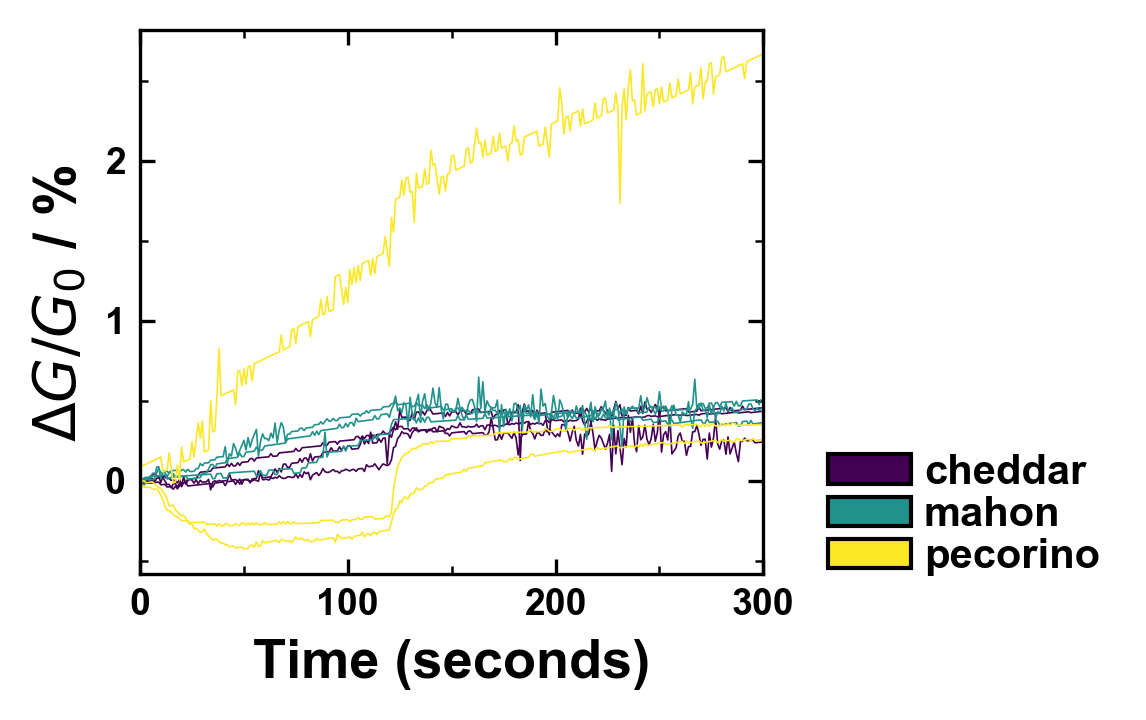

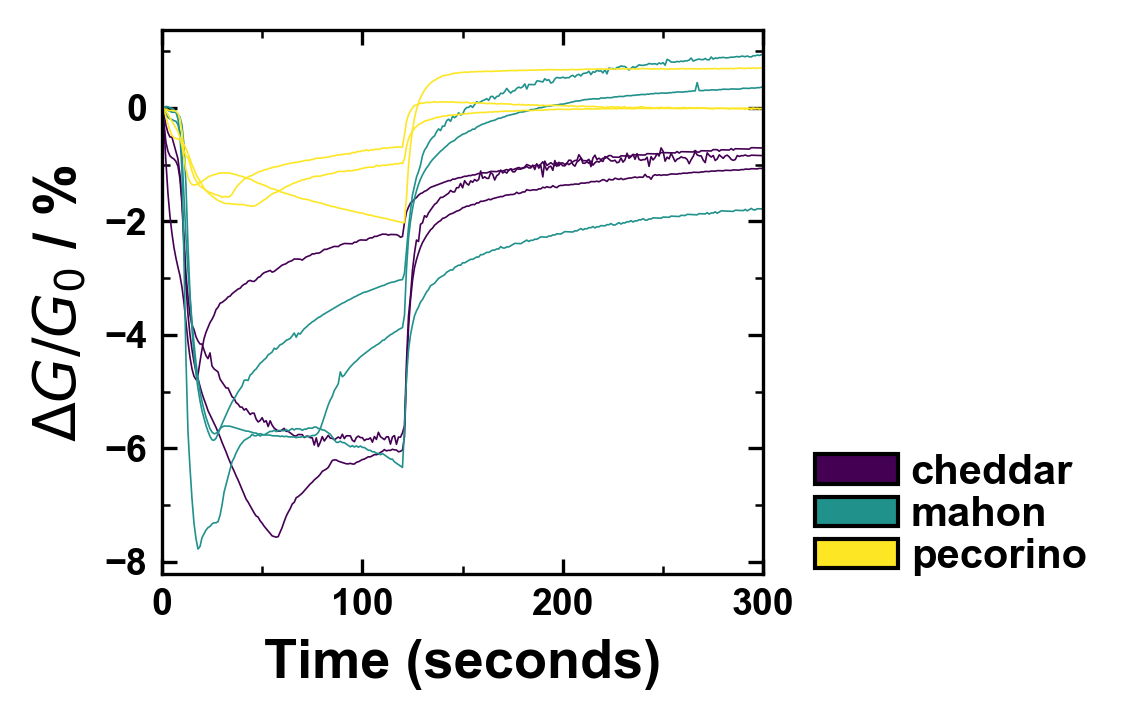

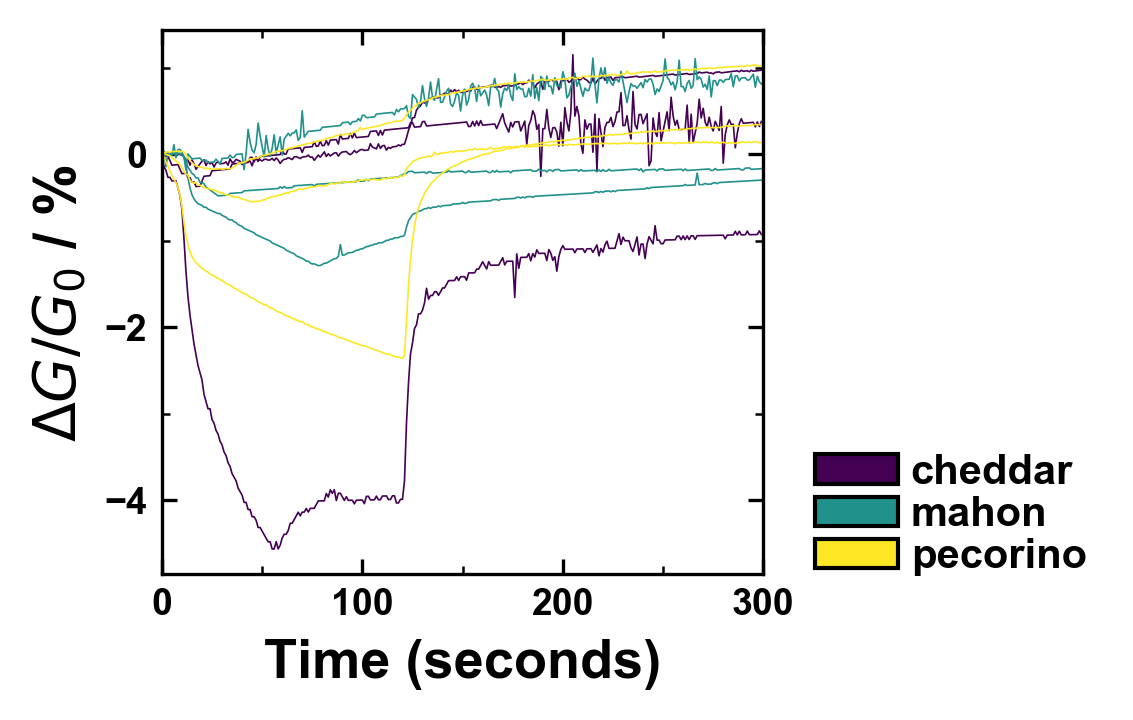

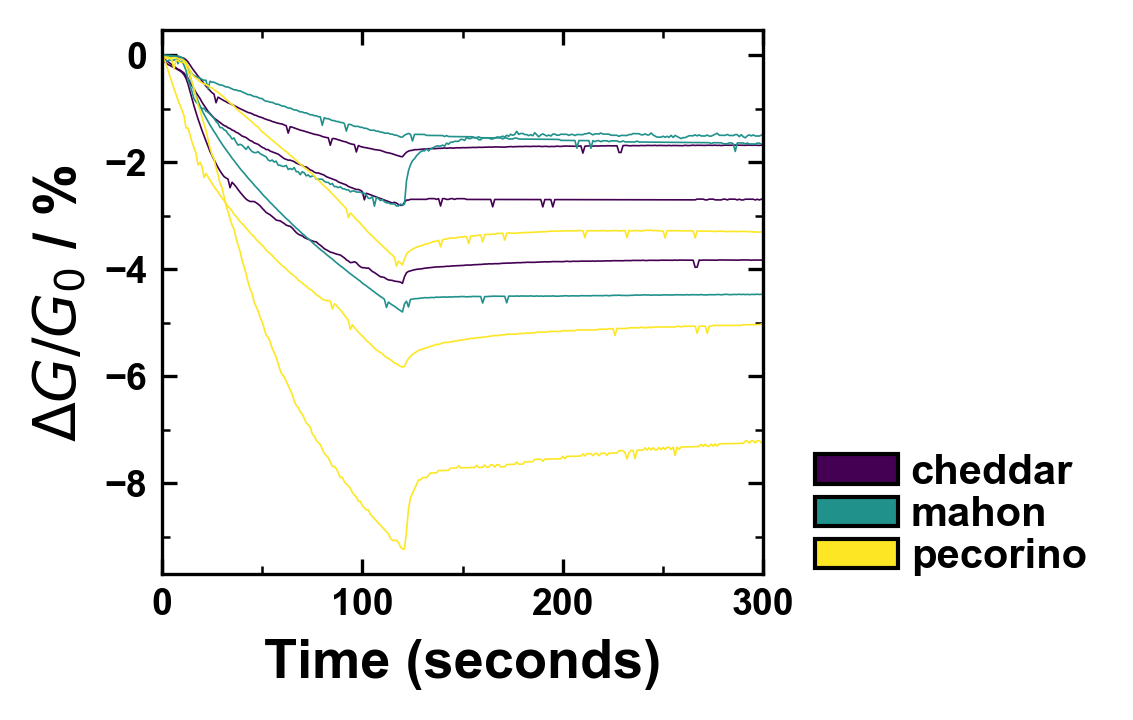

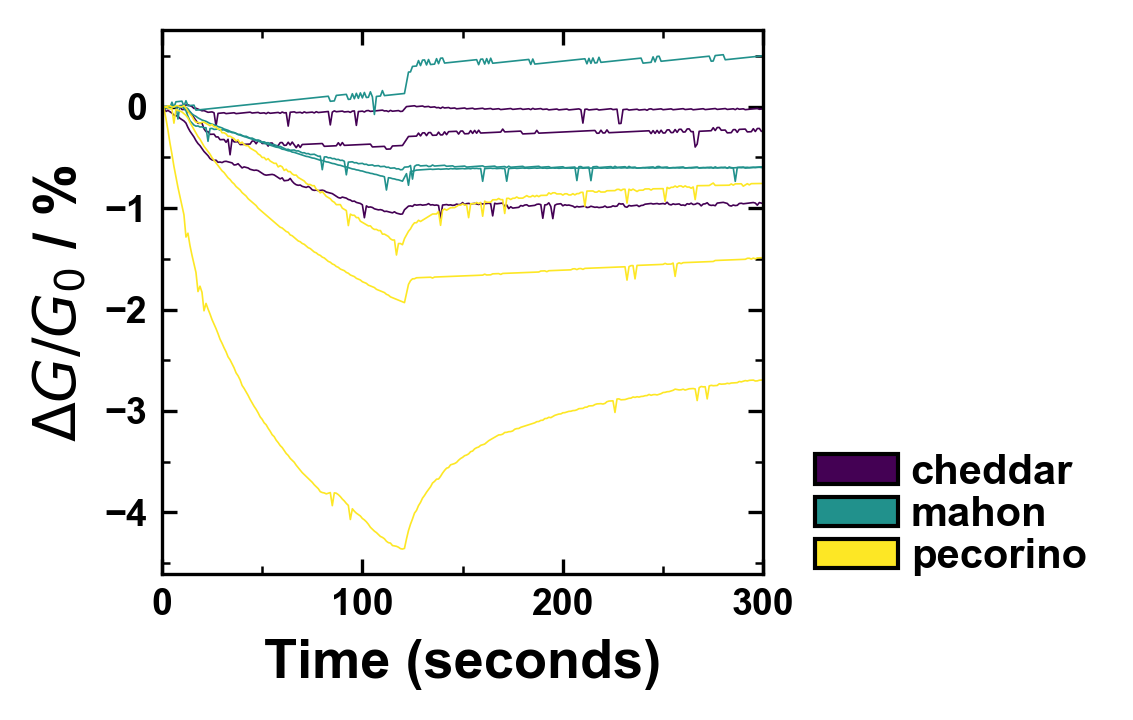

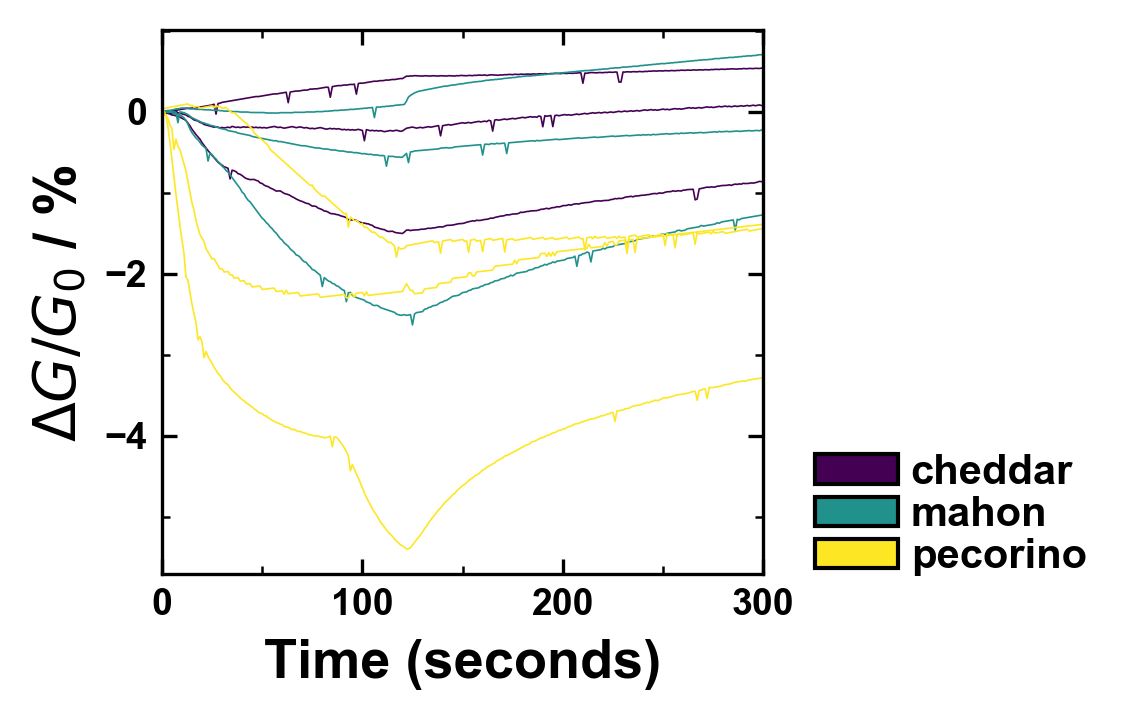

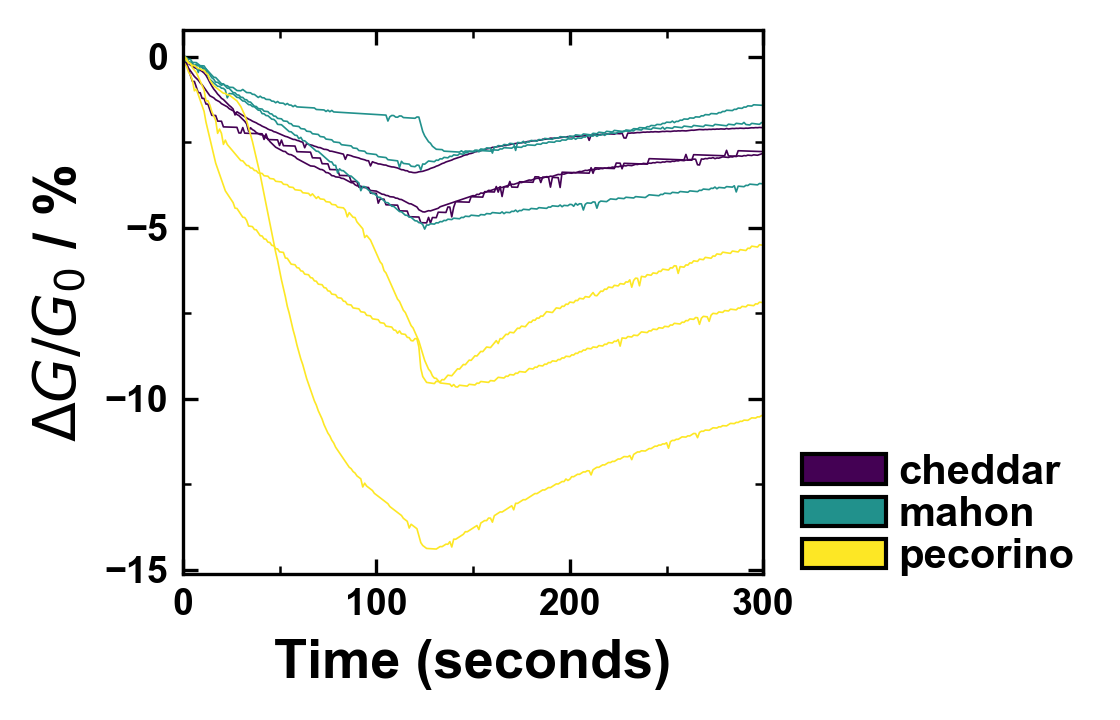

In [150]:
# plot all of the data to get a feel for it. 
start = 300
end = 600
normalize = False
random_pick = True
line_plot = True
if random_pick:
    number_copies = 3
else:
    number_copies = 12

if cheese:
    cmap = plt.cm.get_cmap('viridis')
    color_fractions = np.array([[0.25,0.5,0.75]])
if liquor:
    cmap = plt.cm.get_cmap('cool')
    color_fractions = np.array([[0,0.5,1.0]])
if oil:
    cmap = plt.cm.get_cmap('plasma')
    color_fractions = np.array([[0,.5,1.0]])
color_fractions = np.repeat(color_fractions, number_copies, axis=1).flatten()
colors = [cmap(c) for c in color_fractions]


for i in range(1,21):
    fig = plt.figure(figsize=(5,2.5),dpi=300)
    selector = []
    for w in sorted(data.keys()):
        if random_pick:
            temp_data = data[w]['S'+str(i)]
            temp_data = temp_data.sample(1,axis=1)
            selector.append(temp_data)
        else:
            selector.append(data[w]['S'+str(i)])
    selector = pd.concat(selector, axis=1)
    selector = selector.values.T
    selector = selector[:, start:end]
    if normalize:
        selector = normalize_selector(selector)    
    for j,c in enumerate(colors):
        y = selector[j,:]
        x = list(range(selector.shape[1]))
        if line_plot:
            plt.plot(x,y, color=c, linewidth=0.4)
        else:
            plt.scatter(x,y,c=c, s=0.1, alpha=1, cmap=cmap, linewidth=0.2, edgecolor='k')
#         plt.title('selector_{}'.format(i))

    ax = plt.gca()
    ax.minorticks_on()
    # ax.set_ylim([-40,50])
    # setting line width for all borders
    line_width = 0.8
    [i.set_linewidth(line_width) for i in ax.spines.values()]
    # all the tick voodoo - location andsize
    ax.tick_params(top=True, right=True)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    # ax.tick_params(which='both', axis="y",direction="in")
    # ax.tick_params(which='both', axis="x",direction="in")
    ax.xaxis.set_tick_params(width=line_width)
    ax.yaxis.set_tick_params(width=line_width)
    # setting tick label size / style
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties('Arial')
        label.set_fontsize(9) 
        label.set_fontweight('bold')
    # get the font and style of the axis labels
    lfont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
    xfont = {'fontname':'Arial', 'fontsize':13, 'weight':'bold'}
    ax.set_ylabel(r'$\Delta$G/G$_0$ / % ', **lfont)
    ax.set_xlabel('Time (seconds)',**xfont)
    ax.set_xlim([0,300])

    # making the legend and setting all its properties
    hands = []
    ### change the values in the next list to match order!
    if cheese:
        sample_labels = ['cheddar', 'mahon', 'pecorino']
        sample_colors = [0.25,0.5,0.75]
    if liquor:
        sample_labels = ['rum', 'vodka', 'whiskey'] 
        sample_colors = [0.25, 0.75,1.0]
    if oil:
        sample_labels = ['canola', 'olive', 'walnut']
        sample_colors = [0.0, 0.5,1.0]
    
    for ii,label in zip(sample_colors,sample_labels):
        rgba = cmap(ii)
        p1 = mpatches.Patch(edgecolor='k', facecolor=rgba, label=label, alpha=1)
        hands.append(p1)
    legend_prop = {'family':'Arial', 'size':10, 'weight':'bold'}
    plt.legend(handles=hands, bbox_to_anchor=(1.6, 0.29), frameon=False, prop=legend_prop, handletextpad=0.3, labelspacing=0.1)
    plt.tight_layout()
    if not random_pick:
        plt.savefig('./line_3cheese_all_data_sel_{}_tc.png'.format(i))
    if random_pick:
        plt.savefig('./line_3cheese_random_3_sel_{}_tc.png'.format(i))
#     plt.gcf().clear()
    plt.show()
    
    
    

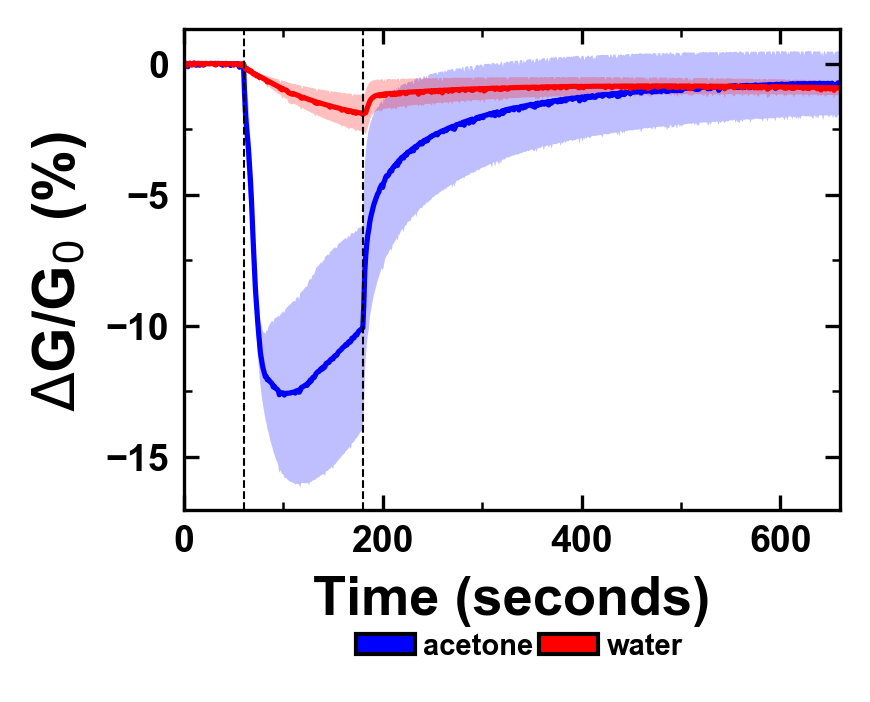

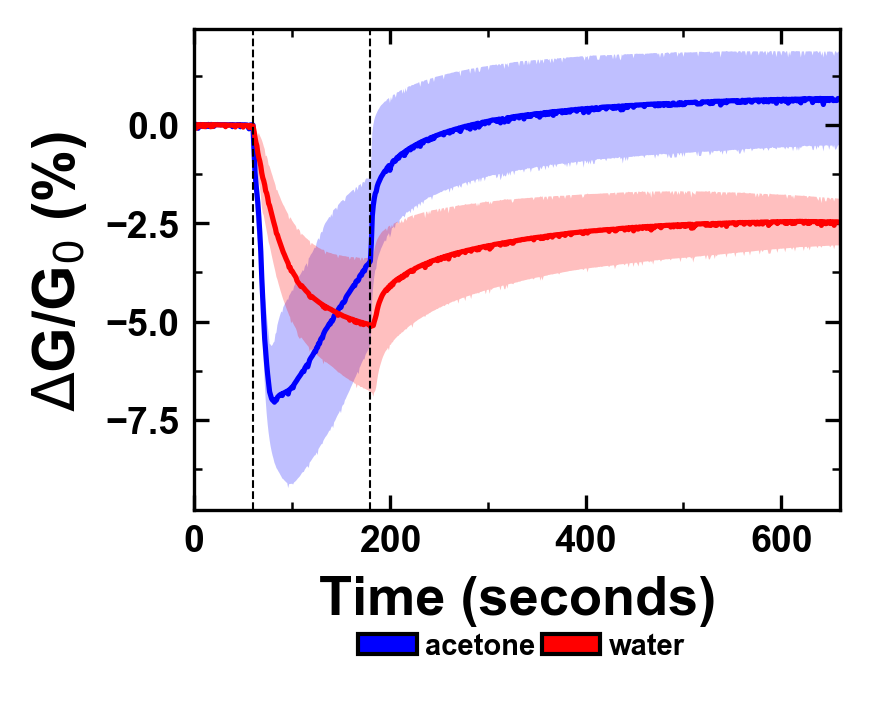

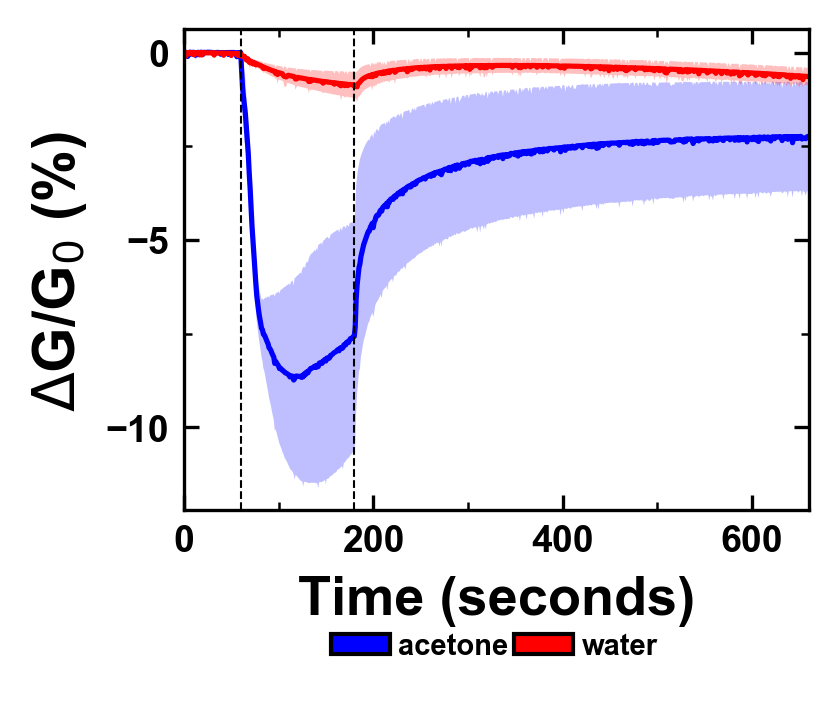

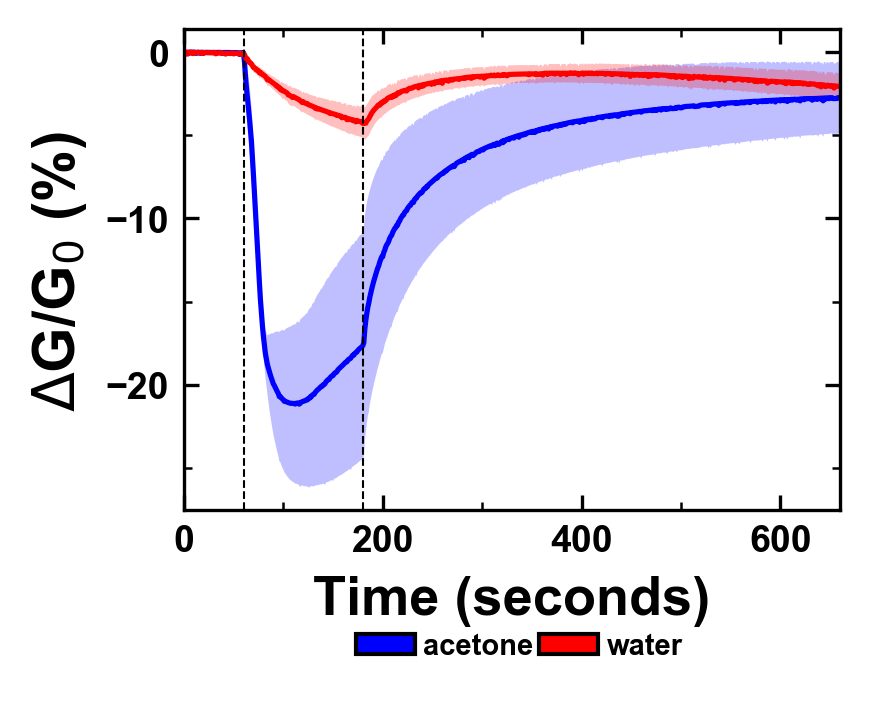

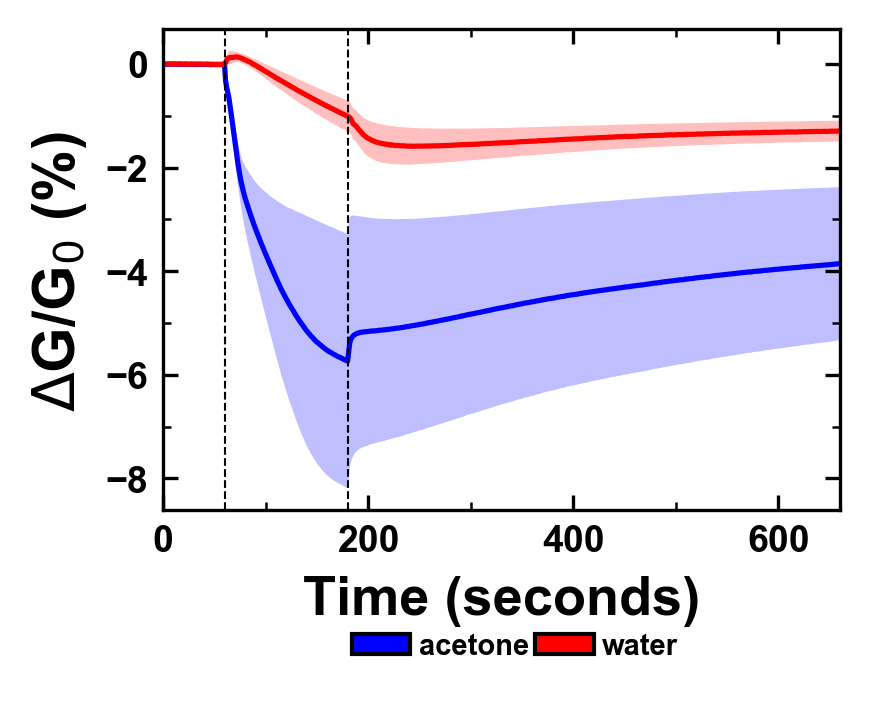

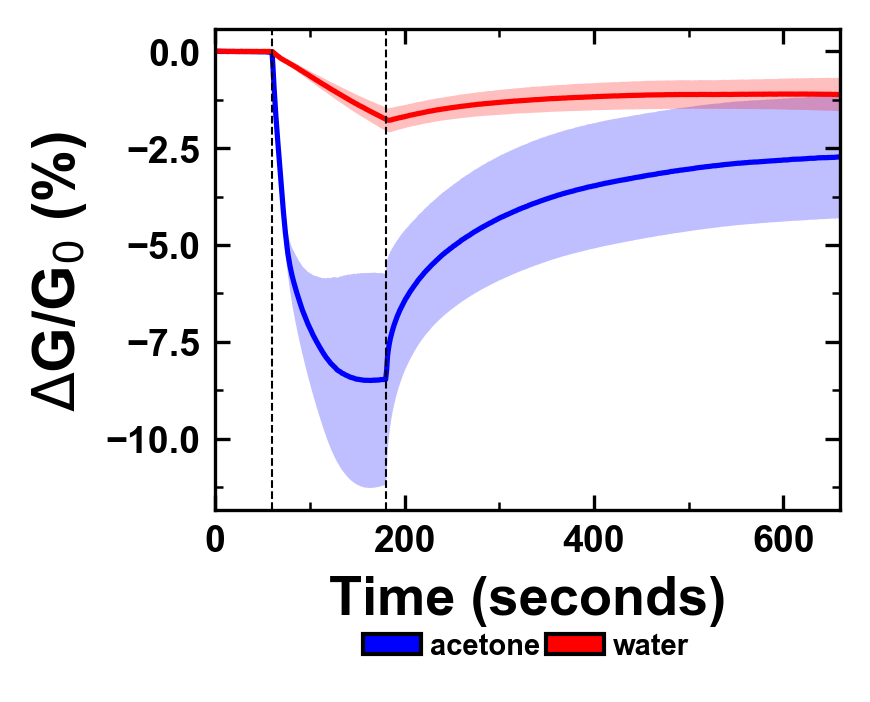

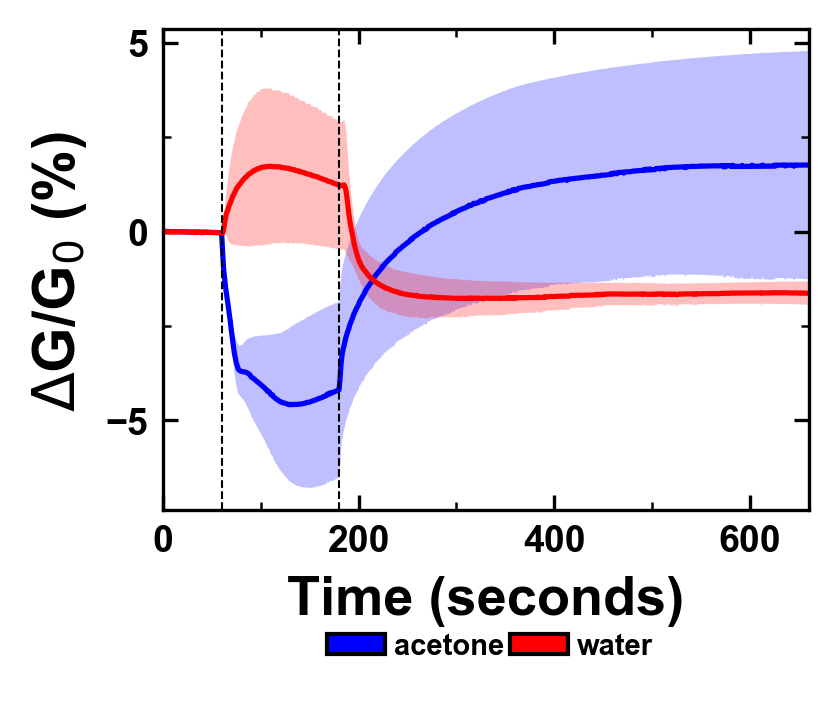

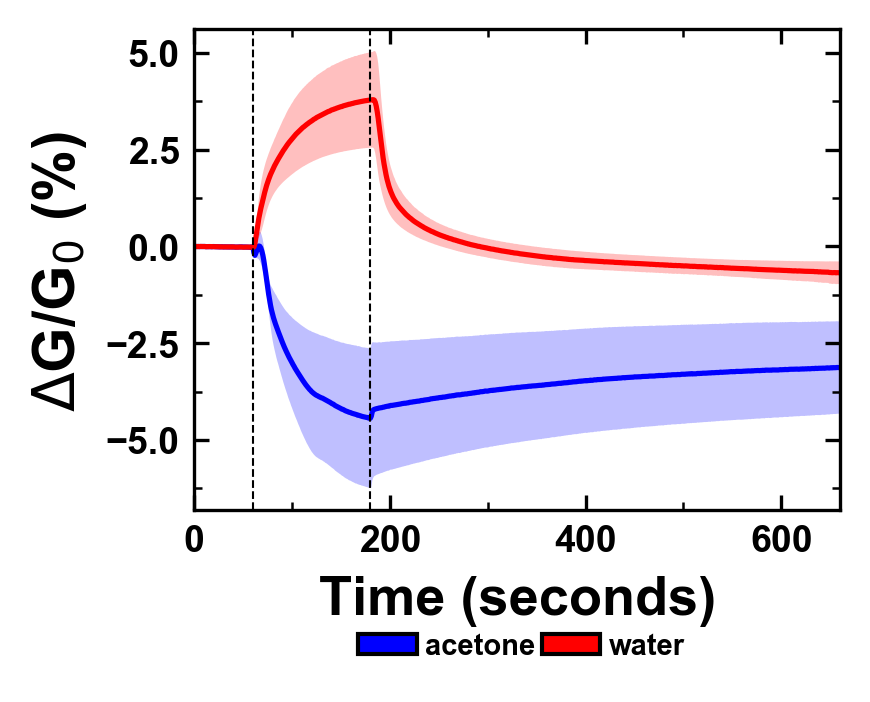

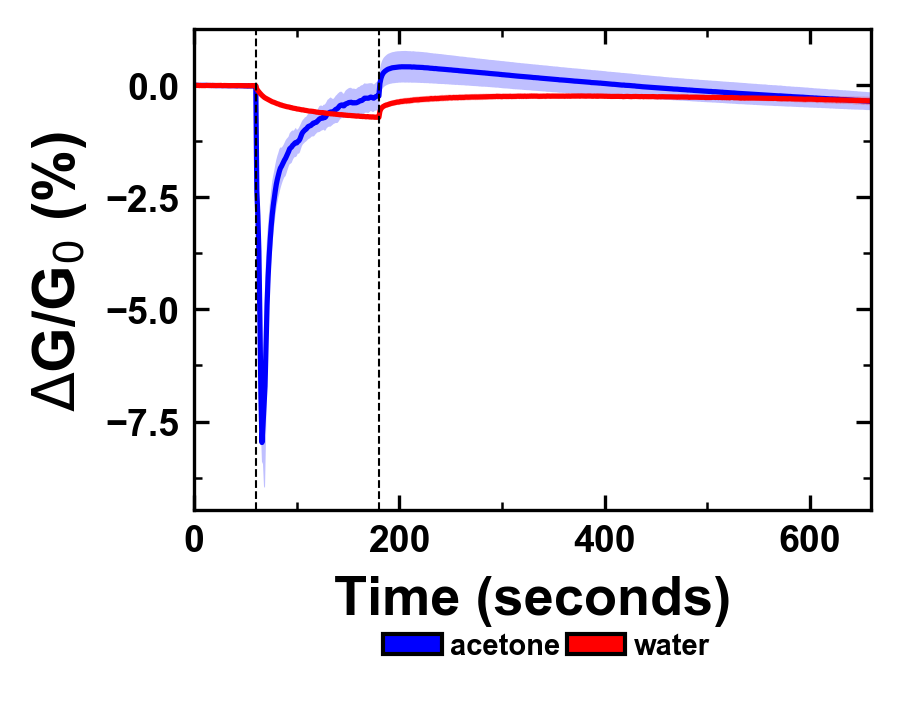

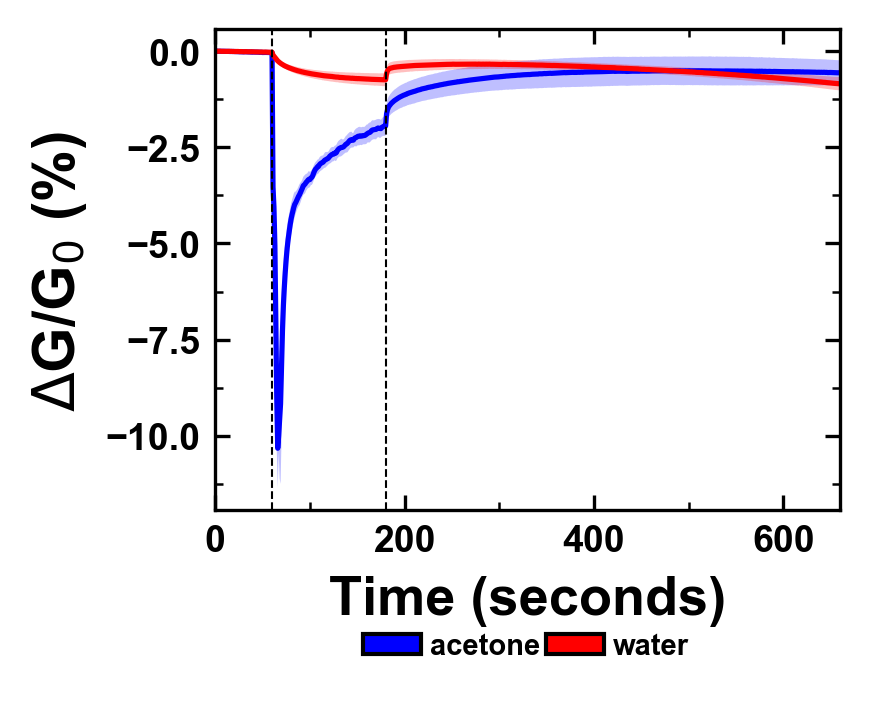

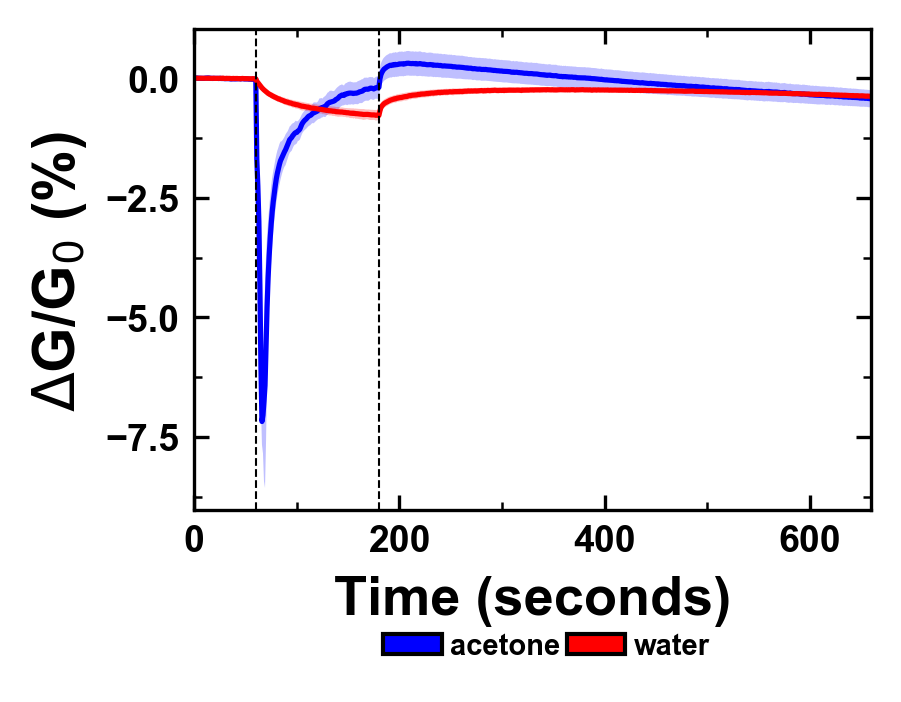

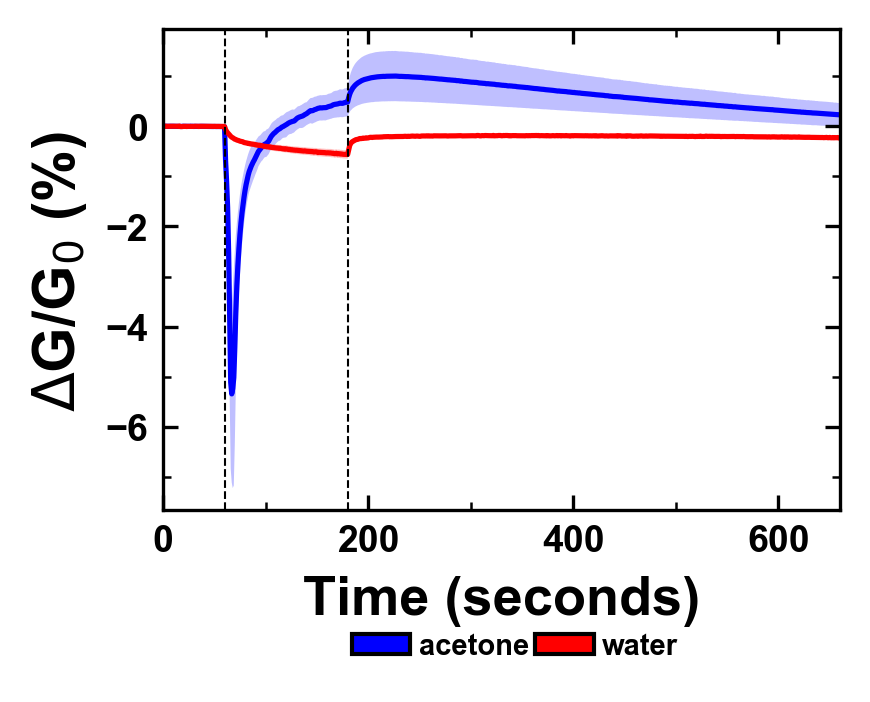

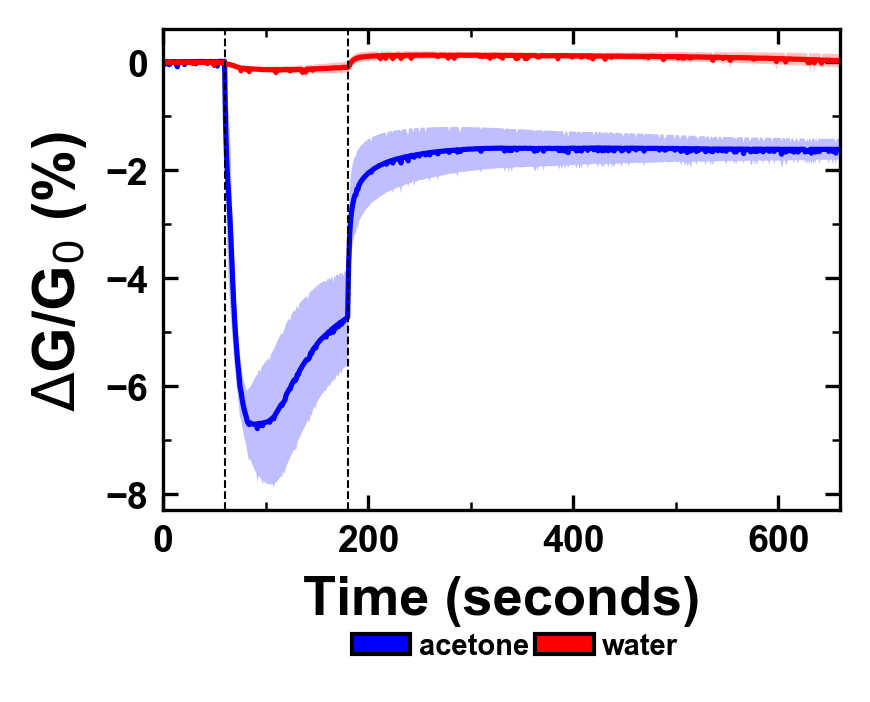

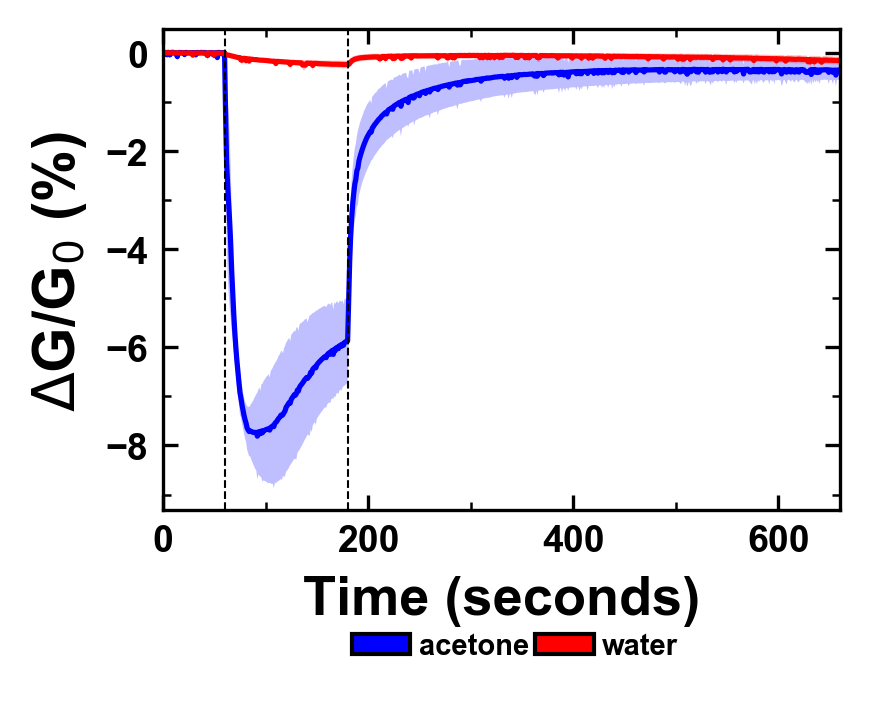

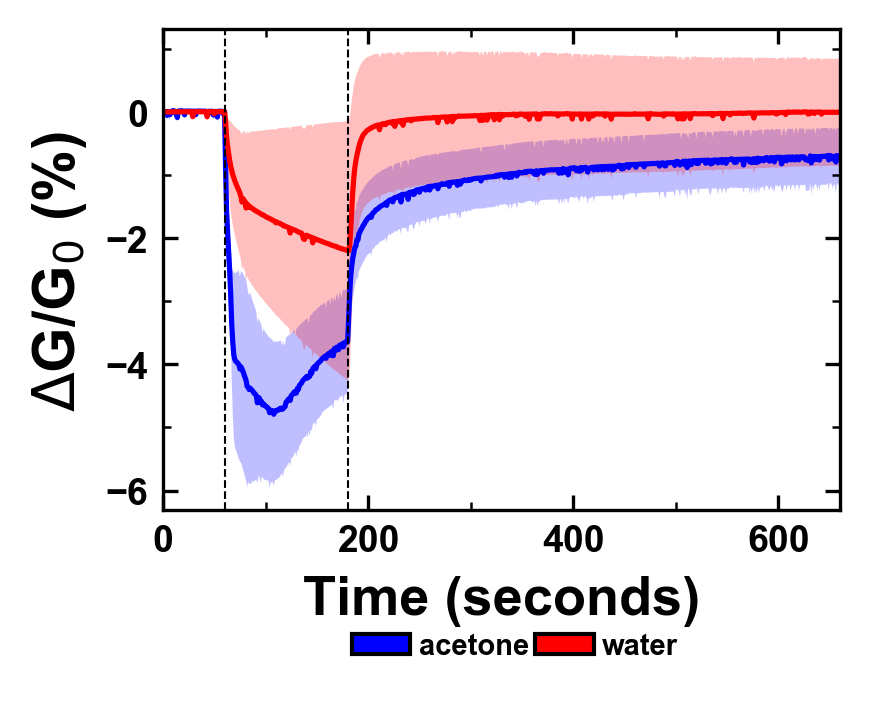

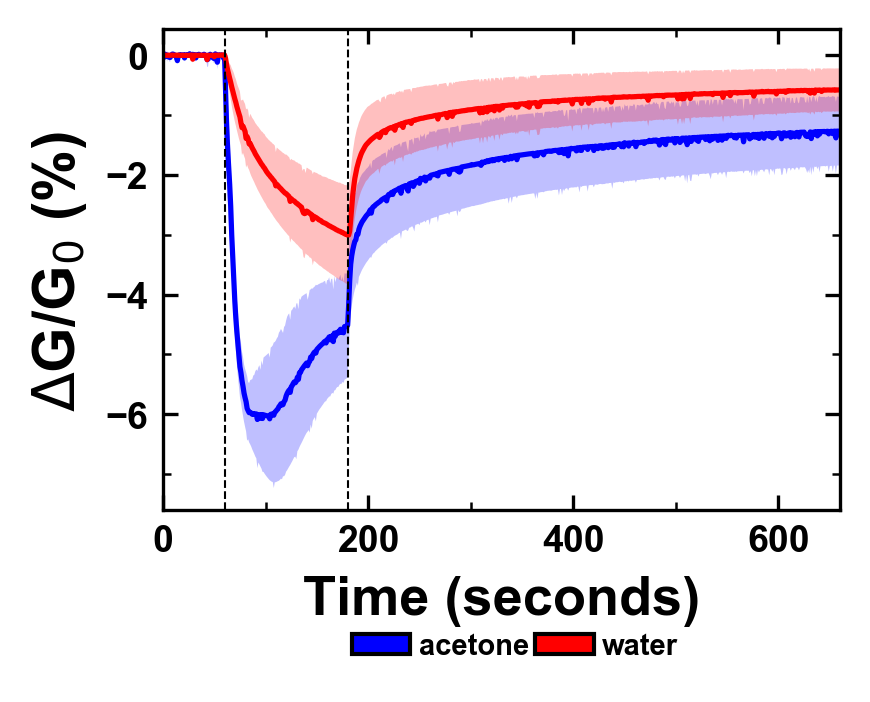

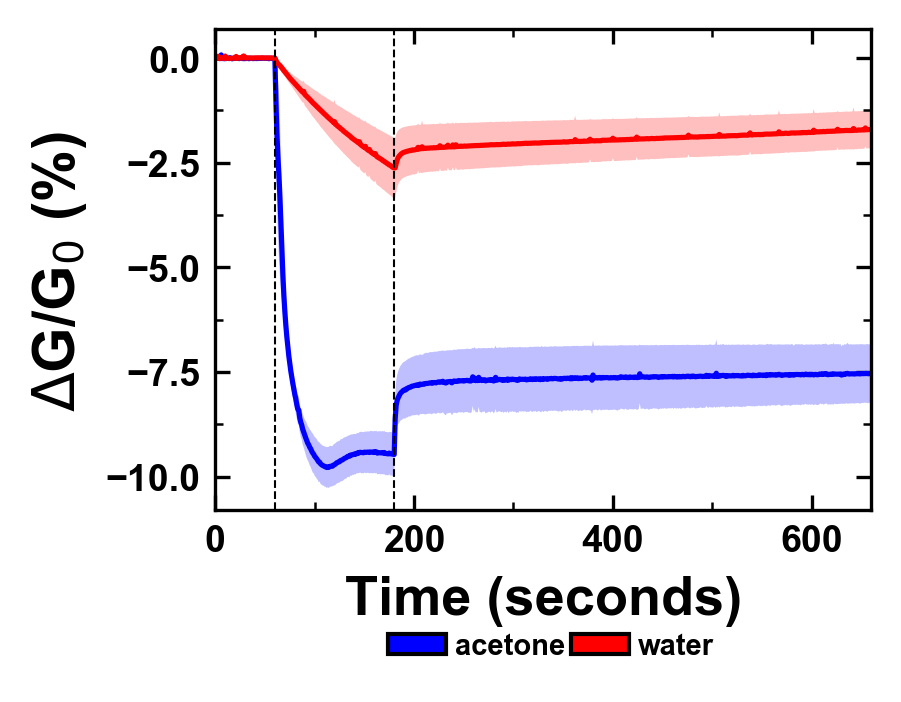

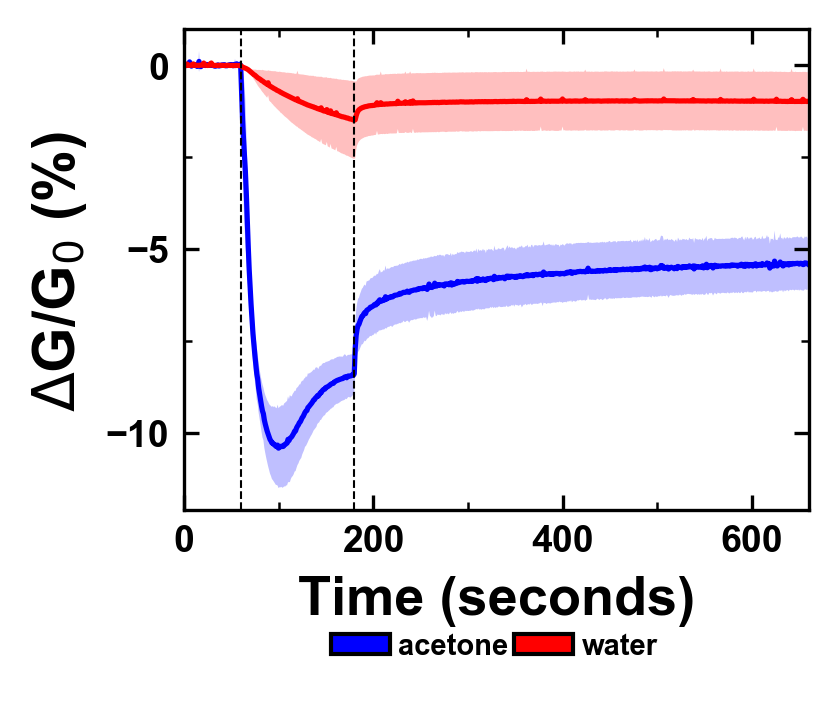

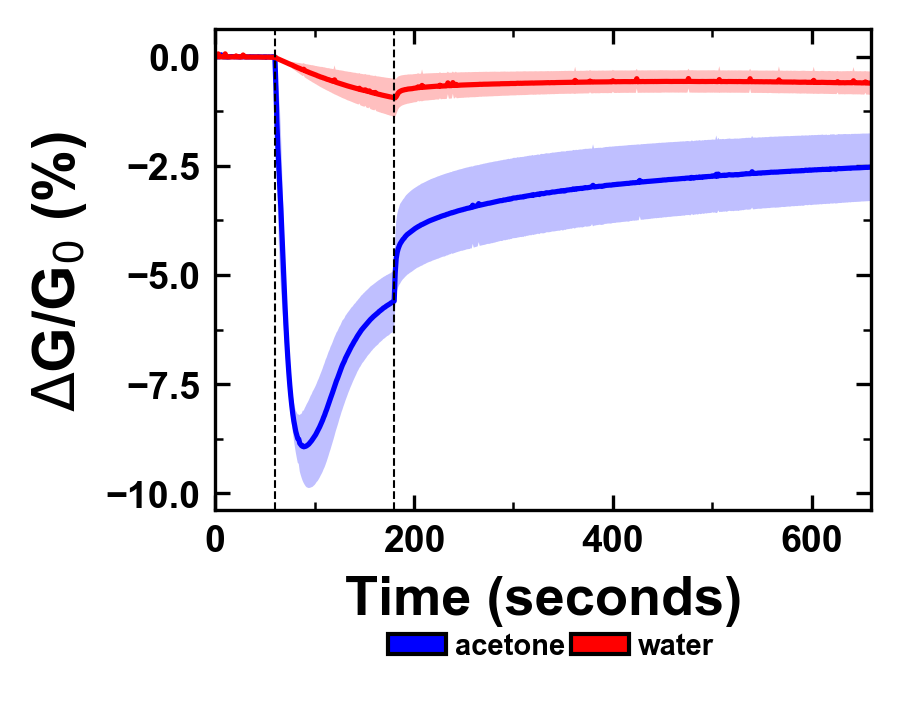

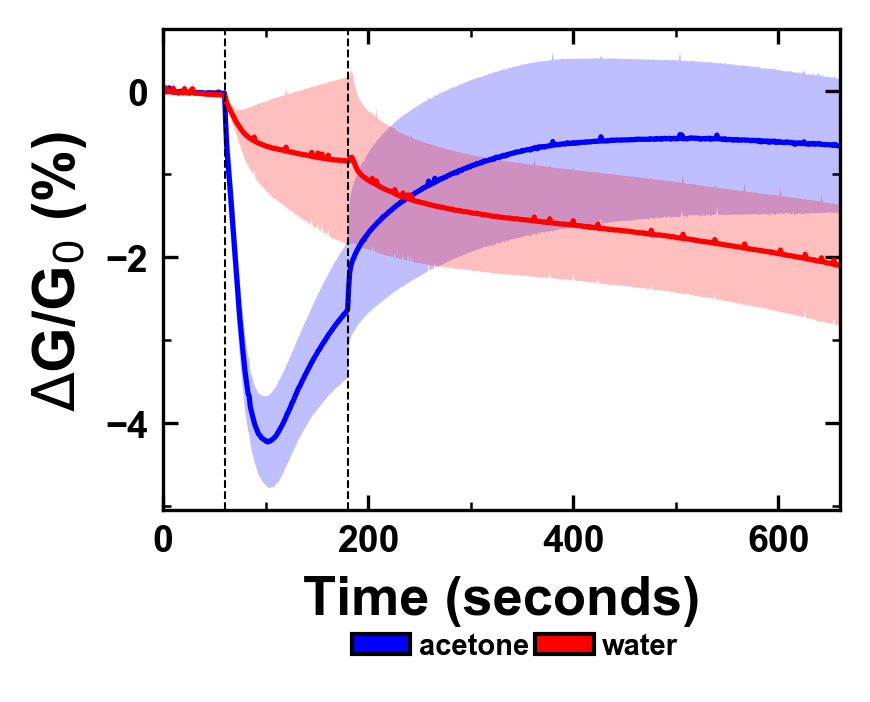

In [56]:
# plotting the selector average for the sample with the standard deviation
start = 240
end = 900
normalize = False
if voc:
    num_class = 2
else:
    num_class = 3

if cheese:
    cmap = plt.cm.get_cmap('viridis')
    color_fractions = np.array([[0.25,0.5,0.75]])
if liquor:
    cmap = plt.cm.get_cmap('cool')
    color_fractions = np.array([[0.25, 0.75,1.0]])
if oil:
    cmap = plt.cm.get_cmap('plasma')
    color_fractions = np.array([[0,.5,1.0]])
if voc:
    cmap = plt.cm.get_cmap('bwr')
    color_fractions = np.array([[0.0,1.0]])
color_fractions = np.repeat(color_fractions, 1, axis=1).flatten()
colors = [cmap(c) for c in color_fractions]

for i in range(1,21):
    fig = plt.figure(figsize=(3,2.5),dpi=300)
    selector = []
    for w in sorted(data.keys()):
        selector.append(data[w]['S'+str(i)])
    selector = pd.concat(selector, axis=1)
    selector = selector.values.T
    selector = selector[:, start:end]
    selector_split = np.split(selector, num_class, axis=0)        
    means = []
    std = []
    for s in selector_split:
        means.append(s.mean(axis=0))
        std.append(s.std(axis=0)) 
    selector = np.vstack(means)
    selector_std = np.vstack(std)
    if normalize:
        selector = normalize_selector(selector)    
    for j,c in enumerate(colors):
        y = selector[j,:]
        yerr = selector_std[j,:]
        x = list(range(selector.shape[1]))
#         plt.scatter(x,y,c=c, s=0.1, alpha=1, cmap=cmap, linewidth=0.2, edgecolor='k')
        plt.plot(x,y, color=c, linewidth=1.25)
#         plt.errorbar(x, _, )
        plt.fill_between(x, y-yerr, y+yerr,facecolor=c ,alpha=0.25)
    ax = plt.gca()
    ax.minorticks_on()
    # ax.set_ylim([-40,50])
    # setting line width for all borders
    line_width = 0.8
    [i.set_linewidth(line_width) for i in ax.spines.values()]
    # all the tick voodoo - location andsize
    ax.tick_params(top=True, right=True)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    # ax.tick_params(which='both', axis="y",direction="in")
    # ax.tick_params(which='both', axis="x",direction="in")
    ax.xaxis.set_tick_params(width=line_width)
    ax.yaxis.set_tick_params(width=line_width)
    # setting tick label size / style
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties('Arial')
        label.set_fontsize(9) 
        label.set_fontweight('bold')
    # get the font and style of the axis labels
    lfont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
    xfont = {'fontname':'Arial', 'fontsize':13, 'weight':'bold'}
    ax.set_ylabel(r'$\Delta$G/G$_0$ (%) ', **lfont)
    ax.set_xlabel('Time (seconds)',**xfont)
    ax.set_xlim([0,660])
    plt.axvline(x=60, color='k', linewidth=0.5, linestyle='--')
    plt.axvline(x=60+120, color='k', linewidth=0.5, linestyle='--')

    # making the legend and setting all its properties
    hands = []
    ### change the values in the next list to match order!
    if cheese:
        sample_labels = ['cheddar', 'mahon', 'pecorino']
        sample_colors = [0.25,0.5,0.75]
    if liquor:
        sample_labels = ['rum', 'vodka', 'whiskey'] 
        sample_colors = [0.25, 0.75,1.0]
    if oil:
        sample_labels = ['canola', 'olive', 'walnut']
        sample_colors = [0.0, 0.5,1.0]
    if voc:
        sample_labels = ['acetone', 'water']
        sample_colors = [0.0,1.0]
    for ii,label in zip(sample_colors,sample_labels): 
        rgba = cmap(ii)
        p1 = mpatches.Patch(edgecolor='k', facecolor=rgba, label=label, alpha=1)
        hands.append(p1)
    legend_prop = {'family':'Arial', 'size':7, 'weight':'bold'}
    plt.legend(handles=hands, bbox_to_anchor=(0.8, -0.2), frameon=False, prop=legend_prop, handletextpad=0.3, labelspacing=0.1, ncol=3)
    plt.tight_layout()
    if cheese:
        plt.savefig('./3cheese_avg_all_data_sel_{}_tc.png'.format(i))
    if liquor:
        plt.savefig('./3liquor_avg_all_data_sel_{}_tc.png'.format(i))
    if oil:
        plt.savefig('./3oil_avg_all_data_sel_{}_tc.png'.format(i))
    if voc:
        plt.savefig('./2voc_avg_all_data_sel_{}_tc.png'.format(i))
#     plt.gcf().clear()
    plt.show()
    
    
    

The following cell is for just plotting the heatmaps of distances with an all-to-all comparision of the individual selectors

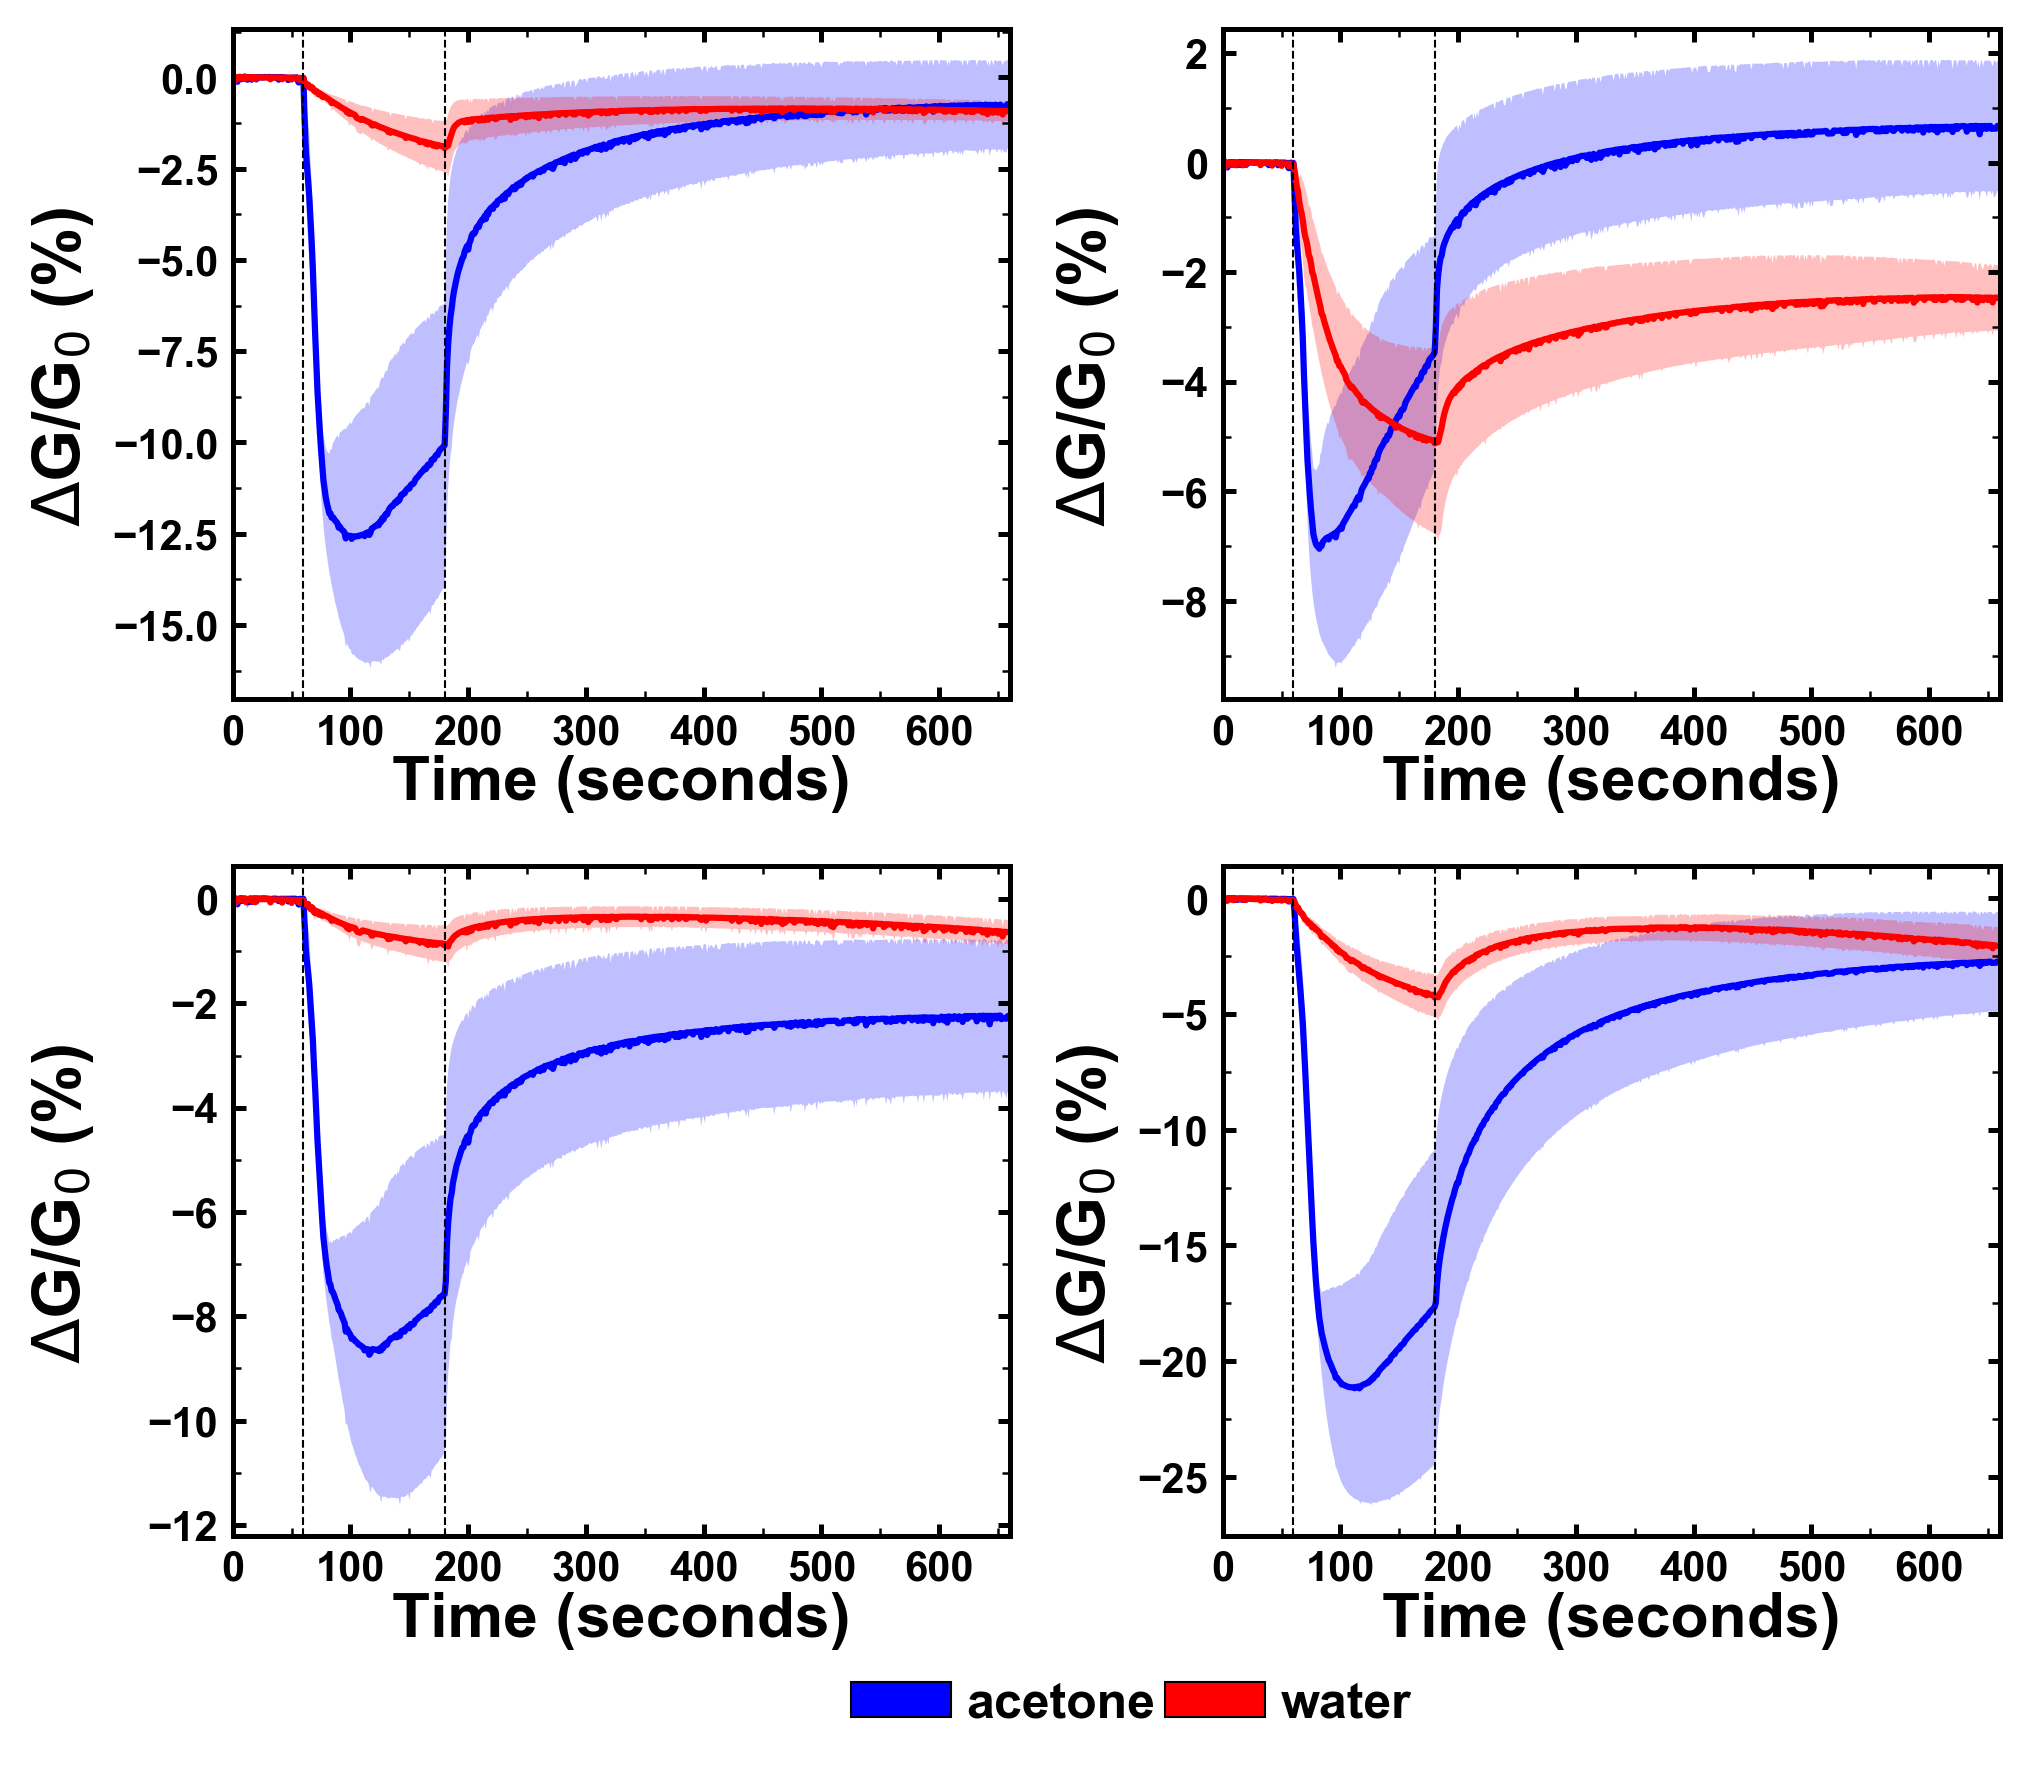

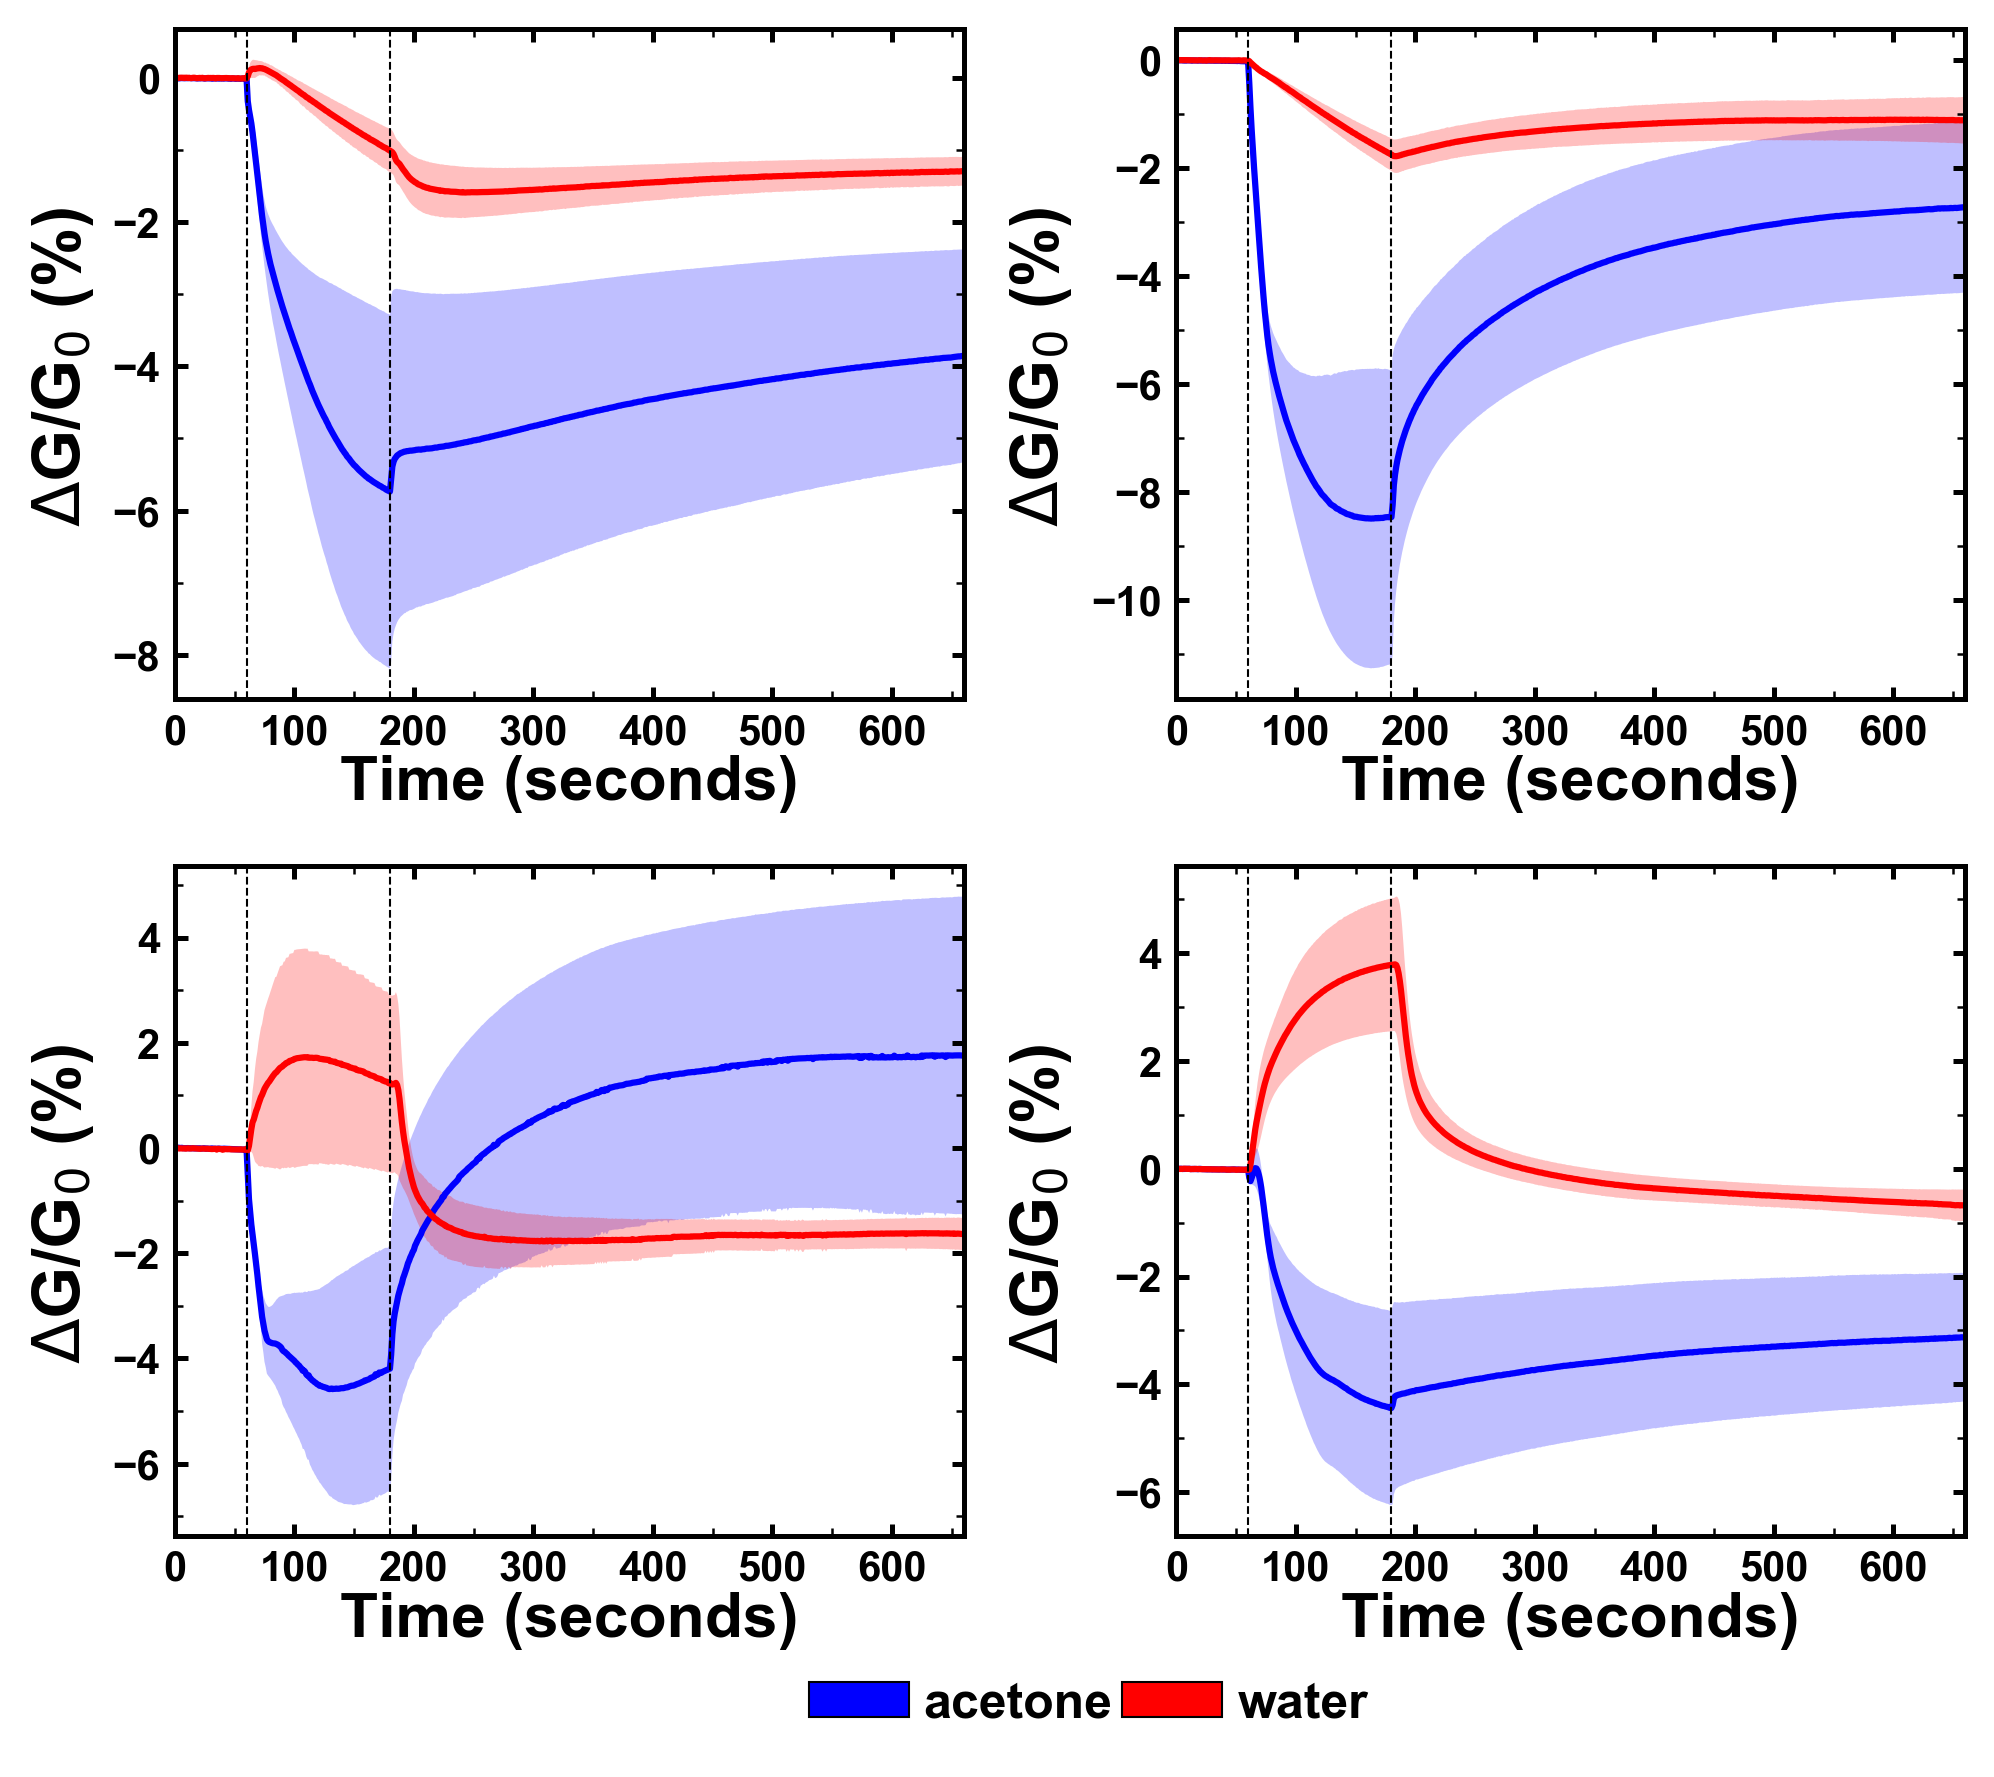

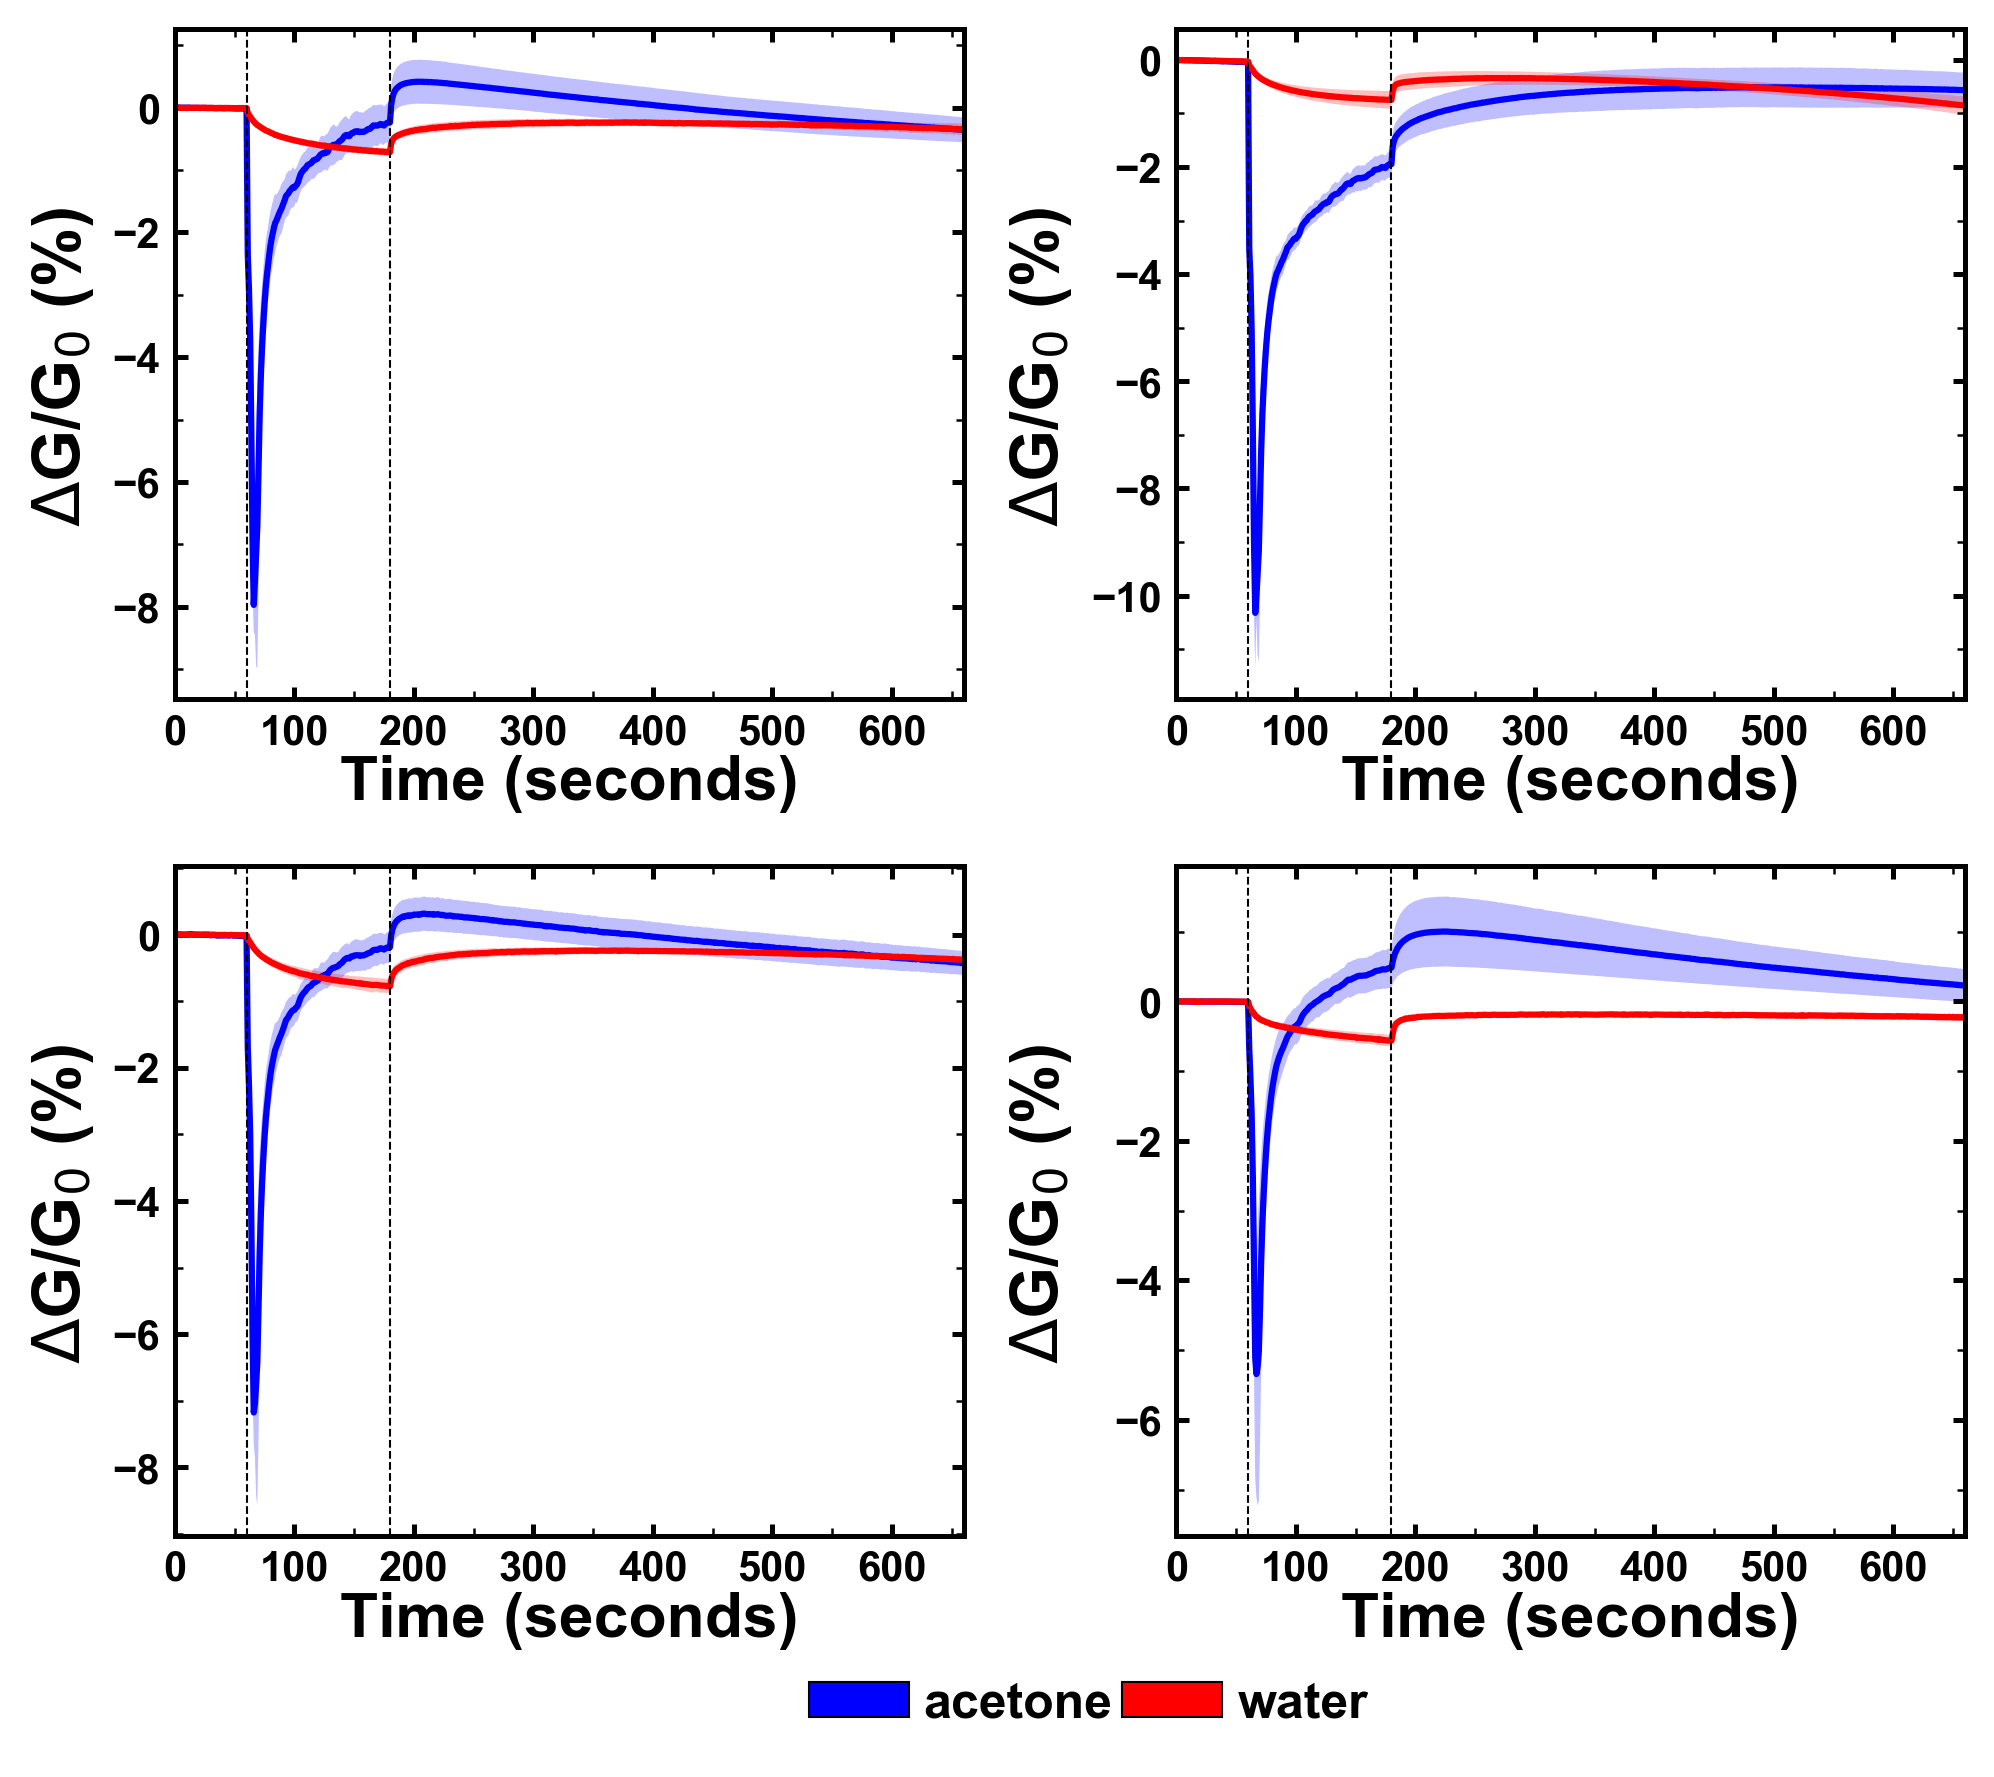

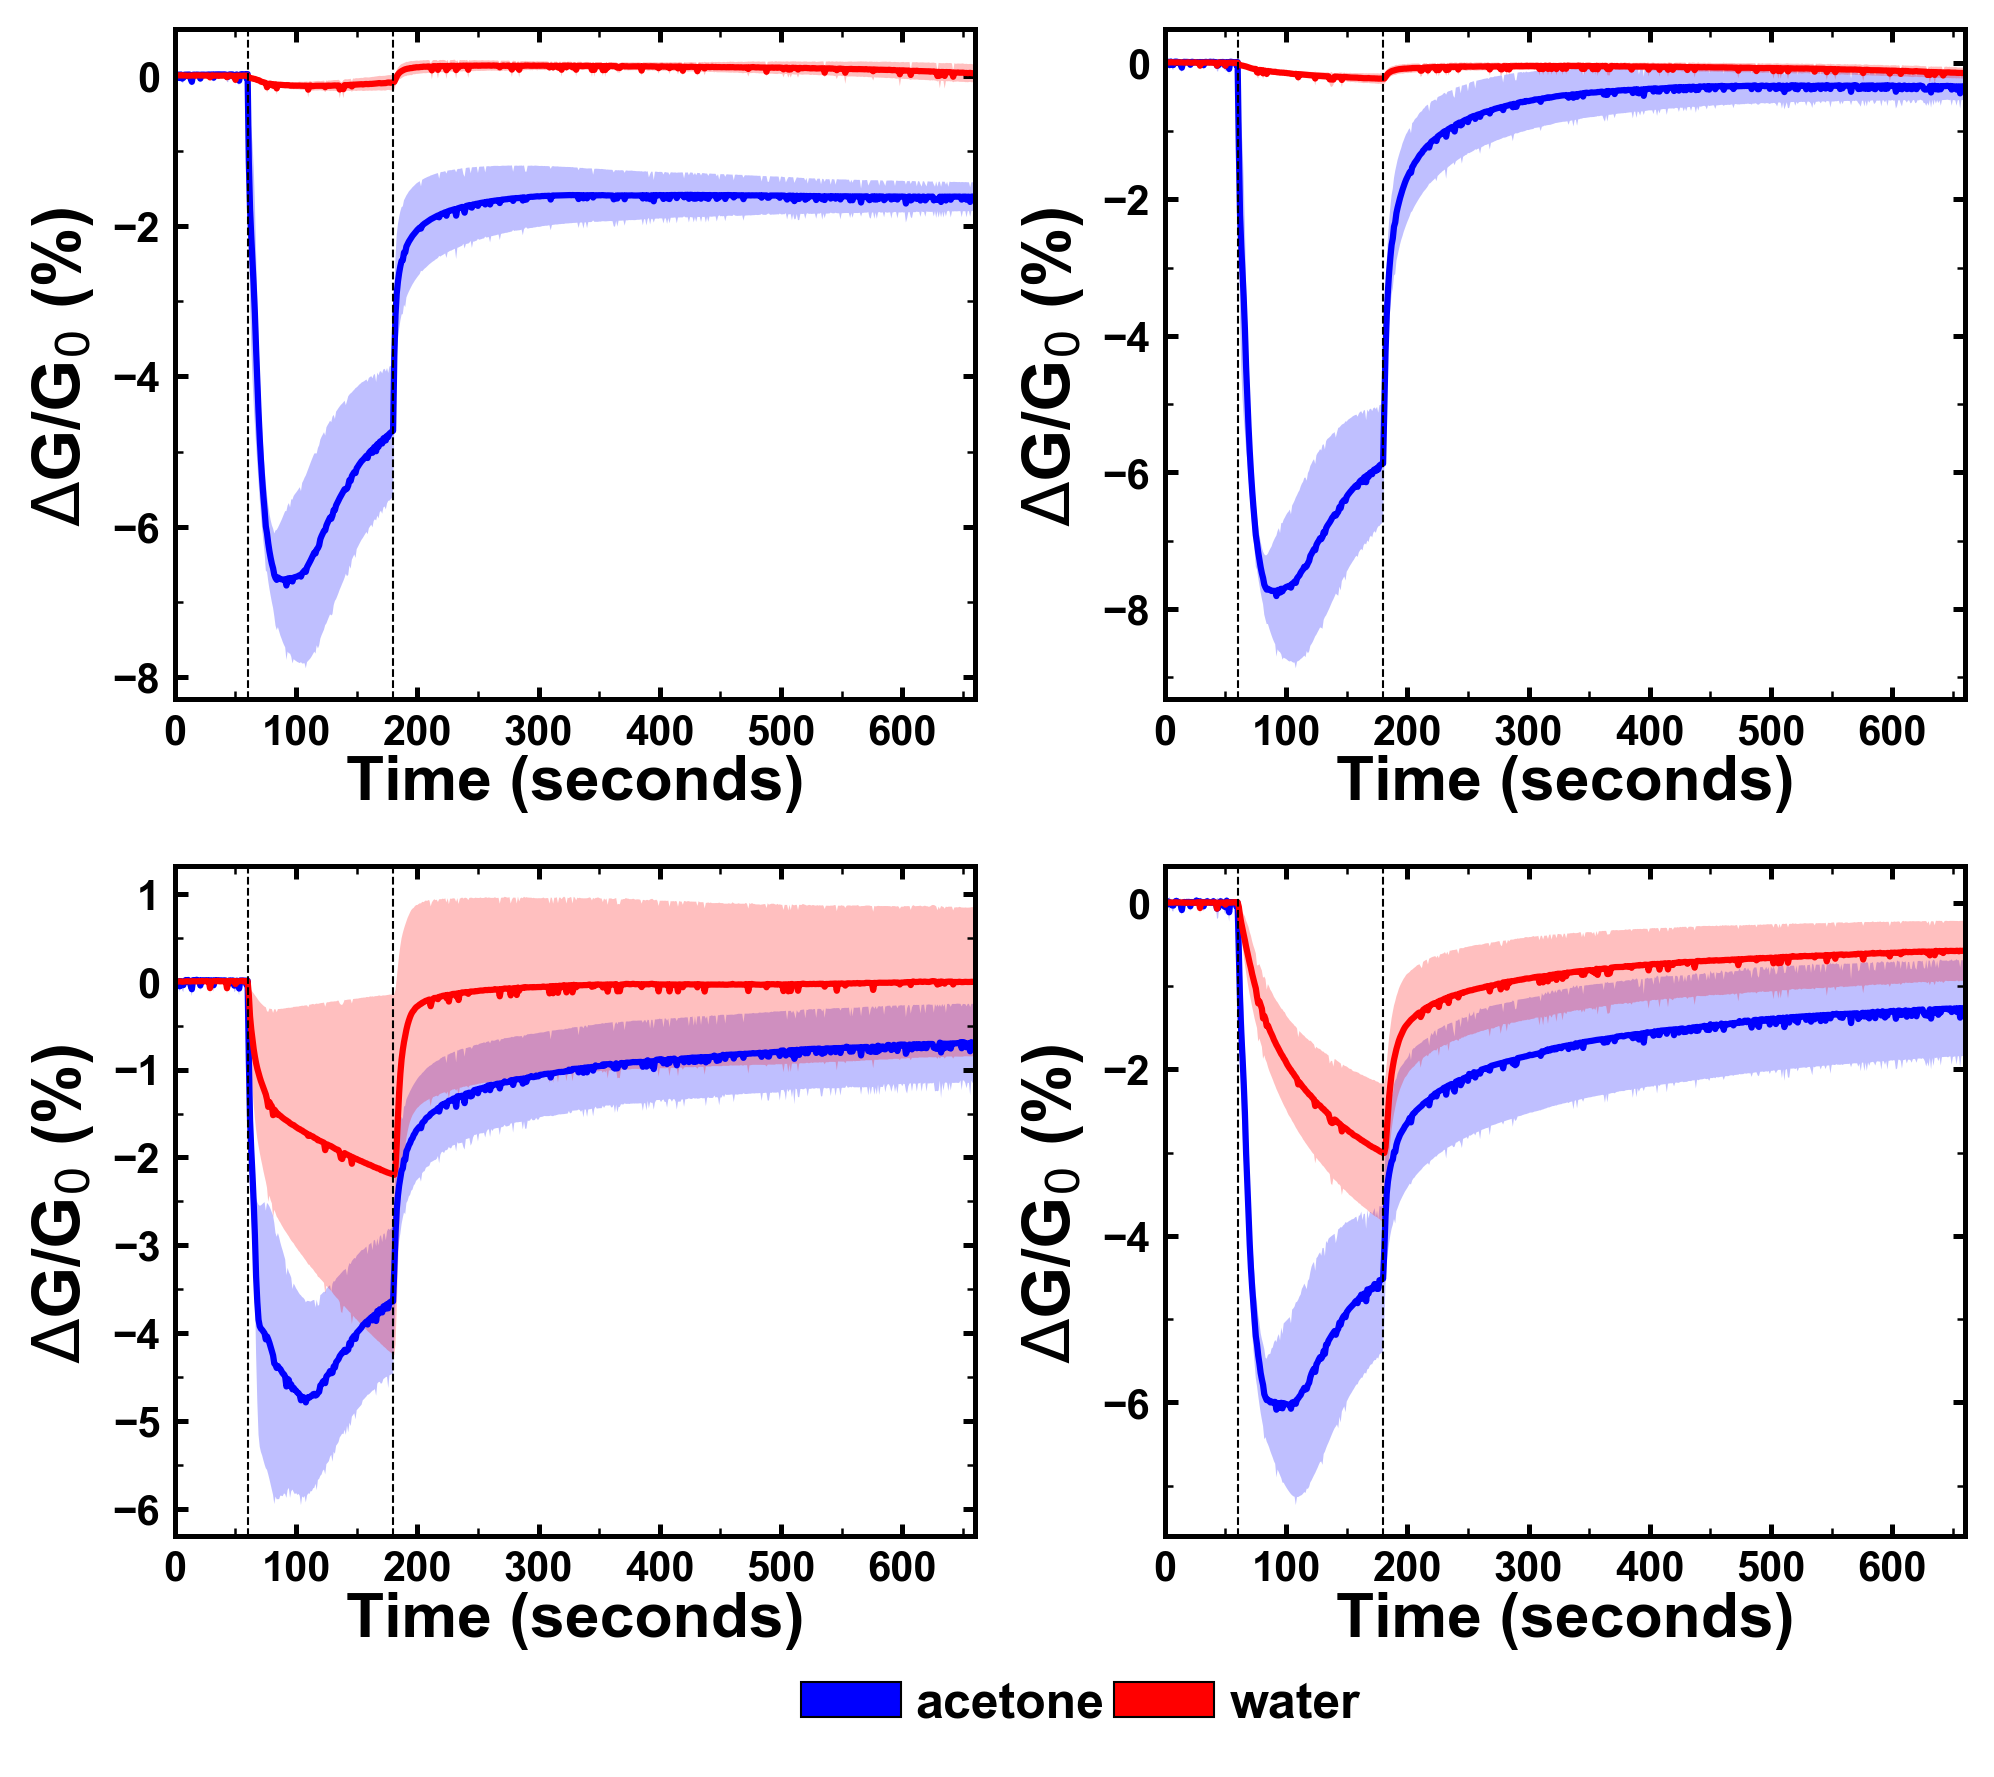

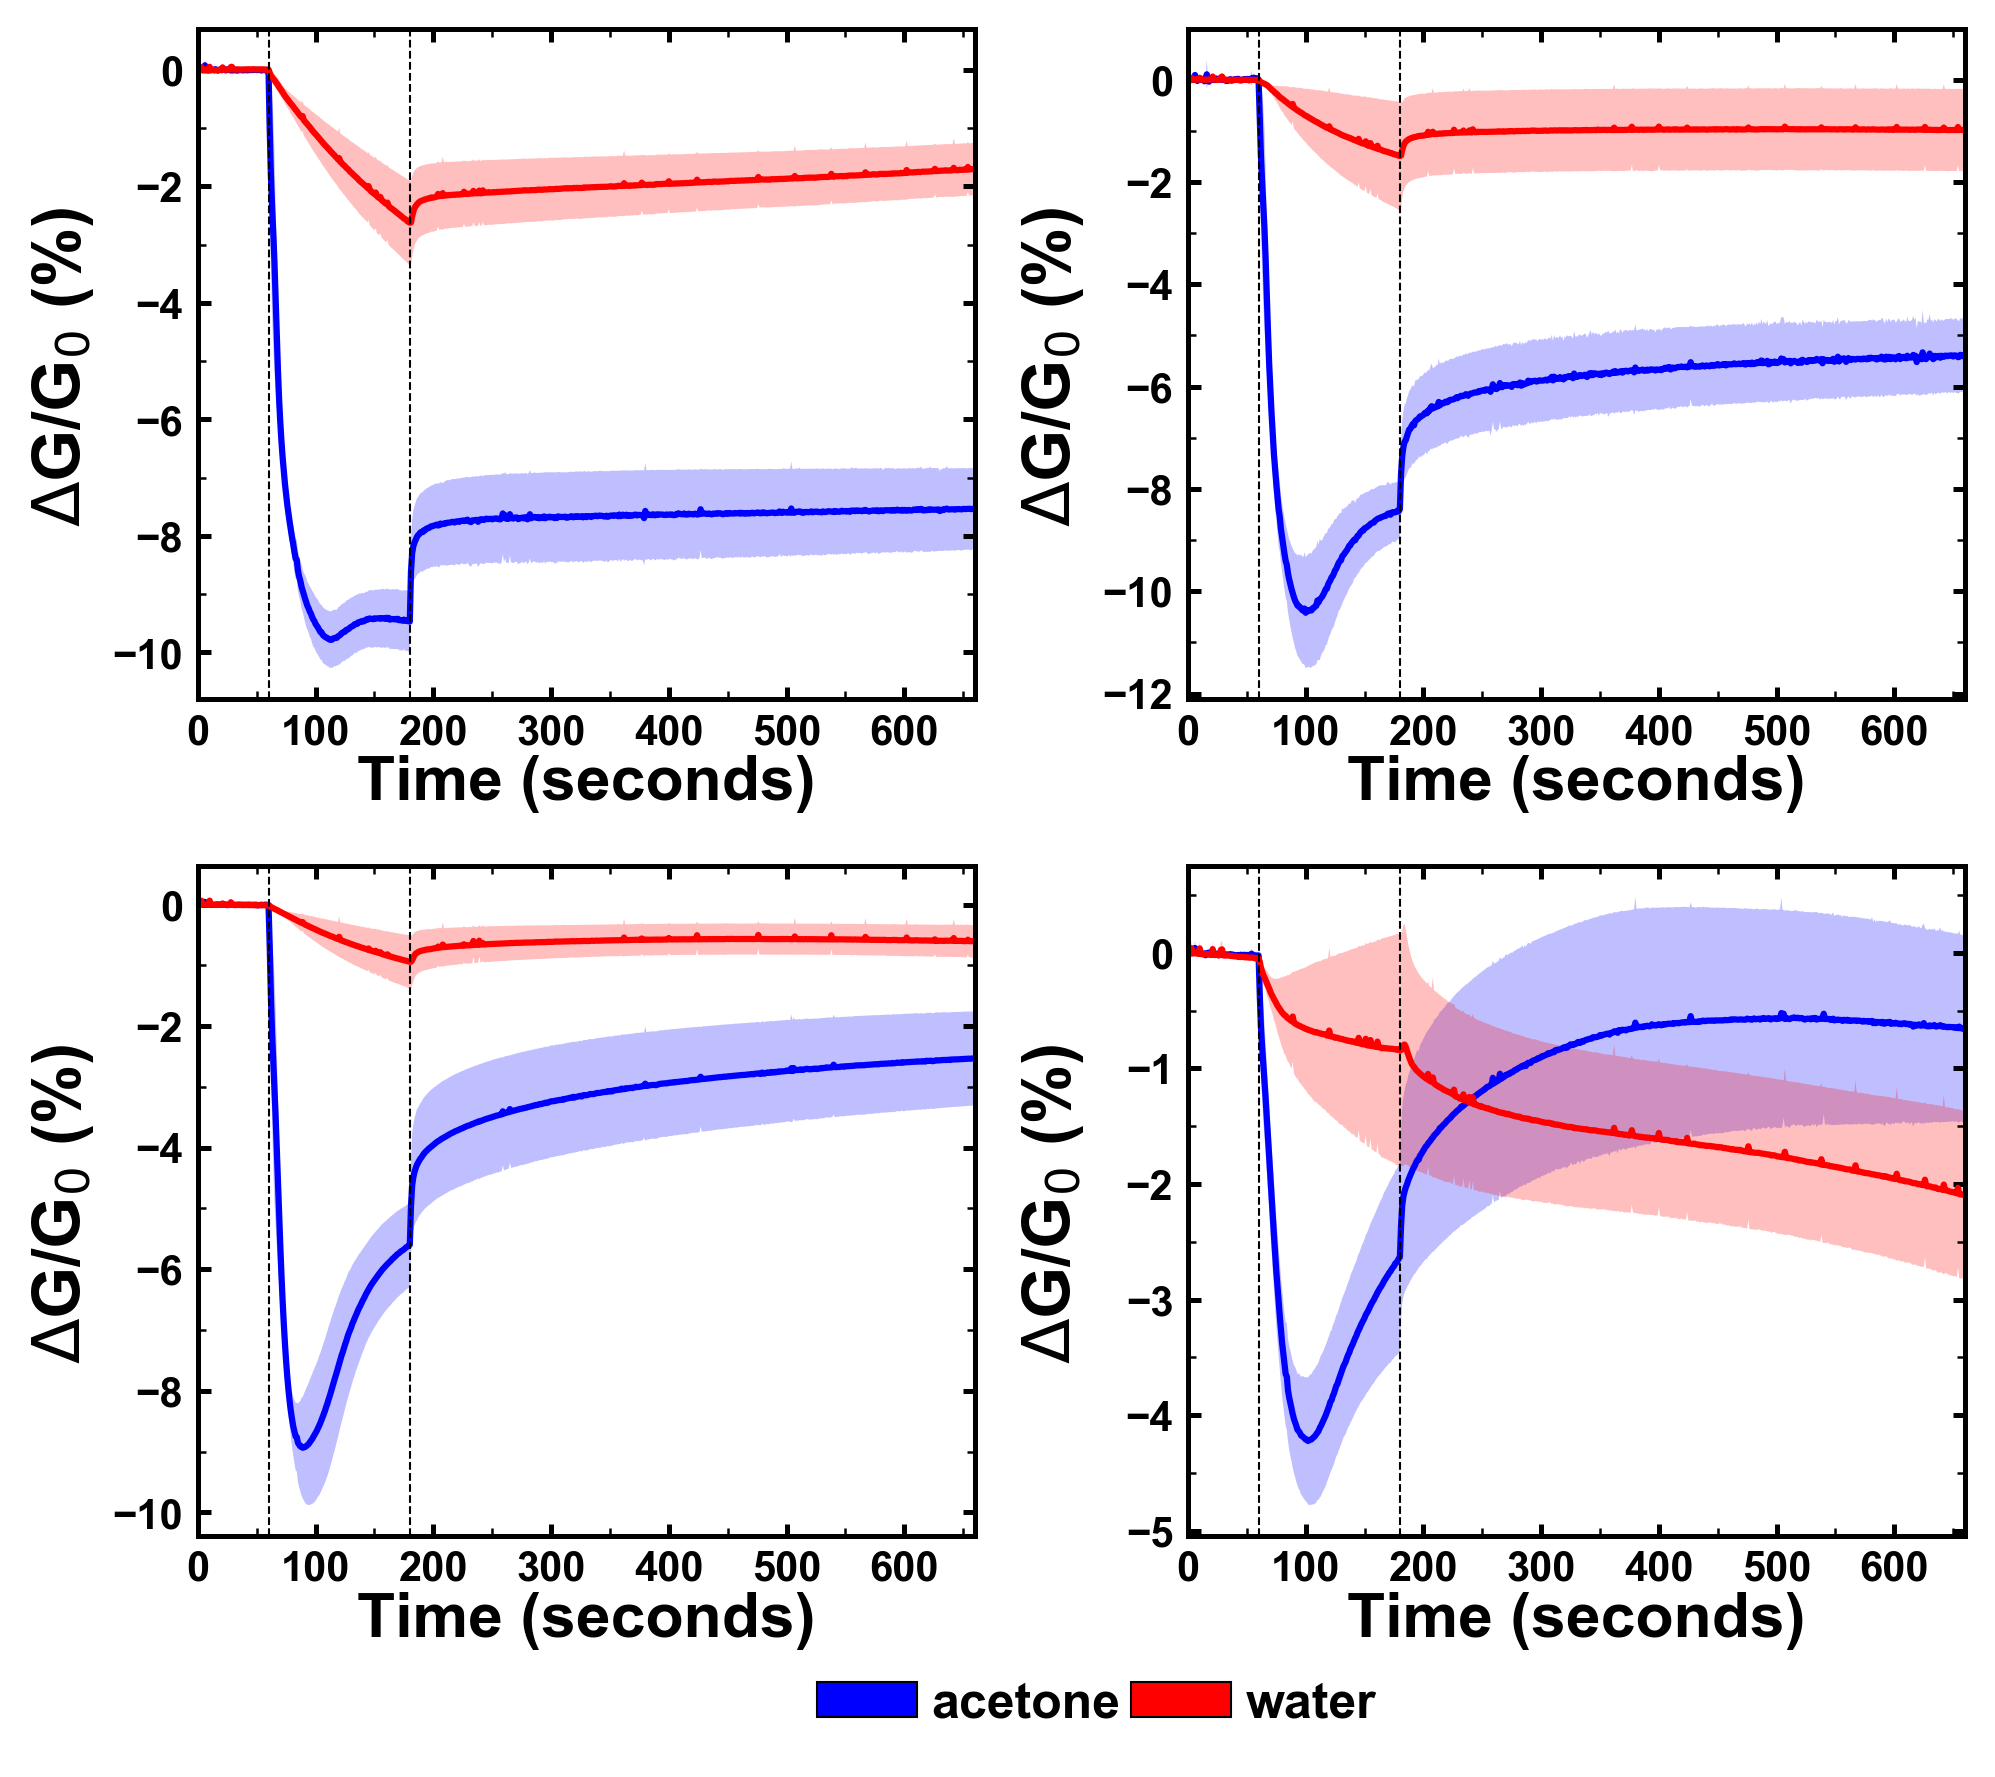

In [58]:
# plotting the selector average for the sample with the standard deviation
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpatches
start = 240
end = 900
normalize = False
if voc:
    num_class = 2
else:
    num_class = 3
    
if cheese:
    cmap = plt.cm.get_cmap('viridis')
    color_fractions = np.array([[0.25,0.5,0.75]])
if liquor:
    cmap = plt.cm.get_cmap('cool')
    color_fractions = np.array([[0.25, 0.75,1.0]])
if oil:
    cmap = plt.cm.get_cmap('plasma')
    color_fractions = np.array([[0,.5,1.0]])
if voc:
    cmap = plt.cm.get_cmap('bwr')
    color_fractions = np.array([[0.0,1.0]])

color_fractions = np.repeat(color_fractions, 1, axis=1).flatten()
colors = [cmap(c) for c in color_fractions]

for s_list in [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]]:
    name = ''.join(str(s_list))
    fig = plt.figure(figsize=(6.75,5.7),dpi=300)
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    for i,ax in zip(s_list,(ax1, ax2, ax3, ax4)):
        selector = []
        for w in sorted(data.keys()):
            selector_data = data[w]['S'+str(i)]
            selector_data = selector_data.T.fillna(selector_data.mean(axis=1)).T 
            selector.append(selector_data)
        selector = pd.concat(selector, axis=1)
        selector = selector.values.T
        selector = selector[:, start:end]
        selector_split = [selector]
        selector_split = np.split(selector, num_class, axis=0)        
        means = []
        std = []
        for s in selector_split:
            means.append(s.mean(axis=0))
            std.append(s.std(axis=0)) 
        selector = np.vstack(means)
        selector_std = np.vstack(std)
        if normalize:
            selector = normalize_selector(selector) 
        for j,c in enumerate(colors):
            y = selector[j,:]
            yerr = selector_std[j,:]
            x = list(range(selector.shape[1]))
    #         plt.scatter(x,y,c=c, s=0.1, alpha=1, cmap=cmap, linewidth=0.2, edgecolor='k')
            ax.plot(x,y, color=c, linewidth=1.5)
    #         plt.errorbar(x, _, )
            ax.fill_between(x, y-yerr, y+yerr,facecolor=c ,alpha=0.25)
        ax.minorticks_on()
        # setting line width for all borders
        line_width = 1.2
        [i.set_linewidth(line_width) for i in ax.spines.values()]
        # all the tick voodoo - location andsize
        ax.tick_params(top=True, right=True)
        ax.set_xticks([0,100,200,300, 400, 500, 600])
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))
        ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
        # ax.tick_params(which='both', axis="y",direction="in")
        # ax.tick_params(which='both', axis="x",direction="in")
        ax.xaxis.set_tick_params(width=line_width)
        ax.yaxis.set_tick_params(width=line_width)
        ax.tick_params(which='major', length=3)
        ax.tick_params(which='minor', length=2)
        # setting tick label size / style
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties('Arial')
            label.set_fontsize(10) 
            label.set_fontweight('bold')
        # get the font and style of the axis labels
        lfont = {'fontname':'Arial', 'fontsize':16, 'weight':'bold'}
        xfont = {'fontname':'Arial', 'fontsize':15, 'weight':'bold'}
        ax.set_ylabel(r'$\Delta$G/G$_0$ (%) ', **lfont)
        ax.set_xlabel('Time (seconds)',**xfont)
        ax.xaxis.labelpad = 0.75
        ax.set_xlim([0,660])
        ax.axvline(x=60, color='k', linewidth=0.5, linestyle='--')
        ax.axvline(x=60+120, color='k', linewidth=0.5, linestyle='--')
    plt.tight_layout()

    # making the legend and setting all its properties
    hands = []
    ### change the values in the next list to match order!
    if cheese:
        sample_labels = ['cheddar', 'mahon', 'pecorino']
        sample_colors = [0.25,0.5,0.75]
    if liquor:
        sample_labels = ['rum', 'vodka', 'whiskey'] 
        sample_colors = [0.25, 0.75,1.0]
    if oil:
        sample_labels = ['canola', 'olive', 'walnut']
        sample_colors = [0.0, 0.5,1.0]
    if voc:
        sample_labels = ['acetone', 'water']
        sample_colors = [0.0,1.0]
        
    for ii,label in zip(sample_colors, sample_labels):
        rgba = cmap(ii)
        p1 = mpatches.Patch(edgecolor='k', facecolor=rgba, label=label, alpha=1, linewidth=0.5)
        hands.append(p1)

    import pylab as plot
    params = {'legend.fontsize': 30,
              'legend.handlelength': 2,
              'legend.columnspacing':0.2,
              'legend.labelspacing':0.2}
    plot.rcParams.update(params)
    legend_prop = {'family':'Arial', 'size':12, 'weight':'bold'}
    plt.legend(handles=hands, bbox_to_anchor=(0.3, -0.15), frameon=False, prop=legend_prop, handletextpad=0.3, labelspacing=0.1, ncol=5)
    plt.subplots_adjust(hspace=0.25)
    fig.align_labels()
    # plt.tight_layout()

    if cheese:
        plt.savefig('./3cheese_avg_all_data_sel_tc_{}.png'.format(name), bbox_inches='tight')
    if liquor:
        plt.savefig('./3liquor_avg_all_data_sel_tc_{}.png'.format(name), bbox_inches='tight')
    if oil:
        plt.savefig('./3oil_avg_all_data_sel_tc_{}.png'.format(name), bbox_inches='tight')
    if voc:
        plt.savefig('./2voc_avg_all_data_sel_tc_{}.png'.format(name), bbox_inches='tight')
    plt.show()

In [23]:
#### for each selector, calc distance between time courses with a euclidean distance and plot the heatmap.
random_drop = False
number_to_keep = 50 # how many do you want to keep?
max_dist = 200 # cap the maximum distance in the plots so the scaling is reasonable
# times slice to use for the distance calculation
start = 300
end = 600
# make an array of the labels for the data:
# labels = np.array([[1,2]])
# labels = np.repeat(labels, 12, axis=1).flatten()
labels = np.array([[1,2,3]])
labels = np.repeat(labels, 12, axis=1).flatten()
for i in range(1,21):
    selector = []
    for w in sorted(data.keys()):
        selector.append(data[w]['S'+str(i)])
    selector = pd.concat(selector, axis=1)
    selector = selector.values.T
    selector = selector[:, start:end]
    if random_drop:
        rand_kept = np.random.choice(selector.shape[1], number_to_keep)
        selector = selector[:,rand_kept]

    dist_lin = pdist(selector)
    dist_sq = squareform(dist_lin)
    dist_sq[dist_sq > max_dist] = max_dist
    print('Selector number: {}'.format(i))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(dist_sq)
    fig.colorbar(cax)
    plt.savefig('./liquor_3_selectors_20/Selector_num_{}.png'.format(i))
    plt.gcf().clear()
    plt.show()
    

Selector number: 1


<Figure size 432x288 with 0 Axes>

Selector number: 2


<Figure size 432x288 with 0 Axes>

Selector number: 3


<Figure size 432x288 with 0 Axes>

Selector number: 4


<Figure size 432x288 with 0 Axes>

Selector number: 5


<Figure size 432x288 with 0 Axes>

Selector number: 6


<Figure size 432x288 with 0 Axes>

Selector number: 7


<Figure size 432x288 with 0 Axes>

Selector number: 8


<Figure size 432x288 with 0 Axes>

Selector number: 9


<Figure size 432x288 with 0 Axes>

Selector number: 10


<Figure size 432x288 with 0 Axes>

Selector number: 11


<Figure size 432x288 with 0 Axes>

Selector number: 12


<Figure size 432x288 with 0 Axes>

Selector number: 13


<Figure size 432x288 with 0 Axes>

Selector number: 14


<Figure size 432x288 with 0 Axes>

Selector number: 15


<Figure size 432x288 with 0 Axes>

Selector number: 16


<Figure size 432x288 with 0 Axes>

Selector number: 17


<Figure size 432x288 with 0 Axes>

Selector number: 18


<Figure size 432x288 with 0 Axes>

Selector number: 19


<Figure size 432x288 with 0 Axes>

Selector number: 20


<Figure size 432x288 with 0 Axes>

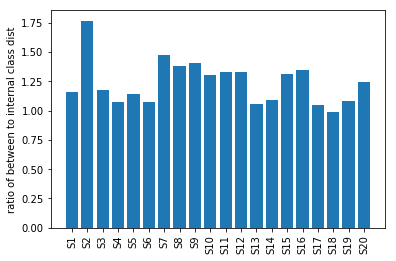

In [24]:
# calculating the dissimilarity of examples of class for each selector. 
start = 300
end = 600
classes = 3

def sel_summary(data_list): return sum([ele[0] for ele in data_list])

def data_summary(data_list):
    data_summary = []
    for d_list in data_list:
        data_summary.append(sel_summary(d_list))
    return data_summary

internal_class = []
between_class = []
labels = []
for i in range(1,21):
    labels.append('S'+str(i))
    selector = []
    for w in sorted(data.keys()):
        selector_data = data[w]['S'+str(i)]
        selector_data = selector_data.T.fillna(selector_data.mean(axis=1)).T 
        selector.append(selector_data)
    selector = pd.concat(selector, axis=1)
    selector = selector.values.T
    selector = selector[:, start:end]
#     selector = normalize_selector(selector)
    # the selector matrix is a Nxdelta_t matrix"
    # where the first half is of cheese 1 (or ethanol) and the 2nd is cheese 2 (or water)
    # OR 
    # if multiple cheeses its evenly split into three groups 
    between_class.append(indiv_sel_avg_all_to_all_dist(selector, classes))  
    internal_class.append(internal_class_dissim(selector, classes))
internal_class = data_summary(internal_class)
ratio = np.divide(between_class,internal_class)
# print(summary, between_class)
ind = range(ratio.shape[0])
fig, ax = plt.subplots()
ax.set_xticks(ind)
# ax.set_ylim([1,2.1])
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('ratio of between to internal class dist')
plt.bar(ind,ratio)
plt.show()

#     sel_mean, sel_std = indiv_sel_avg_all_to_all_dist(selector)
#     all_data.append(('selector_{}'.format(i), sel_mean, sel_std))

In [30]:
### POST analysis: i dont think this is a good measure for utility of a selector for the classification problem...

# this cell is to look at the all combo distances between cheese 1 to cheese 2 for each of the selector individually
# the idea is to get a measure of how informative a selector is...ie is there a different between C1 and C2?
# might need to normalize the c1 to c2 distance for a given selector by how noisy it is internal to one cheese
start = 300
end = 500

all_data = []
for i in range(1,21):
    selector = []
    for w in sorted(data.keys()):
        selector_data = data[w]['S'+str(i)]
        selector_data = selector_data.T.fillna(selector_data.mean(axis=1)).T 
        selector.append(selector_data)
    selector = pd.concat(selector, axis=1)
    selector = selector.values.T
    selector = selector[:, start:end]
    # the selector matrix is a Nxdelta_t matrix"
    # where the first half is of cheese 1 (or ethanol) and the 2nd is cheese 2 (or water)
    sel_mean, sel_std = indiv_sel_avg_all_to_all_dist(selector)
    all_data.append(('selector_{}'.format(i), sel_mean, sel_std))
means = [ele[1] for ele in all_data]
error = [ele[2] for ele in all_data]
ind = range(len(all_data))
fig, ax = plt.subplots()
ax.set_xticks(ind)
ax.set_xticklabels([ele[0] for ele in all_data], rotation=90)
ax.set_ylabel('average internal selector distance')
plt.bar(ind,means, yerr=error)
plt.show()

TypeError: indiv_sel_avg_all_to_all_dist() missing 1 required positional argument: 'classes'

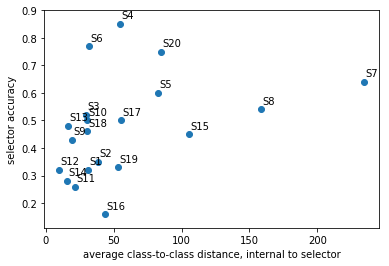

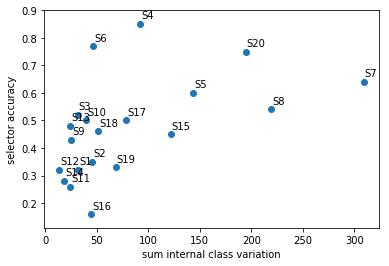

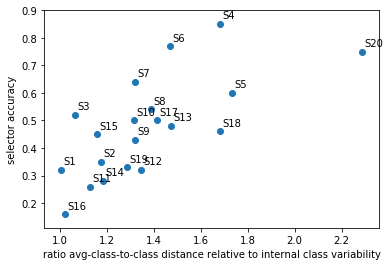

In [34]:
#### This cell is for plotting accuracies vs various interal / between class differences
#### use the accuracies from the various single selector run from above...sadly right now you manually put them in...lol

# 2 cheeses
# sel_acc = [0.47, 0.54, 0.60, 0.90, 0.875, 0.92, 0.79, 0.53, 0.43, 0.81, 
#            0.42, 0.56, 0.44, 0.19, 0.47,  0.57, 0.47, 0.46, 0.34, 0.625]
# 3 cheeses
sel_acc = [0.32, 0.35, 0.52, 0.85, 0.60, 0.77, 0.64, 0.54, 0.43, 0.5,
            0.26, 0.32, 0.48,0.28,0.45,0.16,0.50,0.46,0.33,0.75]
sel_labels = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
              'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20']

# plt.scatter(means, sel_acc)
plt.scatter(internal_class, sel_acc)
plt.ylabel('selector accuracy')
plt.xlabel('average class-to-class distance, internal to selector')
for i, label in enumerate(sel_labels):
    plt.annotate(label, (internal_class[i]+1, sel_acc[i]+0.02))
plt.savefig('./average_class-to-class_distance-internal_to_selector.png')
plt.show()
plt.gcf().clear()

# plt.scatter(means, sel_acc)
plt.scatter(between_class, sel_acc)
plt.ylabel('selector accuracy')
plt.xlabel('sum internal class variation')
for i, label in enumerate(sel_labels):
    plt.annotate(label, (between_class[i]+1, sel_acc[i]+0.02))
plt.savefig('./sum_internal_class_variation.png')
plt.show()
plt.gcf().clear()

# plt.scatter(means, sel_acc)
plt.scatter(ratio, sel_acc)
plt.ylabel('selector accuracy')
plt.xlabel('ratio avg-class-to-class distance relative to internal class variability')
for i, label in enumerate(sel_labels):
    plt.annotate(label, (ratio[i]+0.01, sel_acc[i]+0.02))
plt.savefig('./ratio_class-to-class_v_internal_to_class.png')
plt.show()